# Predicating Rain in Austrialia 

### Importing Labraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading the data 

In [2]:
data=pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.shape

(145460, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Looking the missing  values 
data.isnull().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
# dropping the Missing  values 
data.dropna(inplace=True)

In [7]:
data.shape

(56420, 23)

In [8]:
data["Date"]=pd.to_datetime(data["Date"])

In [9]:
data.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,56420.0,13.464770,6.416689,-6.7,8.6,13.2,18.4,31.4
MaxTemp,56420.0,24.219206,6.970676,4.1,18.7,23.9,29.7,48.1
Rainfall,56420.0,2.130397,7.014822,0.0,0.0,0.0,0.6,206.2
Evaporation,56420.0,5.503135,3.696282,0.0,2.8,5.0,7.4,81.2
Sunshine,56420.0,7.735626,3.758153,0.0,5.0,8.6,10.7,14.5
WindGustSpeed,56420.0,40.877366,13.335232,9.0,31.0,39.0,48.0,124.0
WindSpeed9am,56420.0,15.667228,8.317005,2.0,9.0,15.0,20.0,67.0
WindSpeed3pm,56420.0,19.786778,8.510180,2.0,13.0,19.0,26.0,76.0
Humidity9am,56420.0,65.874123,18.513289,0.0,55.0,67.0,79.0,100.0
Humidity3pm,56420.0,49.601985,20.197040,0.0,35.0,50.0,63.0,100.0


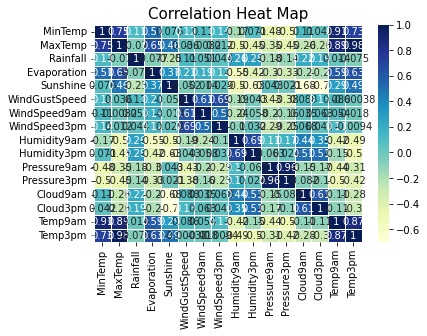

In [11]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (25, 20)
sns.heatmap(data.corr(), annot = True, linewidth = 0.5, cmap = 'YlGnBu')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [12]:
# Mapping Yes:1, No:0

data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})
data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})

In [13]:
df=data
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                 int64
RainTomorrow              int64
dtype: object

# Analysis

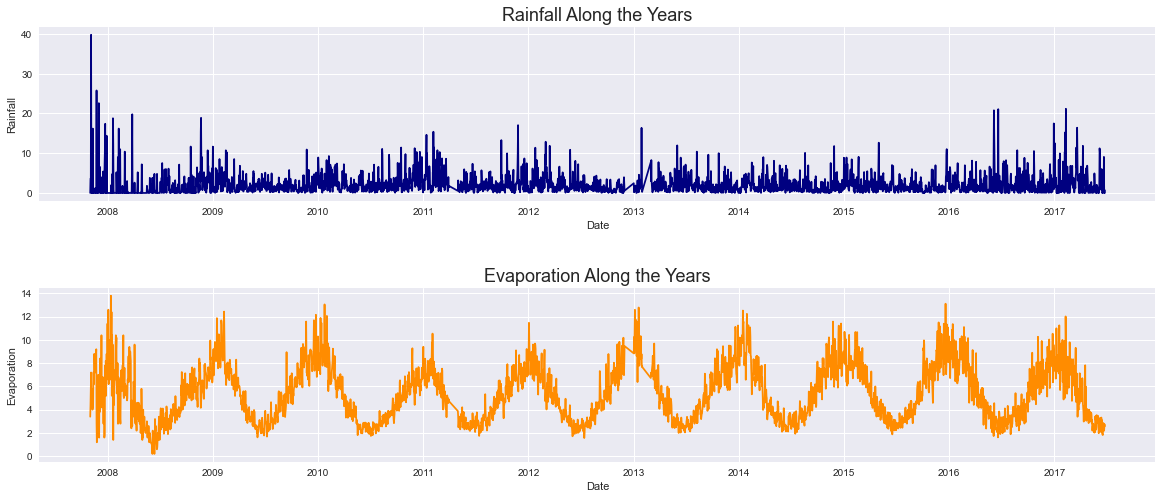

In [14]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(20,8)) 

sns.lineplot(data=data, x = 'Date', y = "Rainfall", ci=None, ax=ax[0], color="navy")
ax[0].set_title("Rainfall Along the Years", fontsize=18)

sns.lineplot(data=data, x = 'Date', y = "Evaporation", ci=None, ax=ax[1], color="darkorange")
ax[1].set_title("Evaporation Along the Years", fontsize=18)

plt.subplots_adjust(hspace = 0.5)

plt.show()

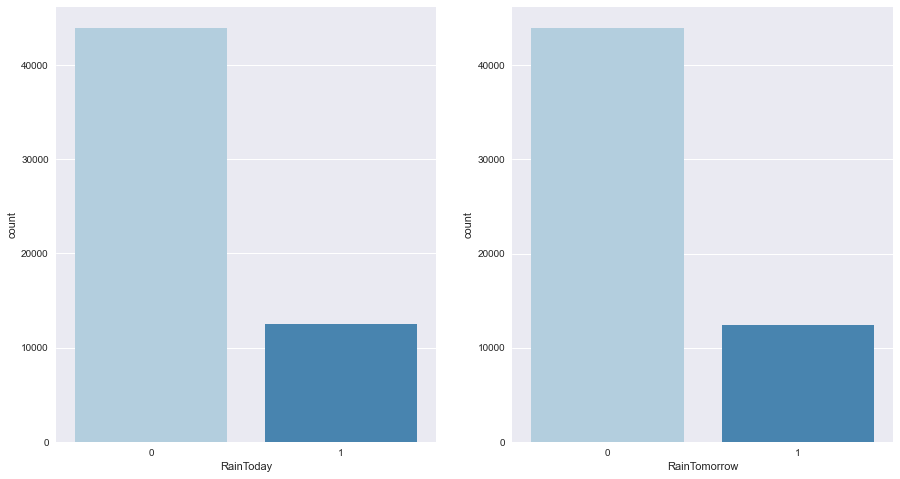

In [15]:
plt.style.use("seaborn")
fig, ax =plt.subplots(1,2, figsize=(15,8))
sns.countplot(df["RainToday"], ax=ax[0], palette="Blues");
sns.countplot(df["RainTomorrow"], ax=ax[1], palette="Blues");

Text(0.5, 0, 'WindGustDir')

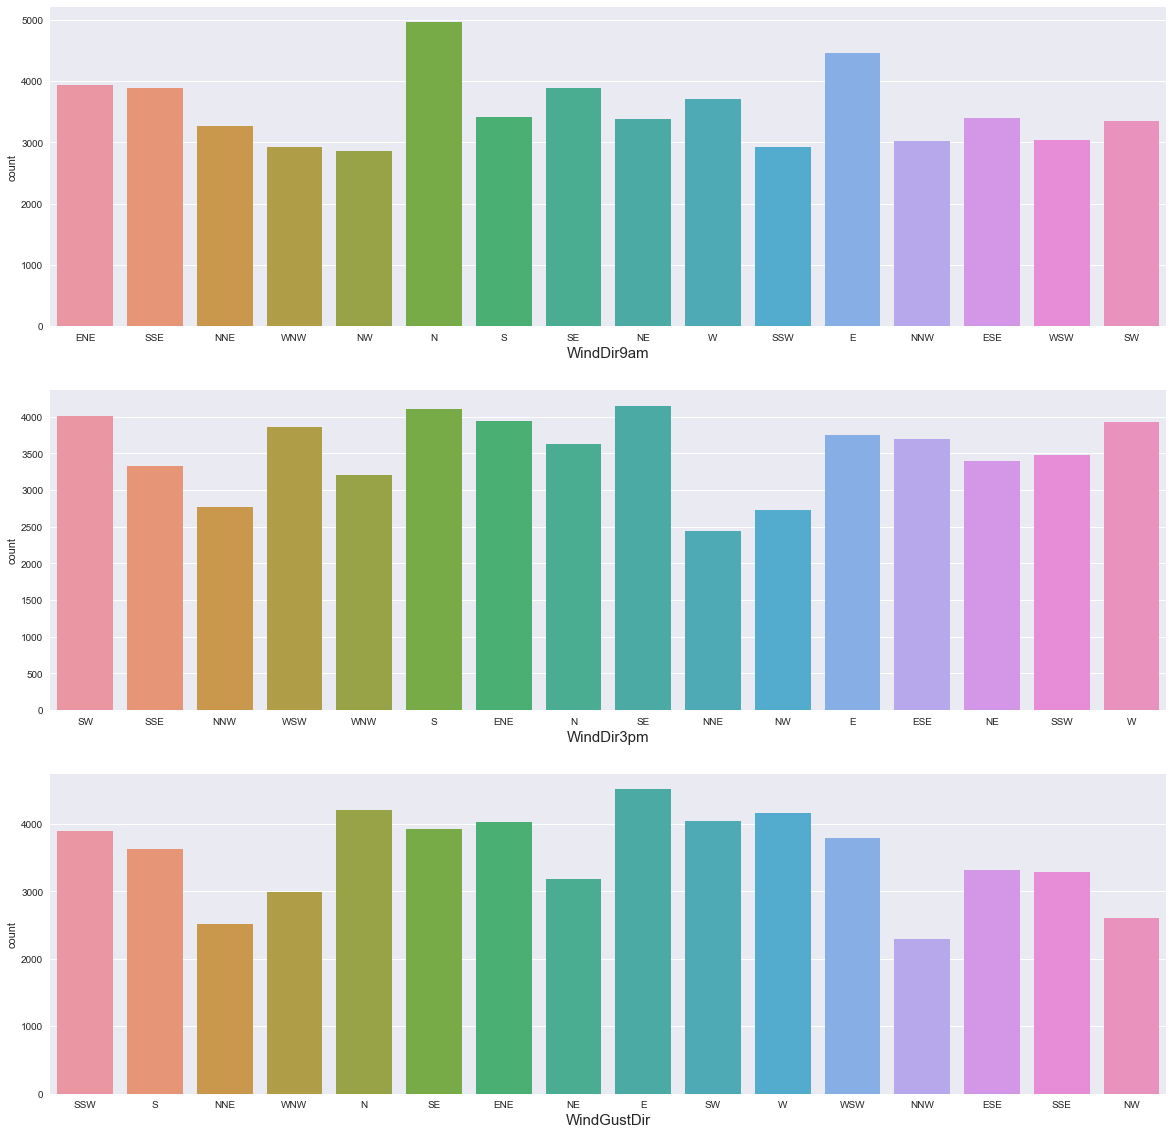

In [16]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(20,20))

sns.countplot(df['WindDir9am'], ax=ax[0])
ax[0].set_xlabel("WindDir9am",fontsize=15)

sns.countplot(df['WindDir3pm'], ax=ax[1])
ax[1].set_xlabel("WindDir3pm",fontsize=15)

sns.countplot(df['WindGustDir'], ax=ax[2])
ax[2].set_xlabel("WindGustDir",fontsize=15)

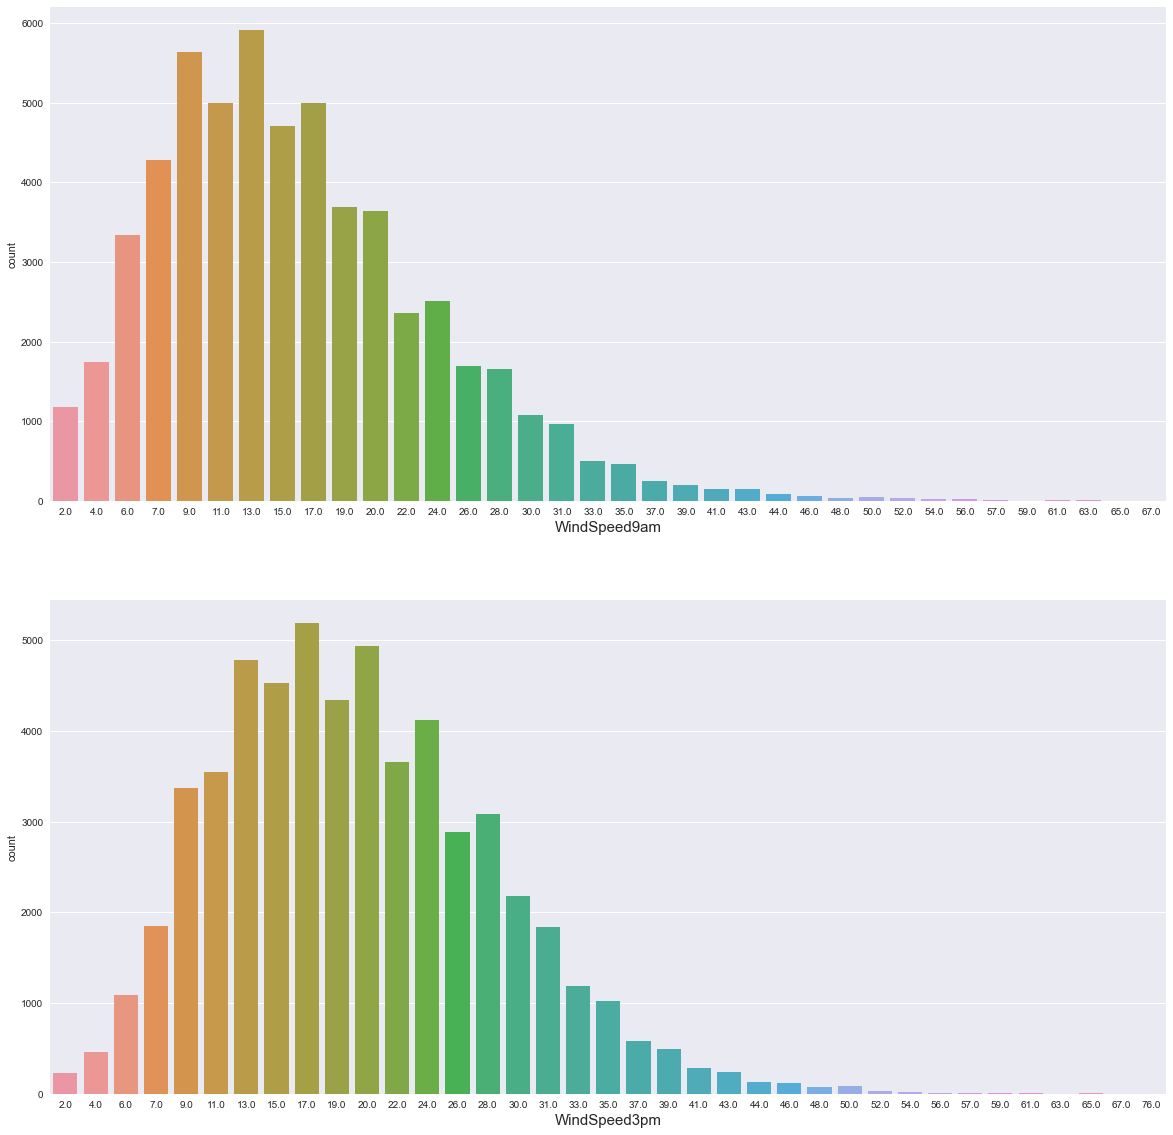

In [17]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(20,20))

sns.countplot(df['WindSpeed9am'], ax=ax[0])
ax[0].set_xlabel("WindSpeed9am",fontsize=15)

sns.countplot(df['WindSpeed3pm'], ax=ax[1])
ax[1].set_xlabel("WindSpeed3pm",fontsize=15);

Text(0.5, 0, 'Humidity3pm')

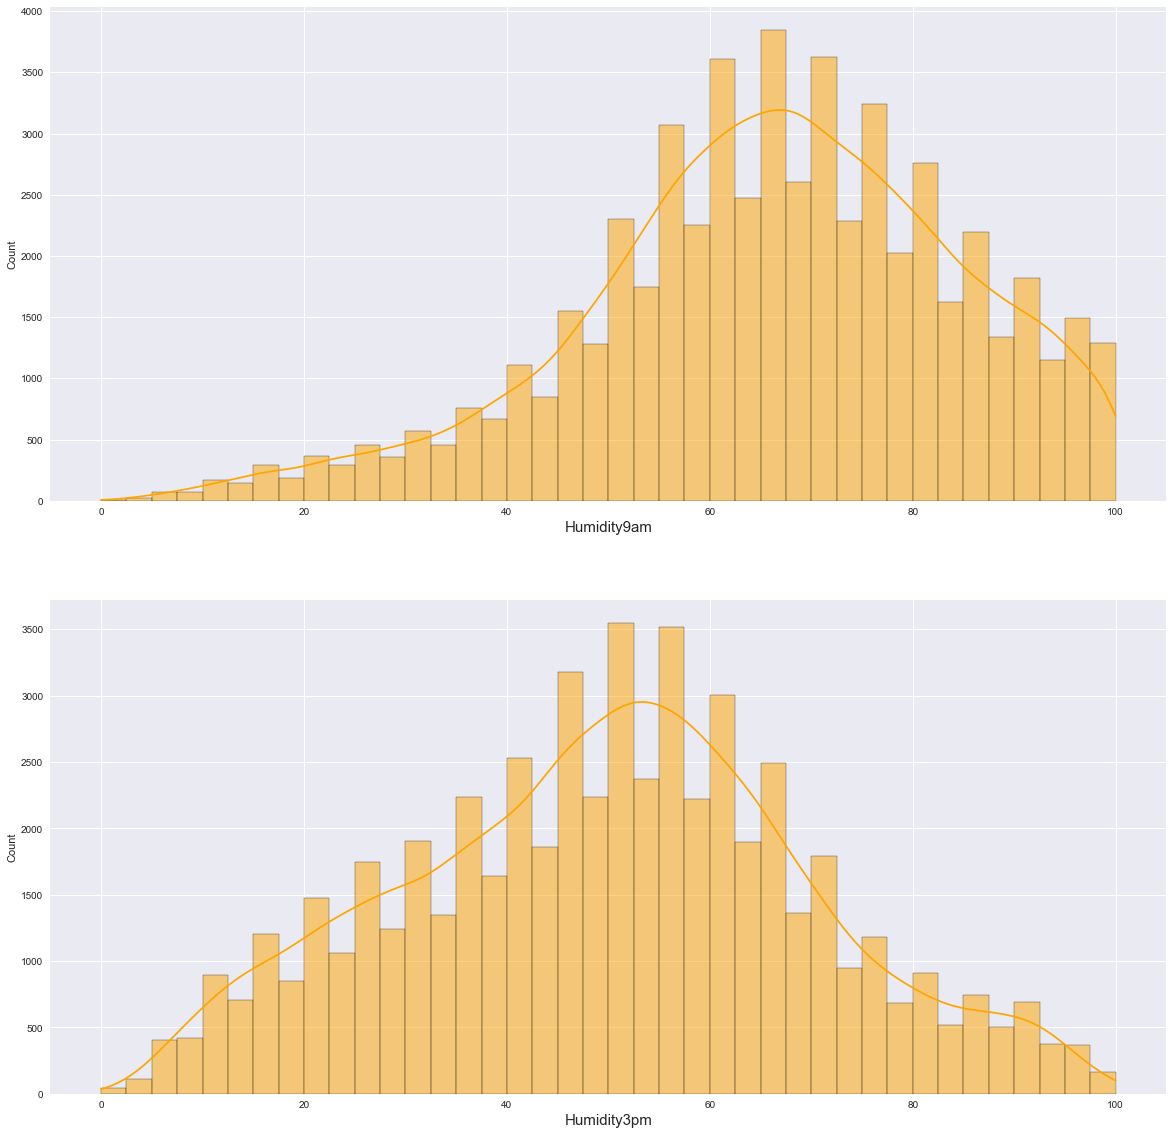

In [18]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(20,20))

sns.histplot(df['Humidity9am'], ax=ax[0], color="orange", bins=40, kde=True)
ax[0].set_xlabel("Humidity9am",fontsize=15)

sns.histplot(df['Humidity3pm'], ax=ax[1], color="orange", bins=40, kde=True);
ax[1].set_xlabel("Humidity3pm",fontsize=15)

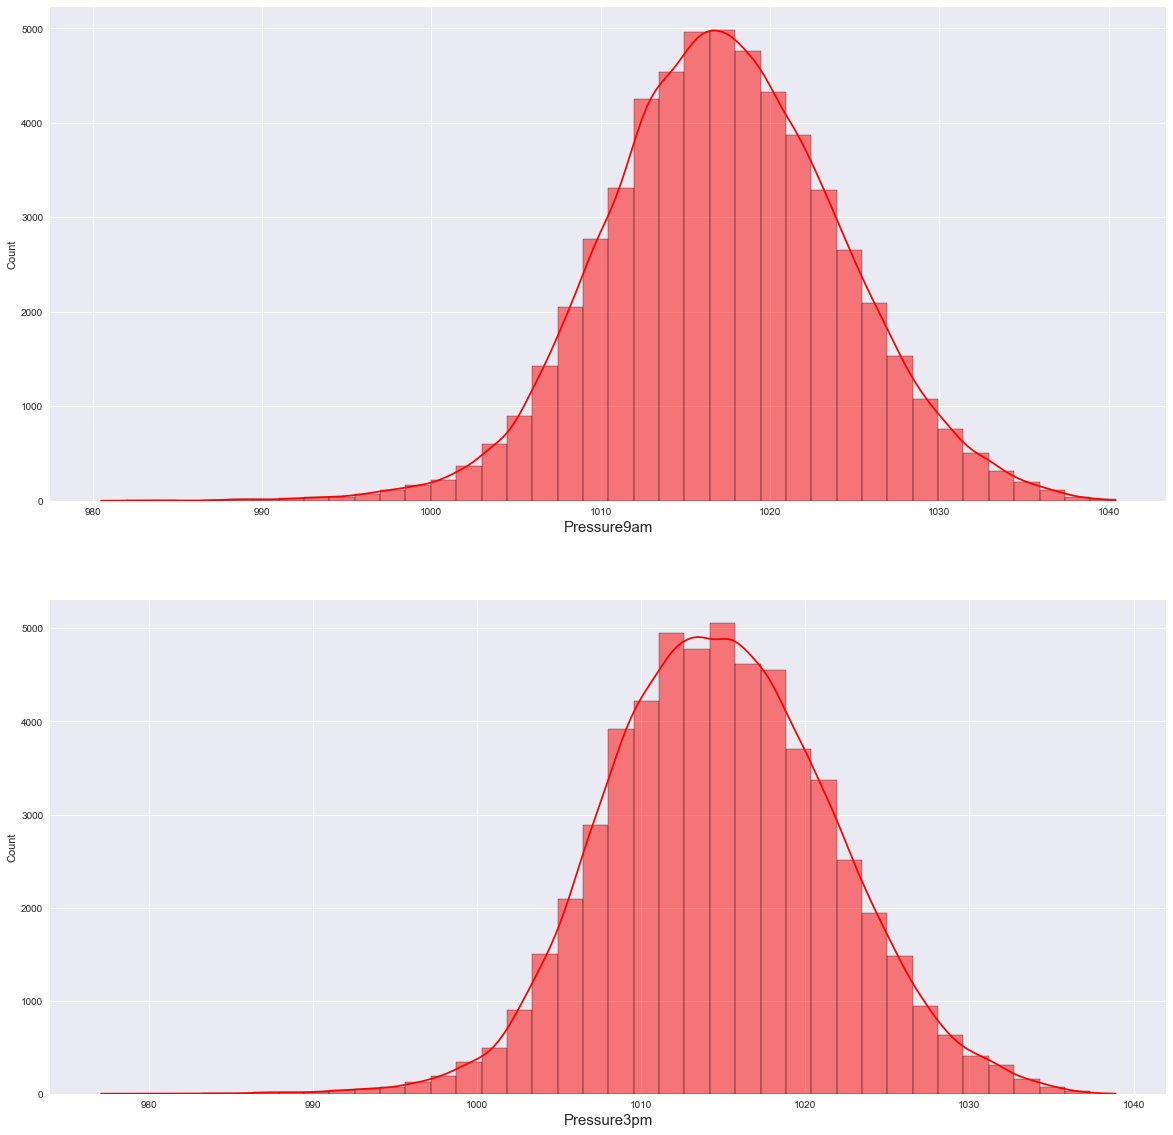

In [19]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(20,20))

sns.histplot(df['Pressure9am'], ax=ax[0], color="r", bins=40, kde=True)
ax[0].set_xlabel("Pressure9am",fontsize=15)

sns.histplot(df['Pressure3pm'], ax=ax[1], color="r", bins=40, kde=True)
ax[1].set_xlabel("Pressure3pm",fontsize=15);

Text(0.5, 0, 'Cloud3pm')

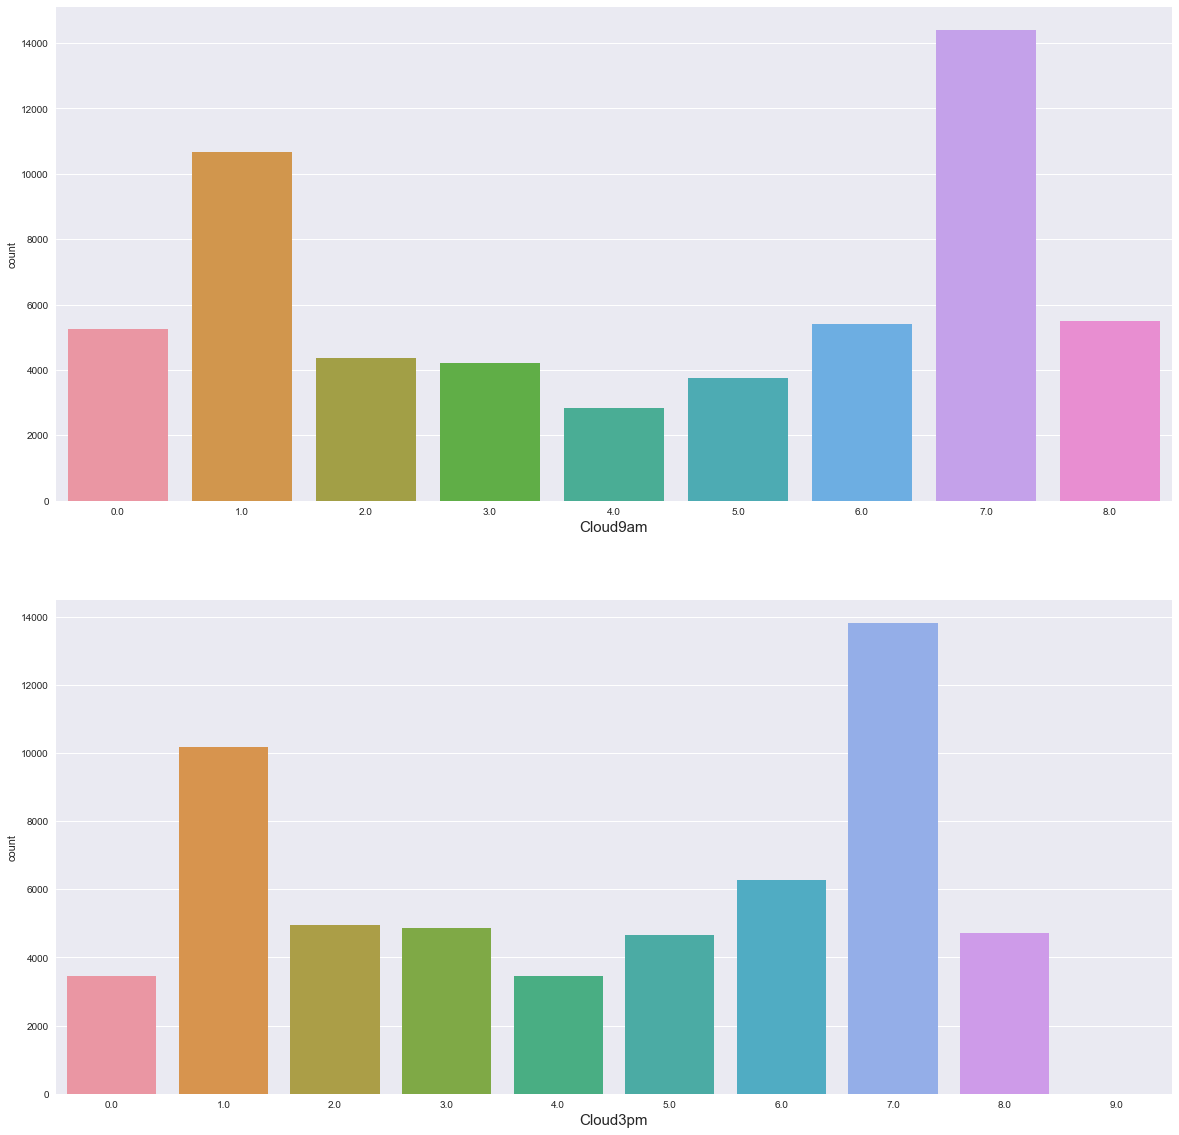

In [20]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(20,20))

sns.countplot(df['Cloud9am'], ax=ax[0])
ax[0].set_xlabel("Cloud9am",fontsize=15)

sns.countplot(df['Cloud3pm'], ax=ax[1])
ax[1].set_xlabel("Cloud3pm",fontsize=15)

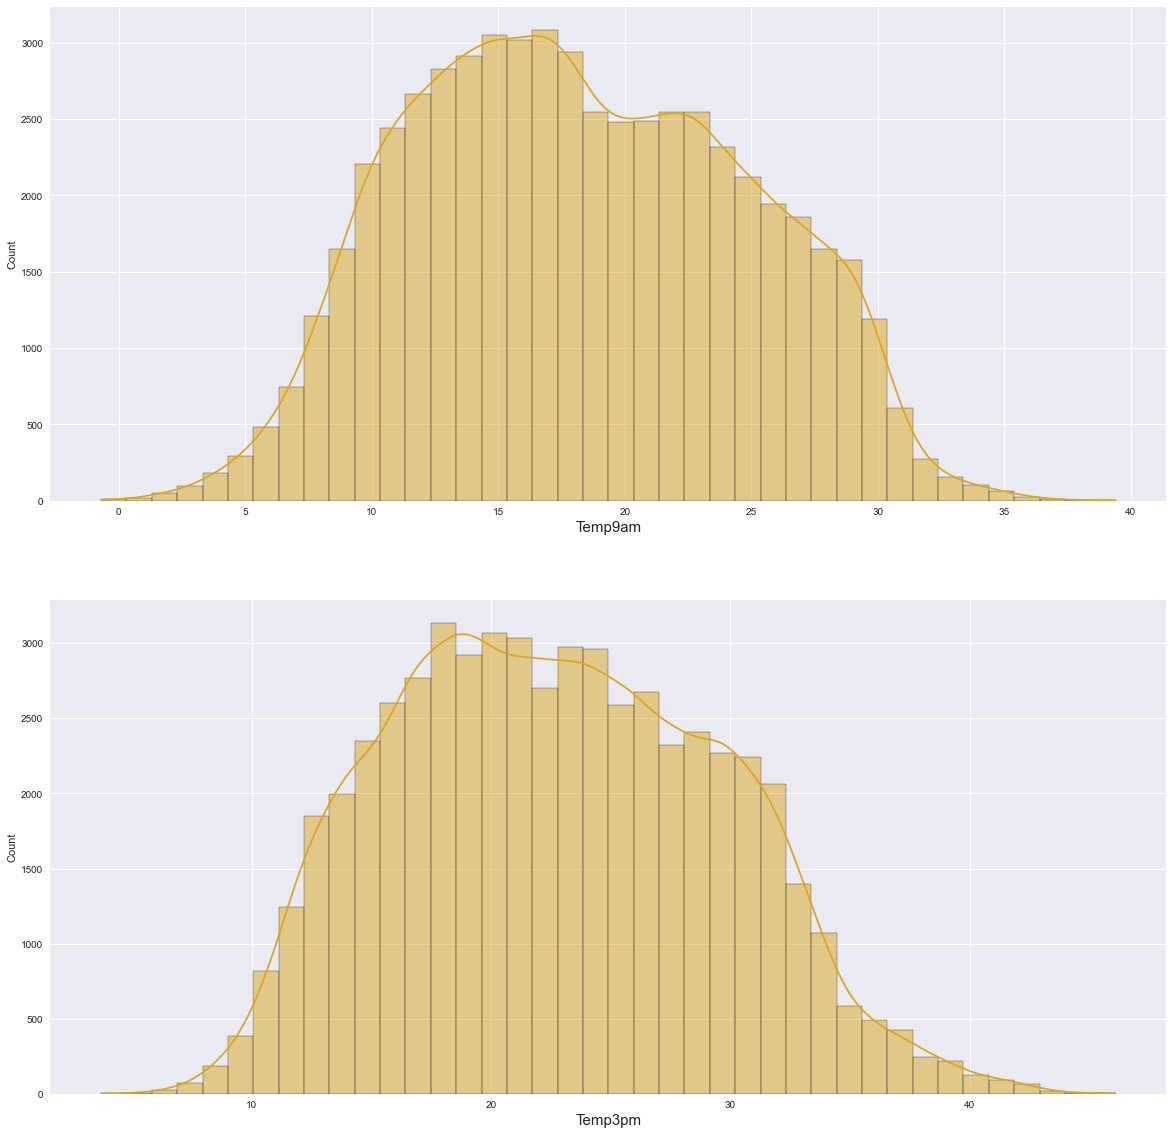

In [21]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(20,20))

sns.histplot(df['Temp9am'], ax=ax[0], color="goldenrod", bins=40, kde=True)
ax[0].set_xlabel("Temp9am",fontsize=15)

sns.histplot(df['Temp3pm'], ax=ax[1], color="goldenrod", bins=40, kde=True)
ax[1].set_xlabel("Temp3pm",fontsize=15);

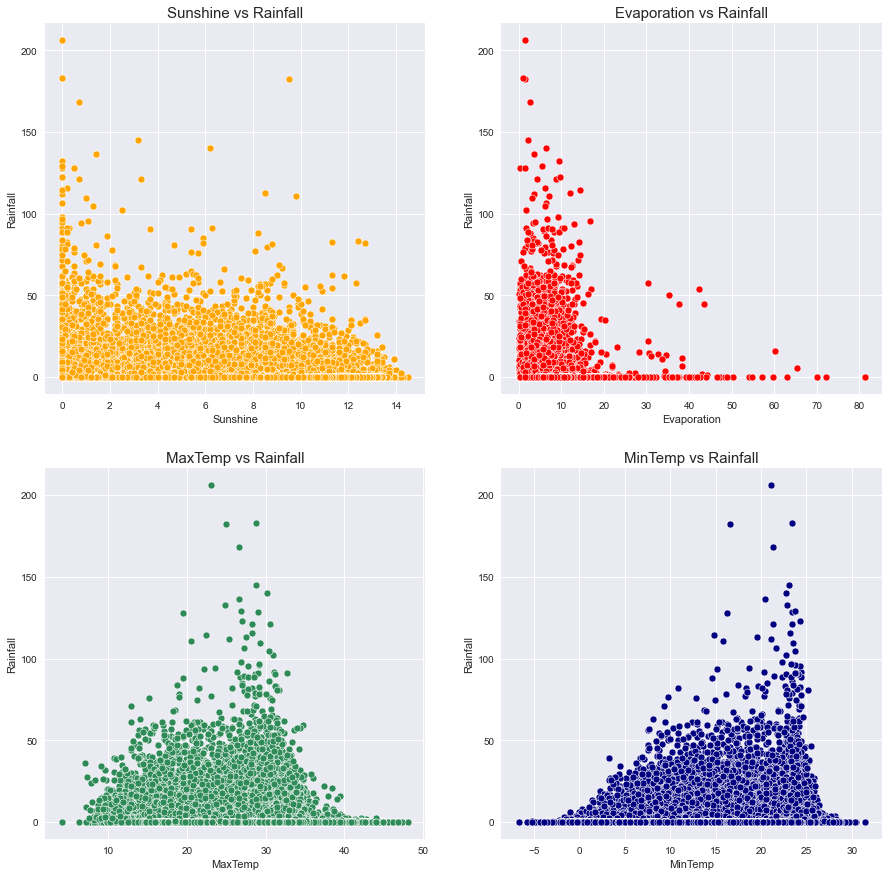

In [22]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,2, figsize=(15,15)) 

sns.scatterplot(x = data['Sunshine'], y = data['Rainfall'], ax=ax[0,0], color="orange");
ax[0,0].set_title("Sunshine vs Rainfall",fontsize=15);

sns.scatterplot(x = data['Evaporation'], y = data['Rainfall'], ax=ax[0,1], color="red");
ax[0,1].set_title("Evaporation vs Rainfall",fontsize=15);

sns.scatterplot(x = data['MaxTemp'], y = data['Rainfall'], ax=ax[1,0], color="seagreen");
ax[1,0].set_title("MaxTemp vs Rainfall",fontsize=15);

sns.scatterplot(x = data['MinTemp'], y = data['Rainfall'], ax=ax[1,1], color="navy");
ax[1,1].set_title("MinTemp vs Rainfall",fontsize=15);

# Label Encoding

In [23]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindGustDir'] = le.fit_transform(df['RainTomorrow'])
df['WindGustDir'] = le.fit_transform(df['RainToday'])

In [24]:
df.drop("Date",axis=1,inplace=True)

In [25]:
df.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

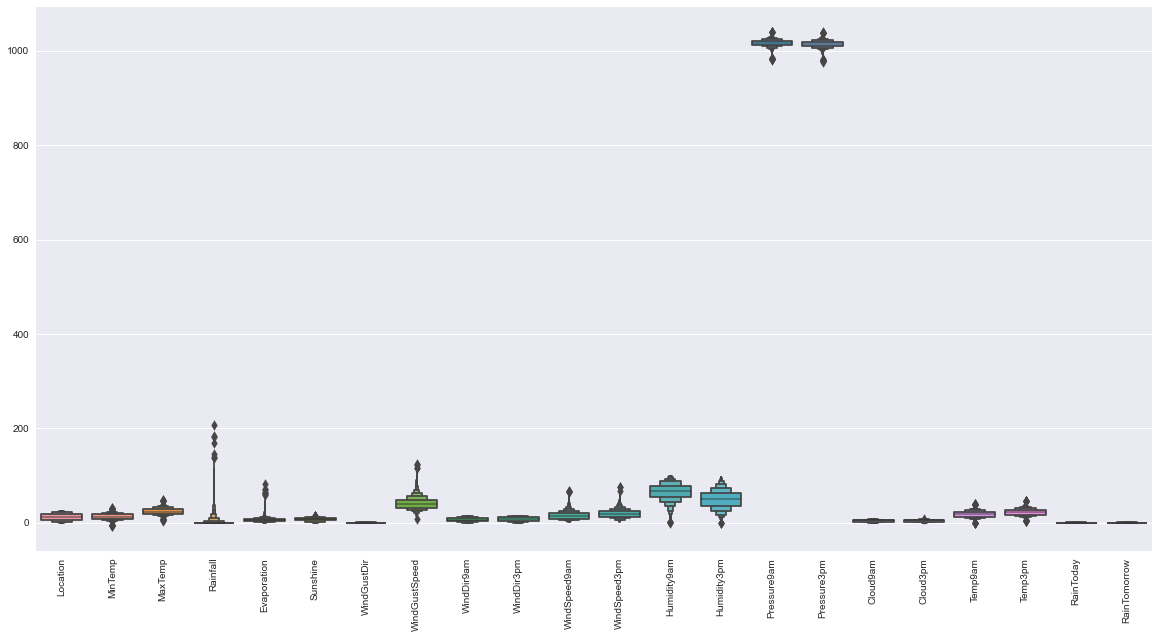

In [26]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = data)
plt.xticks(rotation=90)
plt.show()

In [27]:
### creating  X and Y

X= df.drop("RainTomorrow",axis=1)

X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
6049,4,17.9,35.2,0.0,12.0,12.3,0,48.0,1,12,...,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
6050,4,18.4,28.9,0.0,14.8,13.0,0,37.0,10,10,...,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
6052,4,19.4,37.6,0.0,10.8,10.6,0,46.0,5,6,...,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
6053,4,21.9,38.4,0.0,11.4,12.2,0,31.0,14,15,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
6054,4,24.2,41.0,0.0,11.2,8.4,0,35.0,7,14,...,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0


In [28]:
# y data
Y = df["RainTomorrow"]
Y.head()

6049    0
6050    0
6052    0
6053    0
6054    0
Name: RainTomorrow, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [30]:
print(f"X_train-shape:{X_train.shape}")
print(f"Y_train-shape :{Y_train.shape}")
print(f"X_test-shape:{X_test.shape}")
print(f"Y_test-shape:{Y_test.shape}")

X_train-shape:(45136, 21)
Y_train-shape :(45136,)
X_test-shape:(11284, 21)
Y_test-shape:(11284,)


In [31]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

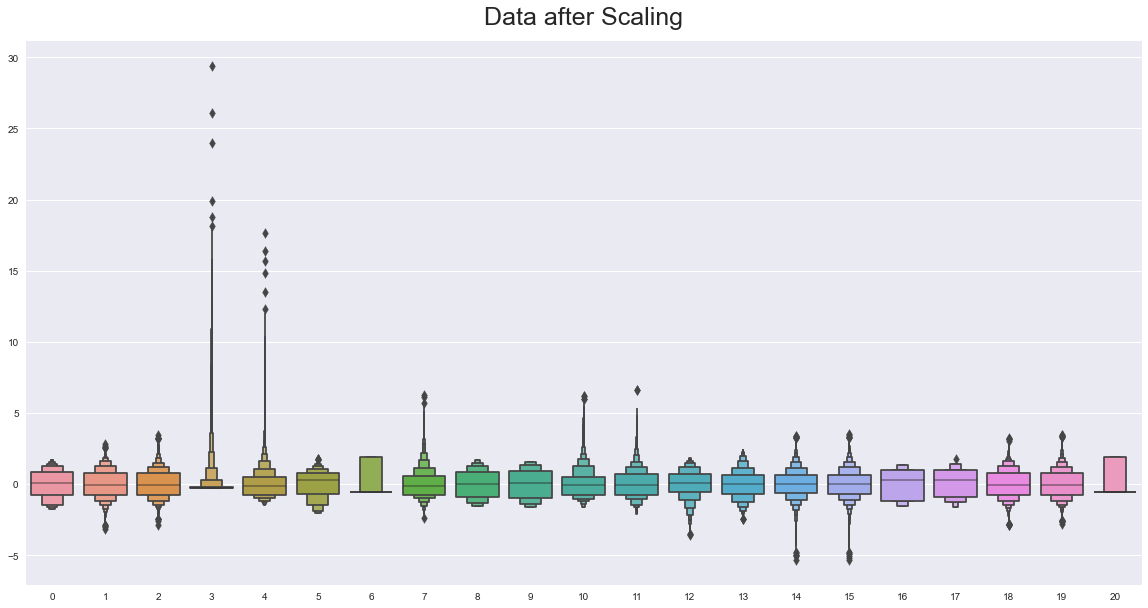

In [32]:
plt.figure(figsize=(20,10))
plt.title("Data after Scaling", fontsize=25, y=1.02)
sns.boxenplot(data = X_train)
plt.show()

# Traing  Model - select k best

In [33]:
from sklearn.linear_model import LogisticRegression
# create model
classifier= LogisticRegression()
# fitting training data to the model
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 0 1 ... 1 0 0]


In [34]:
print(list(zip(Y_test,Y_pred))) # compare the  Y_predicate value 

[(0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0),

In [35]:
print(list(zip(df.columns[:-1],classifier.coef_.ravel())))

[('Location', -0.013827719670683124), ('MinTemp', -0.26741262098555807), ('MaxTemp', 0.12477272102573275), ('Rainfall', 0.08324452362483374), ('Evaporation', -0.01744115280224519), ('Sunshine', -0.5592348375344014), ('WindGustDir', 0.0922479843811349), ('WindGustSpeed', 0.7808205075397273), ('WindDir9am', -0.020600385443379835), ('WindDir3pm', 0.06934614313474001), ('WindSpeed9am', -0.11690667202333191), ('WindSpeed3pm', -0.22204424528343686), ('Humidity9am', 0.04342882723628192), ('Humidity3pm', 1.134001403426125), ('Pressure9am', 1.007882817157798), ('Pressure3pm', -1.419435812319308), ('Cloud9am', -0.057135256836973444), ('Cloud3pm', 0.3102016753105925), ('Temp9am', 0.2408523000126083), ('Temp3pm', -0.03278959679016937), ('RainToday', 0.09224798438113588)]


In [36]:
print(classifier.intercept_)

[-1.94720325]


In [37]:
classifier.coef_

array([[-0.01382772, -0.26741262,  0.12477272,  0.08324452, -0.01744115,
        -0.55923484,  0.09224798,  0.78082051, -0.02060039,  0.06934614,
        -0.11690667, -0.22204425,  0.04342883,  1.1340014 ,  1.00788282,
        -1.41943581, -0.05713526,  0.31020168,  0.2408523 , -0.0327896 ,
         0.09224798]])

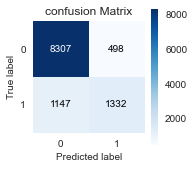

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8805
           1       0.73      0.54      0.62      2479

    accuracy                           0.85     11284
   macro avg       0.80      0.74      0.76     11284
weighted avg       0.85      0.85      0.85     11284

Accuracy of the model:  0.8542183622828784


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

In [39]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ["Model",'Accuracy']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_logmodel_full_metrics = pd.Series({'Model': "Log_base ",
                     'Accuracy':acc      
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)

# print the result table
result_tabulation


,Model,Accuracy
0,Log_base,0.854218


In [40]:
### probability matrix 
# store the predicted probabolities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)


[[0.85502039 0.14497961]
 [0.83940972 0.16059028]
 [0.05791352 0.94208648]
 ...
 [0.08762627 0.91237373]
 [0.98281249 0.01718751]
 [0.70485783 0.29514217]]


### adjusting the threshold 

In [41]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1681  , type 2 error : 930  , type 1 error: 751
Errors at threshold  0.41000000000000003 : 1680  , type 2 error : 950  , type 1 error: 730
Errors at threshold  0.42000000000000004 : 1675  , type 2 error : 974  , type 1 error: 701
Errors at threshold  0.43000000000000005 : 1679  , type 2 error : 1001  , type 1 error: 678
Errors at threshold  0.44000000000000006 : 1665  , type 2 error : 1016  , type 1 error: 649
Errors at threshold  0.45000000000000007 : 1670  , type 2 error : 1047  , type 1 error: 623
Errors at threshold  0.4600000000000001 : 1667  , type 2 error : 1069  , type 1 error: 598
Errors at threshold  0.4700000000000001 : 1661  , type 2 error : 1085  , type 1 error: 576
Errors at threshold  0.4800000000000001 : 1655  , type 2 error : 1105  , type 1 error: 550
Errors at threshold  0.4900000000000001 : 1655  , type 2 error : 1130  , type 1 error: 525
Errors at threshold  0.5000000000000001 : 1645  , type 2 error : 1147  , type 1 error: 498
Errors at th

In [42]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value >0.49:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

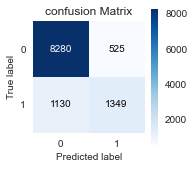

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8805
           1       0.72      0.54      0.62      2479

    accuracy                           0.85     11284
   macro avg       0.80      0.74      0.76     11284
weighted avg       0.84      0.85      0.85     11284

Accuracy of the model:  0.8533321517192485


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,y_pred_class)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

In [44]:
# append the result table 
# compile the required information
linreg_nolog_model_metrics = pd.Series({'Model': "Log-threshold ",
                                                 "Accuracy":acc})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_nolog_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,Accuracy
0,Log_base,0.854218
1,Log-threshold,0.853332


# Area under  curve - (AUC)

In [45]:
from sklearn import metrics 
fpr, tpr, z = metrics.roc_curve(Y_test,y_pred_prob[:,1])
auc=metrics.auc(fpr,tpr)

print(auc)

0.884037705482441


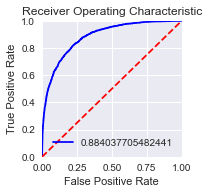

In [46]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [47]:
from sklearn import metrics 
# my_pred_class is the list of predicated values on the basis of 0.49 threshold    
fpr, tpr, z = metrics.roc_curve(Y_test,y_pred_class)
auc=metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)


0.7422729118805805
[0.         0.05962521 1.        ]
[0.         0.54417104 1.        ]


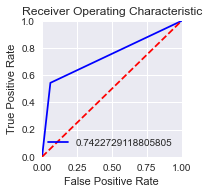

In [48]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

AUC:
1. Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.
2. Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error)
3. Finally conclude upon the threshold which gives you an AUC closest to the overall AUC.

## GSD  - log 

In [49]:
from sklearn.linear_model import SGDClassifier
#create a model
classifier=SGDClassifier(loss="log",random_state=10,learning_rate="constant",
                         eta0=0.001,max_iter=1000, shuffle=True,
                        early_stopping=True,n_iter_no_change=5)
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

#print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))
#print(classifier.intercept_)

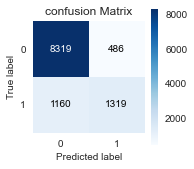

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8805
           1       0.73      0.53      0.62      2479

    accuracy                           0.85     11284
   macro avg       0.80      0.74      0.76     11284
weighted avg       0.85      0.85      0.85     11284

Accuracy of the model:  0.8541297412265154


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [51]:
classifier.n_iter_ # number of ecophs

6

In [52]:
classifier.t_  # intrartion 

270817.0

In [53]:
# append the result table 
# compile the required information
linreg_nolog_model_metrics = pd.Series({'Model': "SGD-LOG ",
                                                 "Accuracy":acc})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_nolog_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,Accuracy
0,Log_base,0.854218
1,Log-threshold,0.853332
2,SGD-LOG,0.854130


## closs_ validaition 

In [54]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv) #  remember to change classifier
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=10, shuffle=True)
[0.86065574 0.85844041 0.84625609 0.85135135 0.85112982 0.85290208
 0.85264791 0.85730113 0.85442056 0.85685797]
0.8541963054400712


In [55]:
"""Model	Accuracy
0	Log_base	0.854218
1	Log-threshold	0.853332
2	SGD-LOG	0.854130
3	cross_validation	0.854130 """

'Model\tAccuracy\n0\tLog_base\t0.854218\n1\tLog-threshold\t0.853332\n2\tSGD-LOG\t0.854130\n3\tcross_validation\t0.854130 '

### appling  cross validation  model 

In [56]:
# cross validation 
# train_value indicate  9 value   test_value indicate 1 value 
for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])
               # fit will train 9 fold in each iteration and predict will test on the remaning one fold in each iteration 
    
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

KeyError: '[1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 15, 17, 18, 19, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 271, 272, 273, 274, 275, 276, 277, 278, 279, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 295, 297, 298, 300, 301, 302, 303, 305, 306, 308, 309, 310, 311, 312, 313, 314, 315, 317, 318, 319, 320, 321, 322, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 336, 337, 338, 339, 340, 342, 343, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384, 385, 387, 388, 389, 391, 392, 393, 394, 395, 396, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 462, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 526, 527, 528, 529, 530, 531, 532, 533, 534, 536, 537, 538, 540, 541, 542, 543, 544, 545, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 614, 615, 616, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 631, 632, 633, 634, 635, 636, 637, 638, 639, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 693, 694, 695, 696, 697, 698, 699, 700, 702, 703, 704, 705, 706, 708, 709, 710, 711, 712, 713, 714, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 796, 797, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 816, 817, 818, 821, 822, 823, 824, 826, 827, 829, 830, 831, 832, 833, 834, 835, 836, 838, 839, 840, 841, 842, 843, 845, 846, 847, 848, 849, 850, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 870, 871, 872, 873, 874, 875, 877, 878, 880, 881, 882, 883, 884, 885, 888, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 929, 930, 931, 932, 933, 934, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 953, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 974, 975, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 991, 992, 994, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1012, 1013, 1014, 1015, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1067, 1068, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1081, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1146, 1147, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1205, 1207, 1208, 1209, 1210, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1283, 1284, 1285, 1286, 1287, 1288, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1299, 1300, 1301, 1302, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1325, 1326, 1327, 1329, 1330, 1332, 1334, 1335, 1336, 1338, 1339, 1340, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1354, 1355, 1356, 1358, 1360, 1361, 1362, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1378, 1379, 1380, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1410, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1529, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1550, 1553, 1554, 1555, 1557, 1558, 1559, 1560, 1561, 1563, 1564, 1565, 1566, 1567, 1568, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1608, 1609, 1610, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1621, 1622, 1623, 1625, 1626, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1670, 1672, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1723, 1724, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1761, 1762, 1763, 1764, 1765, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1890, 1891, 1892, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1905, 1906, 1907, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1918, 1919, 1920, 1921, 1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1941, 1943, 1944, 1946, 1947, 1948, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1973, 1974, 1975, 1976, 1977, 1979, 1980, 1981, 1982, 1983, 1985, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2112, 2113, 2114, 2115, 2117, 2118, 2119, 2120, 2121, 2123, 2125, 2126, 2127, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2161, 2162, 2163, 2164, 2165, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2194, 2195, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2210, 2211, 2212, 2213, 2214, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2235, 2236, 2237, 2238, 2239, 2240, 2242, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2282, 2283, 2284, 2286, 2287, 2288, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2394, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2410, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2441, 2442, 2443, 2444, 2446, 2447, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2487, 2488, 2489, 2491, 2492, 2494, 2495, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2505, 2507, 2508, 2509, 2510, 2511, 2512, 2514, 2515, 2516, 2517, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2615, 2616, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2638, 2639, 2640, 2642, 2643, 2644, 2645, 2647, 2649, 2651, 2652, 2654, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2686, 2687, 2688, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2699, 2700, 2702, 2703, 2704, 2705, 2706, 2708, 2709, 2710, 2711, 2712, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2743, 2744, 2745, 2746, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2807, 2808, 2809, 2811, 2812, 2813, 2814, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2830, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2881, 2882, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2910, 2911, 2912, 2913, 2915, 2917, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2929, 2930, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2955, 2956, 2957, 2958, 2959, 2961, 2963, 2964, 2965, 2967, 2968, 2969, 2970, 2971, 2972, 2974, 2975, 2976, 2977, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3024, 3025, 3026, 3027, 3028, 3029, 3033, 3034, 3035, 3036, 3038, 3039, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3059, 3061, 3063, 3064, 3065, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3102, 3103, 3104, 3105, 3106, 3108, 3109, 3110, 3111, 3113, 3114, 3115, 3116, 3117, 3118, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3166, 3167, 3168, 3170, 3171, 3172, 3173, 3174, 3175, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3254, 3255, 3256, 3257, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3267, 3268, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3306, 3307, 3308, 3309, 3310, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3428, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3481, 3482, 3483, 3484, 3486, 3487, 3488, 3489, 3490, 3491, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3532, 3533, 3534, 3536, 3537, 3538, 3539, 3540, 3542, 3543, 3544, 3545, 3546, 3547, 3549, 3550, 3551, 3552, 3553, 3554, 3555, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 3570, 3573, 3574, 3575, 3576, 3578, 3579, 3580, 3581, 3582, 3583, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3632, 3633, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3646, 3647, 3649, 3652, 3654, 3655, 3656, 3658, 3659, 3660, 3661, 3662, 3663, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 3696, 3698, 3700, 3701, 3703, 3704, 3705, 3706, 3707, 3708, 3709, 3710, 3711, 3712, 3714, 3715, 3716, 3717, 3718, 3719, 3720, 3721, 3722, 3723, 3724, 3725, 3726, 3727, 3728, 3729, 3730, 3731, 3732, 3733, 3734, 3735, 3736, 3737, 3738, 3739, 3740, 3742, 3743, 3744, 3745, 3746, 3747, 3748, 3749, 3750, 3751, 3753, 3754, 3755, 3756, 3757, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3778, 3779, 3780, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3791, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817, 3819, 3820, 3821, 3822, 3823, 3824, 3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832, 3833, 3834, 3835, 3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3846, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3854, 3855, 3856, 3857, 3858, 3859, 3860, 3861, 3862, 3863, 3864, 3865, 3866, 3868, 3869, 3870, 3871, 3872, 3875, 3876, 3877, 3878, 3880, 3881, 3882, 3883, 3884, 3885, 3886, 3887, 3888, 3889, 3891, 3892, 3893, 3894, 3895, 3896, 3898, 3900, 3901, 3902, 3903, 3904, 3905, 3907, 3908, 3909, 3910, 3911, 3914, 3915, 3916, 3917, 3918, 3919, 3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927, 3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3940, 3941, 3942, 3943, 3944, 3945, 3946, 3947, 3948, 3949, 3950, 3951, 3952, 3953, 3954, 3956, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974, 3977, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3986, 3987, 3988, 3989, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999, 4000, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4015, 4016, 4018, 4019, 4021, 4022, 4023, 4024, 4025, 4026, 4028, 4029, 4030, 4032, 4033, 4034, 4035, 4037, 4038, 4040, 4041, 4042, 4044, 4045, 4046, 4047, 4048, 4050, 4052, 4053, 4054, 4055, 4056, 4057, 4059, 4060, 4061, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069, 4070, 4071, 4072, 4073, 4074, 4075, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4084, 4085, 4087, 4089, 4090, 4092, 4093, 4094, 4095, 4097, 4098, 4099, 4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4114, 4115, 4116, 4117, 4118, 4119, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 4139, 4140, 4142, 4143, 4144, 4145, 4146, 4148, 4149, 4154, 4155, 4156, 4157, 4158, 4159, 4160, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4169, 4170, 4171, 4173, 4174, 4175, 4176, 4177, 4178, 4179, 4180, 4181, 4183, 4184, 4185, 4186, 4187, 4188, 4189, 4190, 4191, 4192, 4193, 4194, 4195, 4196, 4197, 4198, 4199, 4201, 4202, 4203, 4204, 4205, 4206, 4207, 4208, 4210, 4211, 4212, 4213, 4214, 4215, 4216, 4217, 4219, 4220, 4221, 4222, 4223, 4224, 4226, 4227, 4228, 4229, 4230, 4231, 4232, 4233, 4234, 4235, 4236, 4237, 4238, 4239, 4242, 4243, 4244, 4246, 4247, 4248, 4249, 4250, 4251, 4252, 4254, 4255, 4256, 4257, 4258, 4259, 4260, 4261, 4262, 4263, 4264, 4265, 4266, 4267, 4268, 4270, 4271, 4272, 4273, 4274, 4275, 4276, 4278, 4279, 4280, 4281, 4283, 4284, 4285, 4286, 4287, 4288, 4289, 4290, 4291, 4292, 4293, 4294, 4295, 4296, 4297, 4298, 4299, 4300, 4301, 4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309, 4310, 4311, 4312, 4314, 4315, 4316, 4317, 4318, 4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327, 4328, 4329, 4330, 4331, 4333, 4336, 4337, 4338, 4339, 4340, 4342, 4344, 4345, 4346, 4347, 4348, 4350, 4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4360, 4361, 4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4373, 4374, 4375, 4376, 4377, 4379, 4380, 4381, 4382, 4383, 4384, 4385, 4386, 4387, 4388, 4389, 4390, 4391, 4392, 4394, 4395, 4397, 4398, 4399, 4400, 4401, 4402, 4403, 4404, 4405, 4407, 4408, 4409, 4410, 4411, 4412, 4413, 4414, 4415, 4416, 4417, 4418, 4419, 4420, 4421, 4422, 4423, 4424, 4425, 4426, 4427, 4428, 4429, 4431, 4432, 4433, 4435, 4436, 4437, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452, 4454, 4455, 4457, 4458, 4459, 4460, 4461, 4462, 4464, 4465, 4466, 4467, 4468, 4470, 4471, 4473, 4474, 4475, 4476, 4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 4487, 4488, 4489, 4490, 4491, 4492, 4493, 4494, 4495, 4497, 4498, 4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509, 4510, 4511, 4512, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4523, 4525, 4526, 4527, 4528, 4530, 4531, 4532, 4533, 4534, 4536, 4537, 4538, 4540, 4541, 4542, 4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4555, 4556, 4557, 4559, 4560, 4561, 4562, 4563, 4565, 4567, 4568, 4569, 4570, 4571, 4572, 4573, 4575, 4576, 4577, 4578, 4579, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4589, 4590, 4591, 4592, 4593, 4594, 4595, 4596, 4597, 4598, 4599, 4600, 4601, 4602, 4603, 4604, 4605, 4606, 4607, 4608, 4609, 4610, 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4622, 4623, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4638, 4639, 4640, 4641, 4642, 4643, 4645, 4646, 4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4664, 4665, 4666, 4667, 4668, 4669, 4670, 4671, 4672, 4674, 4675, 4676, 4677, 4678, 4680, 4681, 4682, 4683, 4684, 4686, 4687, 4688, 4689, 4690, 4691, 4692, 4693, 4694, 4695, 4696, 4699, 4700, 4701, 4702, 4703, 4704, 4705, 4706, 4707, 4708, 4709, 4710, 4711, 4712, 4713, 4714, 4716, 4717, 4718, 4719, 4720, 4721, 4722, 4723, 4724, 4725, 4726, 4727, 4729, 4730, 4731, 4732, 4733, 4735, 4736, 4737, 4738, 4739, 4740, 4741, 4743, 4744, 4745, 4746, 4747, 4748, 4749, 4750, 4751, 4752, 4753, 4754, 4755, 4756, 4758, 4759, 4760, 4763, 4764, 4765, 4766, 4767, 4769, 4770, 4771, 4774, 4775, 4776, 4777, 4778, 4779, 4781, 4782, 4783, 4784, 4785, 4786, 4787, 4788, 4789, 4790, 4791, 4792, 4795, 4797, 4798, 4799, 4800, 4801, 4803, 4804, 4806, 4807, 4809, 4810, 4811, 4812, 4813, 4814, 4816, 4817, 4818, 4819, 4820, 4821, 4822, 4823, 4825, 4826, 4827, 4828, 4829, 4830, 4831, 4832, 4834, 4835, 4836, 4837, 4838, 4839, 4840, 4841, 4842, 4843, 4844, 4845, 4846, 4847, 4848, 4849, 4850, 4851, 4852, 4853, 4854, 4855, 4856, 4859, 4860, 4861, 4862, 4864, 4865, 4866, 4867, 4868, 4869, 4870, 4871, 4872, 4873, 4874, 4875, 4876, 4877, 4878, 4879, 4880, 4881, 4882, 4883, 4884, 4885, 4886, 4887, 4888, 4890, 4891, 4892, 4893, 4894, 4895, 4896, 4897, 4898, 4899, 4900, 4901, 4902, 4903, 4905, 4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 4917, 4918, 4919, 4920, 4921, 4922, 4923, 4924, 4925, 4926, 4927, 4929, 4930, 4931, 4932, 4933, 4934, 4935, 4937, 4938, 4939, 4940, 4941, 4942, 4943, 4944, 4945, 4946, 4947, 4948, 4949, 4950, 4951, 4952, 4953, 4954, 4955, 4957, 4958, 4959, 4960, 4961, 4962, 4963, 4964, 4965, 4966, 4967, 4968, 4970, 4971, 4972, 4973, 4974, 4975, 4977, 4978, 4979, 4980, 4981, 4982, 4983, 4984, 4985, 4986, 4987, 4988, 4989, 4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999, 5000, 5001, 5002, 5003, 5004, 5005, 5006, 5007, 5008, 5009, 5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5022, 5023, 5024, 5025, 5026, 5027, 5028, 5029, 5030, 5031, 5032, 5033, 5034, 5035, 5036, 5037, 5038, 5039, 5040, 5041, 5042, 5043, 5044, 5045, 5046, 5047, 5048, 5049, 5050, 5051, 5052, 5053, 5054, 5055, 5056, 5057, 5058, 5059, 5060, 5061, 5063, 5064, 5065, 5066, 5067, 5068, 5069, 5070, 5071, 5072, 5074, 5075, 5076, 5077, 5078, 5079, 5080, 5081, 5082, 5083, 5084, 5085, 5086, 5088, 5089, 5090, 5091, 5092, 5093, 5094, 5095, 5096, 5098, 5099, 5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107, 5108, 5109, 5110, 5111, 5112, 5114, 5115, 5116, 5117, 5118, 5119, 5121, 5122, 5123, 5124, 5125, 5126, 5128, 5129, 5130, 5131, 5132, 5133, 5134, 5135, 5136, 5137, 5138, 5139, 5141, 5142, 5143, 5144, 5145, 5147, 5148, 5149, 5150, 5151, 5152, 5153, 5154, 5155, 5156, 5157, 5158, 5159, 5160, 5161, 5162, 5163, 5164, 5165, 5166, 5167, 5168, 5169, 5170, 5171, 5173, 5174, 5175, 5176, 5177, 5178, 5179, 5180, 5181, 5182, 5183, 5184, 5185, 5186, 5187, 5188, 5189, 5190, 5191, 5192, 5193, 5194, 5195, 5196, 5197, 5198, 5199, 5200, 5201, 5202, 5204, 5205, 5206, 5207, 5208, 5209, 5211, 5212, 5214, 5215, 5218, 5219, 5220, 5222, 5223, 5224, 5225, 5227, 5228, 5229, 5230, 5231, 5232, 5233, 5234, 5235, 5236, 5237, 5238, 5239, 5240, 5241, 5242, 5243, 5244, 5245, 5246, 5247, 5248, 5249, 5251, 5252, 5253, 5254, 5255, 5256, 5257, 5258, 5260, 5261, 5263, 5264, 5265, 5266, 5267, 5268, 5269, 5270, 5271, 5272, 5273, 5274, 5275, 5276, 5277, 5278, 5279, 5280, 5281, 5282, 5283, 5284, 5285, 5286, 5287, 5288, 5289, 5290, 5291, 5292, 5293, 5294, 5296, 5297, 5298, 5299, 5300, 5301, 5302, 5303, 5304, 5305, 5306, 5307, 5308, 5310, 5311, 5312, 5313, 5314, 5315, 5316, 5317, 5319, 5320, 5321, 5323, 5324, 5325, 5326, 5327, 5328, 5330, 5331, 5332, 5333, 5334, 5335, 5336, 5337, 5338, 5339, 5340, 5341, 5342, 5343, 5344, 5345, 5346, 5347, 5348, 5349, 5350, 5351, 5352, 5353, 5354, 5356, 5357, 5358, 5359, 5360, 5361, 5363, 5364, 5365, 5367, 5368, 5369, 5370, 5371, 5372, 5373, 5374, 5375, 5376, 5377, 5378, 5379, 5380, 5381, 5382, 5383, 5384, 5385, 5387, 5388, 5389, 5390, 5391, 5393, 5394, 5395, 5396, 5397, 5398, 5399, 5400, 5402, 5403, 5404, 5406, 5407, 5408, 5409, 5410, 5411, 5412, 5413, 5414, 5415, 5416, 5417, 5418, 5419, 5420, 5421, 5422, 5423, 5424, 5425, 5426, 5427, 5428, 5429, 5431, 5432, 5433, 5434, 5436, 5437, 5438, 5439, 5440, 5441, 5442, 5443, 5444, 5445, 5446, 5447, 5448, 5449, 5450, 5453, 5455, 5456, 5457, 5458, 5460, 5461, 5463, 5464, 5465, 5467, 5468, 5469, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5480, 5482, 5483, 5484, 5485, 5486, 5487, 5488, 5489, 5490, 5491, 5493, 5494, 5495, 5496, 5497, 5498, 5499, 5500, 5501, 5503, 5504, 5505, 5506, 5507, 5508, 5509, 5510, 5512, 5513, 5514, 5515, 5517, 5518, 5519, 5520, 5521, 5522, 5524, 5525, 5526, 5529, 5530, 5532, 5533, 5534, 5535, 5537, 5538, 5539, 5540, 5541, 5542, 5544, 5545, 5546, 5547, 5548, 5549, 5550, 5551, 5552, 5553, 5554, 5556, 5557, 5558, 5559, 5560, 5561, 5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571, 5572, 5573, 5574, 5575, 5576, 5577, 5579, 5580, 5581, 5582, 5583, 5584, 5585, 5586, 5588, 5589, 5590, 5592, 5593, 5594, 5595, 5596, 5597, 5598, 5599, 5600, 5601, 5602, 5603, 5604, 5605, 5606, 5607, 5608, 5609, 5610, 5611, 5612, 5613, 5614, 5615, 5616, 5617, 5619, 5620, 5621, 5622, 5623, 5625, 5626, 5627, 5628, 5630, 5631, 5633, 5635, 5636, 5637, 5638, 5639, 5640, 5641, 5642, 5643, 5644, 5646, 5647, 5648, 5649, 5650, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663, 5664, 5665, 5666, 5667, 5668, 5669, 5670, 5671, 5672, 5673, 5674, 5675, 5676, 5677, 5678, 5679, 5680, 5681, 5682, 5683, 5684, 5685, 5686, 5687, 5689, 5690, 5691, 5693, 5694, 5695, 5696, 5698, 5699, 5700, 5701, 5702, 5704, 5705, 5706, 5707, 5708, 5709, 5710, 5712, 5713, 5714, 5715, 5717, 5718, 5719, 5720, 5721, 5722, 5724, 5725, 5726, 5727, 5728, 5729, 5730, 5731, 5732, 5733, 5734, 5735, 5738, 5739, 5740, 5741, 5742, 5743, 5744, 5745, 5747, 5748, 5749, 5750, 5751, 5752, 5753, 5754, 5756, 5757, 5758, 5759, 5760, 5761, 5762, 5763, 5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803, 5804, 5805, 5806, 5807, 5808, 5809, 5810, 5811, 5812, 5813, 5814, 5816, 5817, 5819, 5821, 5822, 5823, 5824, 5825, 5826, 5827, 5828, 5829, 5830, 5831, 5832, 5833, 5834, 5835, 5836, 5838, 5839, 5840, 5841, 5842, 5844, 5845, 5846, 5847, 5848, 5849, 5851, 5852, 5853, 5854, 5855, 5856, 5857, 5858, 5859, 5860, 5861, 5863, 5864, 5865, 5866, 5867, 5868, 5869, 5870, 5872, 5873, 5875, 5876, 5877, 5878, 5879, 5880, 5881, 5882, 5883, 5885, 5886, 5887, 5888, 5889, 5890, 5891, 5892, 5893, 5894, 5895, 5896, 5897, 5898, 5899, 5900, 5901, 5902, 5903, 5904, 5905, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 5914, 5915, 5916, 5918, 5919, 5920, 5921, 5922, 5923, 5925, 5926, 5928, 5929, 5930, 5931, 5932, 5934, 5935, 5936, 5938, 5940, 5942, 5943, 5944, 5945, 5946, 5947, 5948, 5949, 5950, 5951, 5952, 5953, 5954, 5955, 5956, 5958, 5959, 5960, 5961, 5962, 5964, 5965, 5966, 5967, 5968, 5969, 5970, 5971, 5974, 5975, 5976, 5977, 5978, 5979, 5981, 5982, 5983, 5985, 5986, 5987, 5988, 5989, 5990, 5991, 5992, 5993, 5994, 5995, 5996, 5997, 5998, 5999, 6000, 6001, 6002, 6003, 6004, 6005, 6007, 6008, 6009, 6010, 6011, 6012, 6013, 6014, 6015, 6016, 6017, 6018, 6019, 6020, 6021, 6022, 6023, 6024, 6025, 6026, 6027, 6028, 6029, 6030, 6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040, 6041, 6042, 6043, 6044, 6045, 6046, 6047, 6048, 6049, 6050, 6051, 6055, 6058, 6059, 6066, 6070, 6077, 6079, 6081, 6083, 6089, 6090, 6092, 6101, 6107, 6108, 6111, 6114, 6118, 6121, 6122, 6123, 6135, 6138, 6141, 6142, 6152, 6162, 6168, 6170, 6177, 6178, 6181, 6186, 6187, 6196, 6199, 6202, 6207, 6209, 6222, 6224, 6226, 6228, 6230, 6239, 6243, 6245, 6249, 6250, 6260, 6261, 6262, 6263, 6264, 6267, 6279, 6280, 6281, 6282, 6284, 6290, 6293, 6294, 6295, 6296, 6301, 6304, 6312, 6314, 6326, 6327, 6331, 6334, 6336, 6337, 6344, 6345, 6346, 6348, 6356, 6362, 6364, 6367, 6372, 6375, 6379, 6384, 6391, 6393, 6403, 6410, 6424, 6429, 6432, 6435, 6439, 6443, 6449, 6453, 6454, 6456, 6458, 6462, 6464, 6468, 6474, 6491, 6500, 6515, 6516, 6518, 6528, 6537, 6538, 6541, 6545, 6548, 6549, 6558, 6563, 6566, 6571, 6575, 6582, 6583, 6586, 6591, 6597, 6603, 6610, 6615, 6616, 6617, 6619, 6620, 6621, 6622, 6623, 6624, 6625, 6626, 6627, 6628, 6631, 6632, 6633, 6634, 6635, 6636, 6638, 6639, 6641, 6642, 6643, 6644, 6645, 6646, 6647, 6648, 6649, 6650, 6651, 6652, 6653, 6654, 6655, 6656, 6657, 6658, 6659, 6660, 6661, 6662, 6663, 6664, 6665, 6666, 6667, 6668, 6669, 6670, 6671, 6672, 6673, 6676, 6677, 6678, 6679, 6681, 6682, 6683, 6684, 6685, 6686, 6687, 6688, 6689, 6691, 6693, 6694, 6695, 6696, 6698, 6699, 6700, 6701, 6702, 6703, 6704, 6705, 6706, 6707, 6708, 6709, 6710, 6711, 6712, 6713, 6714, 6715, 6716, 6717, 6718, 6719, 6720, 6721, 6723, 6724, 6725, 6726, 6727, 6728, 6729, 6730, 6731, 6732, 6735, 6736, 6737, 6738, 6739, 6740, 6741, 6742, 6743, 6744, 6745, 6746, 6747, 6748, 6749, 6750, 6751, 6752, 6753, 6755, 6757, 6758, 6759, 6760, 6761, 6762, 6764, 6765, 6766, 6767, 6768, 6769, 6770, 6771, 6772, 6773, 6774, 6775, 6776, 6777, 6778, 6779, 6780, 6781, 6782, 6783, 6784, 6785, 6786, 6787, 6788, 6789, 6791, 6792, 6793, 6794, 6795, 6796, 6797, 6798, 6799, 6800, 6801, 6802, 6803, 6804, 6805, 6806, 6807, 6808, 6809, 6810, 6811, 6813, 6815, 6816, 6817, 6818, 6819, 6822, 6823, 6824, 6825, 6826, 6828, 6829, 6830, 6831, 6832, 6833, 6834, 6835, 6836, 6837, 6838, 6839, 6840, 6841, 6842, 6843, 6844, 6845, 6846, 6847, 6848, 6849, 6850, 6851, 6852, 6853, 6856, 6857, 6858, 6859, 6860, 6861, 6862, 6863, 6864, 6865, 6867, 6868, 6870, 6871, 6872, 6873, 6874, 6876, 6877, 6878, 6879, 6880, 6881, 6882, 6883, 6884, 6885, 6886, 6887, 6888, 6889, 6890, 6891, 6892, 6894, 6895, 6896, 6897, 6898, 6899, 6900, 6902, 6903, 6904, 6905, 6906, 6907, 6908, 6909, 6910, 6911, 6912, 6914, 6915, 6916, 6917, 6918, 6919, 6921, 6922, 6923, 6924, 6925, 6926, 6927, 6929, 6930, 6931, 6932, 6933, 6934, 6935, 6936, 6937, 6938, 6940, 6941, 6942, 6943, 6944, 6945, 6946, 6947, 6948, 6949, 6950, 6951, 6952, 6953, 6954, 6955, 6956, 6957, 6958, 6959, 6960, 6961, 6962, 6963, 6964, 6965, 6966, 6967, 6968, 6969, 6970, 6971, 6972, 6973, 6974, 6975, 6976, 6977, 6978, 6979, 6980, 6982, 6983, 6984, 6985, 6986, 6987, 6988, 6990, 6991, 6992, 6993, 6994, 6995, 6996, 6997, 6999, 7000, 7001, 7002, 7003, 7004, 7005, 7006, 7007, 7008, 7009, 7011, 7012, 7014, 7015, 7016, 7018, 7020, 7021, 7023, 7024, 7025, 7026, 7027, 7028, 7029, 7030, 7031, 7032, 7033, 7034, 7036, 7037, 7038, 7040, 7041, 7042, 7043, 7044, 7045, 7046, 7048, 7049, 7050, 7052, 7053, 7054, 7055, 7056, 7057, 7058, 7059, 7061, 7062, 7063, 7064, 7065, 7066, 7067, 7068, 7070, 7071, 7072, 7073, 7074, 7075, 7077, 7078, 7079, 7080, 7081, 7082, 7083, 7084, 7085, 7086, 7087, 7088, 7089, 7090, 7091, 7092, 7093, 7094, 7095, 7096, 7097, 7098, 7099, 7100, 7101, 7102, 7103, 7104, 7105, 7106, 7107, 7108, 7109, 7110, 7111, 7112, 7113, 7114, 7115, 7116, 7117, 7118, 7119, 7120, 7121, 7123, 7124, 7125, 7127, 7128, 7129, 7130, 7131, 7132, 7133, 7134, 7135, 7136, 7137, 7138, 7139, 7140, 7141, 7142, 7143, 7144, 7145, 7146, 7148, 7149, 7150, 7151, 7152, 7153, 7155, 7156, 7157, 7158, 7159, 7161, 7162, 7163, 7164, 7165, 7166, 7167, 7168, 7169, 7170, 7171, 7172, 7173, 7174, 7176, 7178, 7179, 7180, 7181, 7182, 7183, 7184, 7185, 7186, 7187, 7189, 7190, 7191, 7192, 7193, 7194, 7195, 7196, 7197, 7198, 7199, 7200, 7201, 7202, 7203, 7204, 7205, 7206, 7207, 7208, 7209, 7210, 7211, 7212, 7213, 7214, 7215, 7217, 7218, 7219, 7221, 7222, 7223, 7224, 7225, 7226, 7227, 7228, 7229, 7230, 7231, 7232, 7233, 7234, 7235, 7237, 7238, 7239, 7240, 7241, 7242, 7243, 7244, 7246, 7248, 7249, 7250, 7251, 7253, 7254, 7255, 7256, 7257, 7258, 7259, 7260, 7261, 7263, 7264, 7265, 7266, 7267, 7268, 7269, 7270, 7272, 7273, 7274, 7276, 7277, 7279, 7280, 7281, 7282, 7283, 7285, 7287, 7288, 7289, 7290, 7291, 7292, 7293, 7294, 7295, 7296, 7297, 7298, 7299, 7300, 7301, 7302, 7303, 7304, 7305, 7306, 7307, 7308, 7310, 7311, 7312, 7313, 7315, 7316, 7317, 7318, 7319, 7320, 7322, 7324, 7325, 7326, 7329, 7330, 7331, 7332, 7333, 7334, 7335, 7336, 7337, 7338, 7339, 7340, 7341, 7342, 7343, 7344, 7345, 7346, 7347, 7348, 7349, 7350, 7351, 7352, 7353, 7354, 7355, 7356, 7357, 7358, 7359, 7360, 7361, 7362, 7363, 7364, 7365, 7366, 7367, 7368, 7369, 7370, 7371, 7372, 7373, 7374, 7375, 7376, 7377, 7378, 7379, 7380, 7381, 7382, 7383, 7384, 7385, 7386, 7387, 7388, 7389, 7390, 7391, 7392, 7393, 7394, 7395, 7396, 7397, 7398, 7399, 7401, 7402, 7403, 7404, 7406, 7407, 7408, 7410, 7411, 7412, 7413, 7414, 7415, 7416, 7417, 7418, 7419, 7420, 7422, 7423, 7424, 7425, 7426, 7427, 7428, 7429, 7430, 7432, 7433, 7434, 7435, 7437, 7439, 7440, 7441, 7442, 7443, 7445, 7446, 7447, 7448, 7449, 7450, 7451, 7453, 7454, 7455, 7456, 7457, 7458, 7459, 7460, 7461, 7462, 7463, 7464, 7465, 7466, 7467, 7468, 7470, 7471, 7472, 7473, 7474, 7475, 7476, 7477, 7478, 7479, 7480, 7481, 7482, 7483, 7485, 7486, 7487, 7488, 7489, 7490, 7491, 7492, 7493, 7494, 7495, 7496, 7497, 7498, 7500, 7501, 7502, 7503, 7504, 7505, 7506, 7507, 7508, 7509, 7510, 7511, 7512, 7513, 7514, 7515, 7516, 7517, 7518, 7519, 7520, 7521, 7522, 7524, 7525, 7526, 7528, 7529, 7530, 7531, 7532, 7533, 7534, 7535, 7536, 7537, 7540, 7541, 7542, 7543, 7544, 7545, 7546, 7547, 7548, 7549, 7550, 7551, 7552, 7553, 7554, 7555, 7556, 7557, 7558, 7559, 7560, 7561, 7562, 7563, 7564, 7565, 7566, 7567, 7568, 7569, 7570, 7571, 7573, 7574, 7575, 7576, 7577, 7578, 7579, 7580, 7581, 7582, 7583, 7584, 7585, 7586, 7587, 7588, 7589, 7590, 7591, 7592, 7593, 7594, 7595, 7597, 7598, 7599, 7600, 7601, 7602, 7603, 7604, 7606, 7608, 7609, 7610, 7611, 7612, 7613, 7615, 7616, 7617, 7618, 7619, 7620, 7621, 7622, 7623, 7624, 7625, 7626, 7627, 7628, 7629, 7630, 7631, 7633, 7634, 7635, 7636, 7637, 7638, 7639, 7640, 7641, 7642, 7643, 7644, 7646, 7647, 7648, 7649, 7650, 7651, 7652, 7653, 7654, 7655, 7656, 7657, 7658, 7659, 7660, 7661, 7662, 7663, 7664, 7665, 7666, 7667, 7669, 7670, 7671, 7672, 7673, 7674, 7676, 7677, 7678, 7679, 7680, 7681, 7682, 7683, 7684, 7685, 7686, 7687, 7688, 7689, 7690, 7691, 7692, 7694, 7695, 7696, 7697, 7698, 7699, 7701, 7702, 7703, 7704, 7705, 7706, 7708, 7709, 7710, 7711, 7712, 7713, 7714, 7715, 7716, 7717, 7718, 7720, 7721, 7723, 7724, 7725, 7726, 7728, 7729, 7731, 7732, 7733, 7734, 7735, 7736, 7737, 7738, 7739, 7740, 7741, 7742, 7743, 7744, 7745, 7746, 7748, 7749, 7750, 7751, 7752, 7754, 7755, 7756, 7757, 7758, 7759, 7761, 7762, 7763, 7764, 7765, 7766, 7767, 7768, 7769, 7770, 7771, 7772, 7773, 7774, 7776, 7777, 7778, 7779, 7780, 7782, 7783, 7784, 7785, 7786, 7787, 7788, 7789, 7790, 7791, 7792, 7793, 7794, 7795, 7796, 7797, 7798, 7799, 7800, 7802, 7804, 7805, 7806, 7807, 7808, 7809, 7810, 7811, 7812, 7813, 7814, 7815, 7816, 7817, 7818, 7819, 7820, 7821, 7822, 7823, 7824, 7825, 7826, 7827, 7828, 7829, 7831, 7832, 7833, 7834, 7835, 7837, 7838, 7839, 7840, 7842, 7843, 7844, 7845, 7846, 7849, 7850, 7852, 7853, 7854, 7855, 7856, 7857, 7858, 7859, 7860, 7861, 7862, 7863, 7864, 7865, 7866, 7869, 7871, 7872, 7873, 7874, 7875, 7876, 7877, 7878, 7880, 7881, 7882, 7883, 7884, 7885, 7886, 7887, 7888, 7889, 7890, 7891, 7892, 7894, 7895, 7898, 7899, 7900, 7901, 7902, 7904, 7905, 7906, 7908, 7909, 7910, 7911, 7912, 7913, 7914, 7915, 7916, 7917, 7918, 7919, 7920, 7922, 7923, 7924, 7925, 7926, 7927, 7929, 7930, 7931, 7932, 7933, 7935, 7936, 7938, 7939, 7940, 7941, 7942, 7943, 7944, 7945, 7946, 7947, 7948, 7950, 7951, 7952, 7953, 7954, 7955, 7956, 7957, 7958, 7959, 7960, 7961, 7962, 7963, 7964, 7965, 7966, 7967, 7968, 7969, 7970, 7971, 7972, 7973, 7974, 7975, 7976, 7977, 7978, 7979, 7980, 7981, 7982, 7983, 7984, 7985, 7986, 7987, 7988, 7989, 7990, 7991, 7992, 7993, 7995, 7996, 7997, 7998, 7999, 8000, 8001, 8003, 8004, 8005, 8006, 8007, 8008, 8009, 8010, 8011, 8012, 8014, 8015, 8016, 8017, 8018, 8019, 8020, 8021, 8022, 8023, 8024, 8025, 8026, 8027, 8028, 8030, 8031, 8032, 8034, 8035, 8036, 8037, 8038, 8039, 8040, 8041, 8042, 8044, 8045, 8046, 8047, 8048, 8049, 8050, 8051, 8052, 8053, 8054, 8055, 8056, 8057, 8058, 8059, 8060, 8061, 8062, 8063, 8064, 8065, 8066, 8067, 8068, 8069, 8070, 8071, 8072, 8073, 8075, 8076, 8077, 8078, 8079, 8082, 8084, 8085, 8086, 8087, 8088, 8089, 8090, 8091, 8092, 8093, 8094, 8095, 8096, 8097, 8098, 8099, 8100, 8101, 8102, 8103, 8104, 8105, 8106, 8107, 8108, 8109, 8110, 8111, 8112, 8113, 8114, 8115, 8116, 8117, 8118, 8119, 8120, 8121, 8122, 8123, 8124, 8125, 8126, 8127, 8128, 8129, 8131, 8132, 8133, 8134, 8135, 8136, 8137, 8138, 8139, 8140, 8141, 8142, 8143, 8144, 8145, 8146, 8147, 8148, 8149, 8150, 8151, 8152, 8153, 8154, 8155, 8156, 8157, 8158, 8159, 8160, 8161, 8162, 8164, 8165, 8166, 8167, 8168, 8169, 8170, 8171, 8172, 8173, 8174, 8175, 8176, 8177, 8178, 8179, 8180, 8181, 8183, 8184, 8185, 8186, 8187, 8188, 8189, 8190, 8191, 8192, 8193, 8195, 8196, 8197, 8198, 8199, 8200, 8201, 8202, 8203, 8204, 8205, 8206, 8207, 8208, 8209, 8211, 8212, 8213, 8214, 8215, 8216, 8217, 8218, 8219, 8221, 8223, 8225, 8226, 8227, 8228, 8229, 8230, 8231, 8232, 8233, 8234, 8235, 8236, 8237, 8238, 8239, 8241, 8242, 8243, 8244, 8245, 8246, 8247, 8248, 8249, 8250, 8251, 8252, 8253, 8254, 8255, 8256, 8257, 8258, 8259, 8260, 8261, 8262, 8263, 8264, 8265, 8266, 8267, 8268, 8269, 8271, 8272, 8273, 8274, 8276, 8277, 8278, 8279, 8281, 8282, 8283, 8284, 8285, 8286, 8287, 8288, 8289, 8292, 8293, 8295, 8296, 8297, 8298, 8299, 8301, 8303, 8304, 8305, 8306, 8307, 8309, 8310, 8311, 8312, 8313, 8314, 8315, 8316, 8317, 8319, 8320, 8321, 8322, 8323, 8324, 8325, 8326, 8327, 8328, 8329, 8330, 8331, 8332, 8333, 8334, 8336, 8337, 8338, 8339, 8340, 8342, 8343, 8344, 8345, 8346, 8347, 8349, 8350, 8351, 8352, 8353, 8354, 8355, 8356, 8357, 8358, 8360, 8361, 8362, 8363, 8364, 8365, 8366, 8368, 8370, 8371, 8372, 8373, 8374, 8375, 8376, 8377, 8378, 8379, 8380, 8382, 8383, 8384, 8385, 8386, 8387, 8388, 8389, 8390, 8391, 8392, 8393, 8394, 8395, 8396, 8397, 8399, 8400, 8401, 8402, 8403, 8404, 8405, 8406, 8407, 8408, 8409, 8410, 8411, 8412, 8414, 8415, 8416, 8417, 8419, 8420, 8421, 8422, 8423, 8424, 8425, 8426, 8427, 8428, 8429, 8430, 8431, 8432, 8434, 8435, 8436, 8437, 8438, 8439, 8440, 8441, 8442, 8443, 8444, 8445, 8446, 8447, 8448, 8449, 8454, 8455, 8456, 8458, 8459, 8460, 8461, 8462, 8463, 8464, 8465, 8467, 8468, 8469, 8471, 8472, 8473, 8475, 8476, 8477, 8478, 8479, 8480, 8481, 8482, 8483, 8484, 8485, 8486, 8488, 8489, 8490, 8491, 8492, 8493, 8494, 8495, 8496, 8497, 8498, 8499, 8501, 8502, 8503, 8504, 8505, 8506, 8507, 8508, 8509, 8510, 8511, 8512, 8513, 8514, 8515, 8517, 8518, 8519, 8520, 8521, 8522, 8523, 8524, 8525, 8526, 8527, 8528, 8530, 8531, 8532, 8533, 8534, 8535, 8536, 8537, 8539, 8540, 8541, 8542, 8543, 8544, 8545, 8546, 8547, 8548, 8549, 8550, 8551, 8552, 8553, 8554, 8555, 8556, 8557, 8558, 8559, 8560, 8561, 8562, 8563, 8564, 8565, 8566, 8567, 8568, 8569, 8570, 8571, 8573, 8574, 8575, 8576, 8577, 8578, 8579, 8580, 8581, 8582, 8583, 8584, 8585, 8586, 8587, 8588, 8589, 8590, 8591, 8592, 8593, 8594, 8595, 8596, 8597, 8598, 8599, 8600, 8601, 8602, 8603, 8604, 8605, 8606, 8607, 8608, 8609, 8610, 8611, 8612, 8613, 8614, 8615, 8616, 8617, 8618, 8619, 8620, 8621, 8622, 8623, 8624, 8625, 8626, 8628, 8629, 8630, 8631, 8632, 8633, 8634, 8635, 8636, 8637, 8638, 8641, 8644, 8645, 8646, 8648, 8649, 8650, 8651, 8652, 8653, 8654, 8656, 8657, 8658, 8660, 8661, 8662, 8664, 8665, 8666, 8667, 8668, 8669, 8670, 8671, 8672, 8673, 8674, 8675, 8677, 8678, 8679, 8680, 8681, 8682, 8683, 8684, 8685, 8686, 8687, 8688, 8689, 8690, 8692, 8693, 8695, 8696, 8697, 8698, 8699, 8700, 8701, 8702, 8703, 8704, 8705, 8706, 8707, 8708, 8710, 8711, 8712, 8713, 8714, 8715, 8716, 8717, 8718, 8719, 8720, 8721, 8723, 8725, 8726, 8727, 8728, 8729, 8730, 8731, 8732, 8733, 8734, 8735, 8736, 8737, 8738, 8739, 8740, 8741, 8742, 8743, 8744, 8745, 8746, 8747, 8748, 8749, 8750, 8751, 8752, 8753, 8754, 8755, 8756, 8757, 8758, 8759, 8760, 8761, 8762, 8764, 8765, 8766, 8767, 8768, 8769, 8770, 8771, 8772, 8773, 8774, 8775, 8776, 8777, 8778, 8779, 8780, 8781, 8782, 8783, 8784, 8785, 8786, 8787, 8788, 8789, 8790, 8791, 8792, 8793, 8794, 8795, 8796, 8798, 8799, 8800, 8801, 8802, 8804, 8806, 8807, 8808, 8809, 8810, 8811, 8812, 8813, 8814, 8816, 8817, 8818, 8819, 8820, 8821, 8822, 8823, 8824, 8825, 8826, 8827, 8828, 8829, 8830, 8831, 8833, 8834, 8835, 8836, 8837, 8838, 8839, 8840, 8841, 8842, 8843, 8844, 8845, 8846, 8848, 8849, 8850, 8851, 8852, 8853, 8854, 8855, 8856, 8858, 8859, 8860, 8861, 8862, 8863, 8865, 8866, 8867, 8868, 8869, 8870, 8871, 8872, 8875, 8876, 8877, 8878, 8879, 8880, 8881, 8882, 8884, 8885, 8886, 8887, 8888, 8889, 8890, 8891, 8892, 8893, 8894, 8896, 8897, 8898, 8899, 8901, 8902, 8903, 8904, 8905, 8907, 8908, 8909, 8910, 8911, 8912, 8913, 8914, 8915, 8917, 8918, 8919, 8920, 8921, 8922, 8923, 8924, 8925, 8926, 8927, 8928, 8929, 8930, 8931, 8932, 8934, 8935, 8936, 8937, 8938, 8939, 8940, 8941, 8943, 8944, 8945, 8946, 8947, 8948, 8949, 8950, 8951, 8952, 8953, 8954, 8955, 8956, 8957, 8958, 8960, 8961, 8962, 8963, 8964, 8965, 8967, 8968, 8969, 8970, 8971, 8972, 8973, 8974, 8975, 8976, 8977, 8978, 8979, 8980, 8981, 8982, 8983, 8984, 8985, 8986, 8987, 8988, 8989, 8990, 8991, 8992, 8993, 8994, 8996, 8997, 8998, 8999, 9000, 9001, 9002, 9003, 9005, 9006, 9007, 9008, 9009, 9010, 9011, 9012, 9013, 9014, 9017, 9018, 9019, 9020, 9021, 9022, 9023, 9024, 9025, 9027, 9028, 9033, 9034, 9035, 9036, 9037, 9038, 9040, 9041, 9042, 9043, 9044, 9046, 9047, 9048, 9049, 9050, 9051, 9052, 9053, 9054, 9055, 9056, 9057, 9059, 9061, 9062, 9063, 9067, 9070, 9078, 9084, 9093, 9098, 9099, 9100, 9103, 9104, 9105, 9106, 9111, 9112, 9113, 9119, 9121, 9134, 9136, 9142, 9146, 9147, 9149, 9150, 9154, 9160, 9162, 9189, 9190, 9199, 9200, 9208, 9209, 9212, 9215, 9216, 9217, 9218, 9219, 9220, 9228, 9230, 9231, 9233, 9236, 9238, 9243, 9246, 9251, 9252, 9254, 9255, 9270, 9276, 9278, 9279, 9285, 9289, 9300, 9303, 9309, 9320, 9321, 9323, 9329, 9335, 9341, 9342, 9344, 9346, 9347, 9348, 9349, 9351, 9352, 9355, 9357, 9358, 9359, 9361, 9363, 9365, 9367, 9369, 9370, 9371, 9372, 9374, 9376, 9382, 9384, 9385, 9388, 9389, 9391, 9394, 9397, 9402, 9407, 9408, 9416, 9418, 9419, 9423, 9425, 9432, 9435, 9438, 9442, 9452, 9456, 9460, 9461, 9464, 9470, 9475, 9503, 9511, 9528, 9530, 9533, 9541, 9549, 9552, 9564, 9566, 9569, 9573, 9576, 9588, 9590, 9592, 9593, 9595, 9610, 9635, 9636, 9637, 9645, 9648, 9652, 9662, 9664, 9671, 9678, 9684, 9686, 9691, 9692, 9696, 9698, 9706, 9707, 9716, 9724, 9728, 9730, 9732, 9733, 9736, 9741, 9746, 9750, 9752, 9757, 9761, 9766, 9768, 9775, 9778, 9783, 9790, 9793, 9796, 9798, 9804, 9815, 9826, 9828, 9829, 9836, 9837, 9844, 9847, 9858, 9863, 9868, 9869, 9870, 9871, 9875, 9877, 9884, 9886, 9887, 9891, 9898, 9906, 9908, 9916, 9917, 9918, 9921, 9922, 9924, 9925, 9930, 9933, 9934, 9935, 9937, 9942, 9945, 9946, 9948, 9952, 9954, 9956, 9960, 9966, 9973, 9979, 9980, 9989, 9995, 9999, 10000, 10001, 10011, 10015, 10016, 10022, 10026, 10031, 10033, 10034, 10037, 10042, 10044, 10049, 10060, 10062, 10079, 10081, 10082, 10083, 10090, 10093, 10095, 10099, 10101, 10102, 10103, 10112, 10117, 10122, 10123, 10126, 10145, 10146, 10148, 10154, 10161, 10183, 10184, 10185, 10190, 10195, 10196, 10199, 10201, 10202, 10207, 10213, 10222, 10234, 10235, 10237, 10238, 10239, 10240, 10242, 10246, 10253, 10255, 10256, 10257, 10260, 10263, 10264, 10266, 10274, 10280, 10283, 10289, 10290, 10295, 10296, 10297, 10298, 10301, 10302, 10303, 10304, 10305, 10309, 10310, 10311, 10316, 10317, 10318, 10319, 10321, 10323, 10325, 10327, 10329, 10331, 10332, 10333, 10335, 10338, 10344, 10345, 10347, 10351, 10352, 10353, 10355, 10356, 10357, 10358, 10359, 10360, 10361, 10362, 10365, 10366, 10367, 10372, 10373, 10374, 10375, 10379, 10380, 10381, 10382, 10384, 10386, 10387, 10388, 10390, 10393, 10394, 10395, 10401, 10402, 10403, 10407, 10409, 10412, 10413, 10415, 10416, 10417, 10419, 10421, 10422, 10425, 10428, 10429, 10430, 10431, 10432, 10435, 10436, 10437, 10443, 10444, 10445, 10448, 10449, 10450, 10451, 10452, 10455, 10456, 10457, 10458, 10459, 10461, 10462, 10467, 10468, 10469, 10470, 10474, 10475, 10476, 10478, 10481, 10482, 10483, 10484, 10485, 10486, 10488, 10490, 10495, 10496, 10497, 10498, 10499, 10502, 10503, 10504, 10509, 10510, 10511, 10512, 10513, 10516, 10517, 10518, 10521, 10523, 10524, 10526, 10530, 10531, 10532, 10534, 10535, 10537, 10538, 10540, 10542, 10543, 10544, 10545, 10546, 10551, 10553, 10554, 10558, 10559, 10560, 10565, 10566, 10567, 10568, 10569, 10570, 10573, 10574, 10578, 10579, 10580, 10582, 10584, 10586, 10587, 10588, 10589, 10591, 10592, 10593, 10594, 10595, 10596, 10600, 10601, 10602, 10604, 10606, 10608, 10609, 10610, 10614, 10615, 10616, 10621, 10622, 10623, 10624, 10625, 10626, 10628, 10629, 10630, 10635, 10636, 10637, 10640, 10641, 10642, 10644, 10649, 10650, 10651, 10656, 10657, 10663, 10664, 10665, 10666, 10669, 10670, 10671, 10672, 10677, 10678, 10680, 10682, 10684, 10685, 10686, 10691, 10692, 10693, 10694, 10697, 10698, 10699, 10700, 10701, 10703, 10704, 10705, 10706, 10707, 10708, 10711, 10712, 10713, 10714, 10719, 10720, 10721, 10722, 10723, 10726, 10727, 10728, 10729, 10733, 10734, 10735, 10736, 10737, 10741, 10742, 10743, 10745, 10747, 10748, 10749, 10750, 10751, 10752, 10754, 10755, 10756, 10757, 10759, 10761, 10763, 10764, 10766, 10767, 10768, 10770, 10771, 10775, 10777, 10778, 10779, 10782, 10783, 10784, 10785, 10789, 10790, 10791, 10792, 10793, 10795, 10796, 10797, 10798, 10799, 10803, 10804, 10805, 10806, 10807, 10810, 10811, 10812, 10814, 10815, 10816, 10817, 10818, 10819, 10820, 10821, 10823, 10824, 10825, 10831, 10832, 10833, 10834, 10835, 10836, 10838, 10839, 10840, 10841, 10842, 10845, 10846, 10847, 10848, 10850, 10852, 10853, 10854, 10855, 10858, 10859, 10860, 10861, 10862, 10863, 10866, 10867, 10868, 10869, 10871, 10872, 10873, 10874, 10875, 10876, 10877, 10880, 10881, 10882, 10884, 10887, 10888, 10889, 10890, 10891, 10894, 10895, 10896, 10901, 10902, 10903, 10904, 10908, 10910, 10912, 10915, 10917, 10918, 10919, 10920, 10921, 10922, 10923, 10924, 10925, 10926, 10927, 10928, 10929, 10930, 10931, 10932, 10933, 10934, 10935, 10936, 10937, 10939, 10940, 10941, 10942, 10943, 10944, 10945, 10946, 10947, 10948, 10949, 10950, 10951, 10952, 10954, 10955, 10956, 10959, 10961, 10962, 10963, 10964, 10965, 10966, 10967, 10968, 10969, 10970, 10971, 10972, 10973, 10974, 10975, 10976, 10977, 10978, 10979, 10980, 10981, 10982, 10983, 10984, 10985, 10986, 10987, 10989, 10990, 10991, 10992, 10993, 10994, 10995, 10997, 10999, 11000, 11001, 11002, 11003, 11004, 11006, 11007, 11008, 11009, 11010, 11011, 11012, 11013, 11014, 11015, 11016, 11017, 11018, 11019, 11020, 11021, 11022, 11023, 11024, 11025, 11027, 11028, 11029, 11030, 11031, 11032, 11033, 11035, 11036, 11037, 11038, 11039, 11040, 11041, 11042, 11043, 11044, 11046, 11047, 11048, 11049, 11050, 11051, 11052, 11053, 11054, 11055, 11056, 11057, 11058, 11059, 11060, 11061, 11062, 11063, 11064, 11065, 11066, 11068, 11071, 11072, 11074, 11075, 11076, 11077, 11078, 11079, 11080, 11081, 11082, 11083, 11084, 11085, 11086, 11087, 11088, 11089, 11090, 11091, 11093, 11094, 11095, 11096, 11097, 11098, 11099, 11100, 11101, 11102, 11103, 11104, 11105, 11106, 11107, 11109, 11110, 11111, 11112, 11113, 11115, 11116, 11117, 11118, 11119, 11120, 11121, 11122, 11123, 11125, 11127, 11128, 11129, 11130, 11131, 11132, 11133, 11134, 11135, 11136, 11137, 11138, 11139, 11140, 11141, 11142, 11143, 11144, 11145, 11146, 11147, 11148, 11149, 11150, 11151, 11152, 11153, 11154, 11155, 11156, 11157, 11160, 11161, 11162, 11163, 11165, 11166, 11167, 11168, 11169, 11170, 11171, 11173, 11174, 11175, 11176, 11177, 11178, 11180, 11181, 11182, 11183, 11184, 11185, 11186, 11187, 11188, 11189, 11190, 11191, 11192, 11193, 11194, 11195, 11196, 11197, 11198, 11199, 11200, 11201, 11202, 11203, 11204, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11214, 11216, 11218, 11219, 11220, 11222, 11223, 11224, 11225, 11226, 11227, 11228, 11229, 11230, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239, 11240, 11241, 11242, 11243, 11244, 11245, 11246, 11247, 11248, 11249, 11250, 11251, 11252, 11253, 11254, 11255, 11256, 11258, 11259, 11260, 11261, 11262, 11263, 11264, 11265, 11266, 11267, 11268, 11270, 11271, 11272, 11273, 11274, 11275, 11277, 11278, 11279, 11280, 11283, 11284, 11285, 11286, 11287, 11288, 11289, 11290, 11291, 11292, 11293, 11294, 11295, 11296, 11297, 11298, 11300, 11301, 11302, 11303, 11304, 11307, 11309, 11310, 11311, 11312, 11313, 11314, 11315, 11316, 11317, 11318, 11319, 11320, 11321, 11322, 11323, 11324, 11325, 11326, 11327, 11329, 11330, 11331, 11332, 11333, 11334, 11336, 11337, 11338, 11339, 11340, 11341, 11342, 11345, 11346, 11347, 11348, 11349, 11350, 11351, 11352, 11353, 11354, 11355, 11356, 11358, 11359, 11360, 11361, 11362, 11363, 11366, 11367, 11370, 11371, 11372, 11373, 11374, 11375, 11376, 11377, 11378, 11379, 11380, 11381, 11382, 11383, 11384, 11385, 11386, 11387, 11388, 11389, 11390, 11391, 11393, 11394, 11395, 11396, 11397, 11399, 11401, 11402, 11403, 11404, 11405, 11406, 11407, 11408, 11409, 11410, 11411, 11412, 11413, 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11423, 11424, 11425, 11426, 11427, 11428, 11430, 11431, 11432, 11434, 11435, 11436, 11438, 11439, 11440, 11441, 11442, 11443, 11444, 11445, 11446, 11447, 11448, 11449, 11450, 11451, 11452, 11453, 11455, 11456, 11457, 11458, 11460, 11461, 11462, 11463, 11464, 11465, 11466, 11467, 11468, 11469, 11470, 11471, 11472, 11474, 11475, 11477, 11478, 11479, 11480, 11481, 11482, 11483, 11484, 11485, 11486, 11488, 11489, 11490, 11491, 11492, 11494, 11495, 11496, 11497, 11498, 11499, 11500, 11501, 11502, 11503, 11504, 11506, 11507, 11508, 11509, 11510, 11511, 11512, 11514, 11515, 11516, 11517, 11518, 11519, 11520, 11521, 11522, 11523, 11524, 11525, 11527, 11528, 11529, 11531, 11532, 11533, 11534, 11535, 11536, 11537, 11538, 11539, 11540, 11541, 11542, 11543, 11544, 11545, 11546, 11547, 11548, 11551, 11552, 11553, 11554, 11555, 11556, 11557, 11558, 11559, 11560, 11561, 11562, 11563, 11566, 11567, 11568, 11569, 11571, 11572, 11573, 11574, 11576, 11577, 11578, 11579, 11580, 11581, 11582, 11583, 11584, 11585, 11586, 11587, 11588, 11589, 11590, 11591, 11592, 11593, 11594, 11595, 11596, 11598, 11599, 11600, 11601, 11605, 11606, 11607, 11608, 11609, 11610, 11611, 11612, 11613, 11614, 11615, 11616, 11617, 11618, 11619, 11620, 11621, 11622, 11623, 11624, 11625, 11626, 11627, 11628, 11629, 11630, 11631, 11633, 11634, 11636, 11637, 11638, 11639, 11640, 11641, 11642, 11643, 11644, 11647, 11648, 11649, 11650, 11651, 11652, 11653, 11654, 11655, 11656, 11657, 11658, 11659, 11661, 11662, 11663, 11664, 11665, 11666, 11667, 11668, 11669, 11670, 11671, 11674, 11675, 11677, 11679, 11681, 11682, 11683, 11684, 11685, 11686, 11688, 11689, 11690, 11691, 11692, 11693, 11694, 11695, 11696, 11697, 11698, 11699, 11700, 11701, 11702, 11703, 11704, 11705, 11706, 11707, 11708, 11710, 11711, 11712, 11713, 11714, 11715, 11716, 11717, 11718, 11719, 11720, 11723, 11724, 11725, 11726, 11727, 11729, 11730, 11731, 11732, 11734, 11736, 11737, 11738, 11739, 11740, 11741, 11742, 11744, 11745, 11746, 11747, 11748, 11749, 11750, 11751, 11752, 11753, 11754, 11756, 11757, 11758, 11759, 11760, 11761, 11762, 11763, 11764, 11766, 11767, 11768, 11769, 11770, 11771, 11773, 11774, 11775, 11776, 11777, 11778, 11780, 11781, 11782, 11783, 11784, 11785, 11786, 11788, 11789, 11790, 11791, 11792, 11794, 11795, 11796, 11797, 11798, 11799, 11800, 11801, 11802, 11803, 11804, 11805, 11806, 11807, 11808, 11809, 11810, 11811, 11812, 11813, 11814, 11815, 11816, 11817, 11818, 11819, 11820, 11821, 11822, 11823, 11824, 11825, 11826, 11827, 11828, 11829, 11830, 11831, 11832, 11833, 11834, 11835, 11836, 11837, 11838, 11839, 11840, 11841, 11842, 11843, 11844, 11845, 11846, 11848, 11849, 11850, 11851, 11852, 11853, 11854, 11855, 11856, 11858, 11859, 11860, 11861, 11862, 11863, 11865, 11866, 11867, 11868, 11869, 11870, 11871, 11872, 11873, 11875, 11876, 11877, 11878, 11879, 11880, 11881, 11882, 11883, 11884, 11885, 11886, 11887, 11888, 11889, 11890, 11891, 11892, 11893, 11894, 11895, 11896, 11897, 11898, 11899, 11900, 11902, 11903, 11904, 11906, 11907, 11909, 11910, 11911, 11912, 11913, 11914, 11915, 11916, 11917, 11918, 11919, 11920, 11921, 11922, 11924, 11925, 11926, 11927, 11929, 11930, 11931, 11932, 11933, 11934, 11935, 11936, 11937, 11939, 11940, 11941, 11942, 11943, 11944, 11945, 11946, 11947, 11948, 11949, 11951, 11952, 11955, 11956, 11957, 11959, 11960, 11961, 11962, 11963, 11964, 11965, 11966, 11967, 11968, 11969, 11970, 11971, 11972, 11973, 11974, 11975, 11976, 11977, 11978, 11979, 11980, 11981, 11982, 11983, 11984, 11985, 11986, 11987, 11988, 11989, 11990, 11992, 11993, 11994, 11995, 11996, 11997, 11998, 11999, 12000, 12001, 12002, 12003, 12004, 12005, 12006, 12007, 12008, 12009, 12010, 12011, 12012, 12013, 12014, 12015, 12016, 12017, 12018, 12019, 12020, 12021, 12022, 12024, 12025, 12026, 12027, 12028, 12029, 12030, 12031, 12032, 12033, 12034, 12035, 12036, 12038, 12039, 12040, 12041, 12042, 12043, 12044, 12045, 12046, 12048, 12049, 12050, 12051, 12052, 12053, 12055, 12056, 12057, 12059, 12060, 12061, 12062, 12063, 12064, 12065, 12066, 12074, 12075, 12076, 12077, 12094, 12096, 12098, 12103, 12107, 12115, 12123, 12126, 12131, 12136, 12139, 12141, 12145, 12153, 12155, 12159, 12161, 12168, 12171, 12172, 12176, 12178, 12180, 12185, 12189, 12201, 12202, 12203, 12212, 12217, 12219, 12221, 12222, 12224, 12242, 12243, 12253, 12254, 12263, 12268, 12274, 12277, 12278, 12281, 12283, 12287, 12289, 12292, 12294, 12295, 12297, 12310, 12316, 12327, 12332, 12333, 12340, 12343, 12344, 12347, 12355, 12361, 12377, 12390, 12399, 12401, 12402, 12403, 12409, 12410, 12412, 12426, 12427, 12429, 12434, 12445, 12451, 12457, 12459, 12460, 12461, 12463, 12464, 12467, 12468, 12475, 12486, 12487, 12488, 12490, 12514, 12524, 12536, 12546, 12550, 12559, 12561, 12574, 12575, 12578, 12593, 12596, 12597, 12599, 12600, 12604, 12616, 12618, 12630, 12632, 12634, 12635, 12637, 12639, 12642, 12644, 12647, 12655, 12667, 12671, 12676, 12680, 12683, 12685, 12687, 12695, 12698, 12700, 12710, 12718, 12724, 12727, 12737, 12738, 12746, 12749, 12751, 12753, 12762, 12765, 12773, 12776, 12779, 12789, 12790, 12791, 12795, 12803, 12809, 12810, 12811, 12812, 12822, 12823, 12825, 12835, 12840, 12841, 12846, 12847, 12850, 12853, 12854, 12855, 12859, 12861, 12866, 12867, 12874, 12875, 12879, 12880, 12881, 12884, 12887, 12892, 12893, 12895, 12899, 12900, 12901, 12903, 12904, 12905, 12906, 12907, 12912, 12913, 12914, 12915, 12921, 12923, 12928, 12932, 12938, 12939, 12941, 12950, 12958, 12959, 12960, 12962, 12969, 12971, 12974, 12975, 12984, 12988, 12996, 13003, 13004, 13013, 13016, 13017, 13018, 13019, 13020, 13024, 13025, 13026, 13031, 13035, 13038, 13039, 13042, 13043, 13044, 13047, 13048, 13050, 13053, 13054, 13055, 13057, 13071, 13073, 13079, 13082, 13091, 13095, 13098, 13101, 13108, 13109, 13110, 13111, 13114, 13121, 13122, 13123, 13126, 13129, 13131, 13133, 13139, 13143, 13147, 13148, 13158, 13163, 13164, 13166, 13169, 13170, 13172, 13174, 13181, 13182, 13183, 13184, 13189, 13190, 13194, 13196, 13207, 13210, 13212, 13213, 13216, 13219, 13222, 13226, 13232, 13233, 13236, 13239, 13244, 13246, 13247, 13249, 13256, 13259, 13267, 13268, 13269, 13270, 13274, 13275, 13276, 13277, 13278, 13279, 13282, 13291, 13293, 13303, 13306, 13307, 13308, 13311, 13312, 13313, 13317, 13318, 13319, 13320, 13321, 13323, 13326, 13329, 13336, 13337, 13338, 13339, 13347, 13349, 13351, 13354, 13355, 13356, 13358, 13362, 13365, 13366, 13367, 13369, 13371, 13379, 13380, 13381, 13382, 13386, 13395, 13402, 13403, 13412, 13414, 13418, 13423, 13425, 13428, 13435, 13438, 13439, 13441, 13452, 13454, 13458, 13460, 13461, 13465, 13466, 13468, 13469, 13470, 13472, 13473, 13475, 13479, 13483, 13484, 13491, 13492, 13495, 13505, 13508, 13528, 13531, 13534, 13539, 13541, 13551, 13553, 13554, 13555, 13556, 13560, 13561, 13565, 13568, 13569, 13577, 13584, 13592, 13595, 13601, 13606, 13609, 13613, 13618, 13619, 13625, 13631, 13632, 13641, 13642, 13643, 13650, 13651, 13652, 13653, 13656, 13658, 13665, 13668, 13672, 13675, 13682, 13686, 13696, 13698, 13699, 13702, 13704, 13708, 13711, 13712, 13714, 13715, 13724, 13729, 13730, 13731, 13734, 13739, 13747, 13749, 13753, 13755, 13756, 13759, 13761, 13763, 13764, 13765, 13766, 13768, 13780, 13782, 13784, 13790, 13794, 13796, 13803, 13805, 13806, 13812, 13817, 13829, 13834, 13835, 13836, 13838, 13846, 13847, 13848, 13849, 13850, 13851, 13854, 13855, 13856, 13857, 13861, 13862, 13864, 13868, 13869, 13870, 13875, 13876, 13877, 13878, 13882, 13883, 13884, 13887, 13889, 13890, 13896, 13897, 13903, 13904, 13905, 13907, 13910, 13911, 13912, 13917, 13918, 13919, 13920, 13923, 13924, 13925, 13926, 13929, 13931, 13933, 13934, 13938, 13939, 13940, 13945, 13946, 13948, 13950, 13952, 13953, 13954, 13956, 13957, 13958, 13959, 13960, 13961, 13962, 13966, 13967, 13968, 13973, 13974, 13975, 13976, 13979, 13980, 13982, 13985, 13986, 13987, 13988, 13989, 13990, 13991, 13995, 13998, 14001, 14002, 14003, 14004, 14005, 14006, 14008, 14009, 14010, 14011, 14013, 14014, 14015, 14016, 14017, 14018, 14023, 14024, 14030, 14032, 14035, 14036, 14037, 14038, 14039, 14040, 14041, 14042, 14043, 14044, 14045, 14046, 14047, 14050, 14051, 14057, 14058, 14059, 14060, 14063, 14064, 14065, 14066, 14067, 14069, 14070, 14071, 14072, 14074, 14075, 14078, 14080, 14081, 14083, 14084, 14085, 14086, 14087, 14088, 14091, 14092, 14093, 14094, 14099, 14100, 14102, 14103, 14104, 14106, 14107, 14109, 14112, 14113, 14114, 14115, 14116, 14119, 14120, 14121, 14122, 14127, 14128, 14129, 14130, 14131, 14134, 14140, 14141, 14142, 14143, 14144, 14147, 14149, 14150, 14152, 14153, 14155, 14156, 14157, 14158, 14159, 14162, 14163, 14164, 14167, 14169, 14170, 14172, 14175, 14176, 14177, 14178, 14183, 14184, 14185, 14186, 14190, 14191, 14192, 14193, 14194, 14196, 14197, 14198, 14199, 14200, 14204, 14205, 14206, 14207, 14208, 14209, 14211, 14213, 14214, 14216, 14217, 14218, 14219, 14220, 14224, 14225, 14226, 14227, 14228, 14230, 14232, 14233, 14234, 14235, 14239, 14240, 14241, 14242, 14243, 14244, 14246, 14247, 14248, 14249, 14251, 14252, 14253, 14254, 14255, 14256, 14257, 14258, 14259, 14260, 14261, 14262, 14263, 14266, 14267, 14268, 14269, 14275, 14276, 14277, 14279, 14280, 14281, 14282, 14283, 14286, 14287, 14288, 14290, 14295, 14296, 14297, 14298, 14299, 14300, 14301, 14303, 14304, 14305, 14306, 14307, 14308, 14309, 14310, 14311, 14312, 14316, 14317, 14320, 14323, 14324, 14325, 14327, 14330, 14331, 14332, 14333, 14334, 14335, 14337, 14338, 14339, 14343, 14344, 14345, 14346, 14347, 14350, 14351, 14352, 14353, 14355, 14356, 14358, 14359, 14360, 14361, 14365, 14366, 14368, 14372, 14373, 14374, 14376, 14378, 14379, 14380, 14381, 14386, 14387, 14388, 14389, 14392, 14393, 14395, 14396, 14400, 14401, 14403, 14406, 14407, 14408, 14409, 14412, 14414, 14415, 14416, 14418, 14421, 14422, 14423, 14428, 14429, 14430, 14431, 14432, 14435, 14436, 14437, 14438, 14439, 14443, 14444, 14446, 14447, 14448, 14449, 14450, 14451, 14452, 14457, 14458, 14459, 14460, 14461, 14462, 14463, 14464, 14470, 14471, 14472, 14473, 14474, 14477, 14478, 14481, 14484, 14485, 14487, 14488, 14489, 14491, 14492, 14493, 14495, 14496, 14497, 14498, 14499, 14500, 14501, 14505, 14506, 14507, 14508, 14510, 14511, 14512, 14513, 14514, 14518, 14519, 14520, 14521, 14526, 14527, 14528, 14529, 14532, 14533, 14534, 14535, 14539, 14540, 14541, 14542, 14543, 14547, 14549, 14552, 14554, 14555, 14556, 14557, 14559, 14561, 14562, 14563, 14566, 14567, 14568, 14569, 14575, 14577, 14581, 14582, 14583, 14584, 14585, 14589, 14590, 14591, 14597, 14598, 14601, 14603, 14604, 14605, 14608, 14609, 14610, 14611, 14612, 14613, 14614, 14615, 14617, 14618, 14619, 14620, 14621, 14623, 14624, 14625, 14626, 14627, 14629, 14630, 14631, 14632, 14633, 14635, 14636, 14638, 14639, 14640, 14641, 14642, 14645, 14646, 14647, 14651, 14653, 14655, 14656, 14657, 14658, 14659, 14660, 14661, 14662, 14663, 14664, 14665, 14666, 14668, 14669, 14670, 14671, 14672, 14673, 14674, 14675, 14676, 14677, 14678, 14679, 14680, 14681, 14682, 14683, 14684, 14685, 14686, 14687, 14689, 14690, 14691, 14692, 14693, 14694, 14695, 14696, 14697, 14698, 14699, 14700, 14701, 14702, 14703, 14704, 14705, 14706, 14707, 14708, 14709, 14712, 14713, 14716, 14717, 14718, 14719, 14720, 14721, 14722, 14723, 14724, 14725, 14726, 14727, 14728, 14729, 14730, 14731, 14732, 14733, 14734, 14735, 14736, 14737, 14738, 14739, 14740, 14741, 14742, 14743, 14744, 14745, 14747, 14748, 14749, 14750, 14751, 14752, 14753, 14754, 14755, 14756, 14757, 14758, 14760, 14761, 14762, 14763, 14764, 14765, 14766, 14767, 14768, 14769, 14770, 14771, 14772, 14773, 14774, 14775, 14776, 14777, 14778, 14779, 14781, 14782, 14783, 14784, 14785, 14786, 14787, 14788, 14789, 14790, 14791, 14792, 14793, 14794, 14795, 14796, 14797, 14798, 14799, 14800, 14801, 14802, 14803, 14804, 14805, 14806, 14807, 14808, 14809, 14810, 14811, 14812, 14813, 14814, 14815, 14816, 14817, 14818, 14819, 14820, 14821, 14822, 14823, 14824, 14825, 14826, 14827, 14828, 14829, 14831, 14832, 14833, 14834, 14835, 14836, 14837, 14838, 14839, 14840, 14842, 14844, 14845, 14846, 14847, 14848, 14849, 14851, 14852, 14853, 14854, 14855, 14856, 14857, 14858, 14859, 14860, 14861, 14862, 14863, 14864, 14865, 14866, 14867, 14868, 14869, 14870, 14871, 14872, 14873, 14874, 14875, 14876, 14877, 14878, 14879, 14880, 14882, 14885, 14886, 14887, 14888, 14889, 14890, 14891, 14892, 14893, 14895, 14896, 14897, 14898, 14899, 14900, 14901, 14902, 14904, 14905, 14906, 14907, 14908, 14909, 14910, 14911, 14912, 14913, 14914, 14915, 14916, 14917, 14918, 14920, 14921, 14923, 14924, 14925, 14926, 14927, 14928, 14929, 14930, 14931, 14932, 14933, 14936, 14937, 14939, 14940, 14941, 14942, 14943, 14944, 14945, 14946, 14947, 14948, 14949, 14950, 14951, 14952, 14953, 14954, 14955, 14957, 14959, 14960, 14961, 14963, 14964, 14965, 14966, 14969, 14970, 14971, 14972, 14973, 14974, 14975, 14976, 14977, 14978, 14979, 14980, 14982, 14984, 14985, 14986, 14987, 14988, 14989, 14990, 14991, 14992, 14993, 14994, 14996, 14997, 14998, 15000, 15001, 15002, 15003, 15004, 15005, 15006, 15007, 15008, 15009, 15010, 15011, 15012, 15013, 15014, 15015, 15017, 15018, 15019, 15021, 15022, 15023, 15024, 15025, 15026, 15028, 15029, 15030, 15031, 15032, 15033, 15035, 15036, 15037, 15038, 15039, 15040, 15041, 15042, 15043, 15044, 15045, 15047, 15048, 15049, 15051, 15053, 15054, 15055, 15057, 15058, 15060, 15062, 15063, 15064, 15065, 15066, 15067, 15068, 15069, 15070, 15071, 15072, 15074, 15075, 15076, 15077, 15078, 15079, 15080, 15081, 15082, 15084, 15085, 15086, 15087, 15088, 15089, 15090, 15091, 15092, 15093, 15094, 15095, 15096, 15097, 15098, 15099, 15100, 15102, 15103, 15104, 15105, 15106, 15107, 15108, 15109, 15110, 15111, 15112, 15113, 15115, 15117, 15118, 15119, 15120, 15121, 15122, 15123, 15125, 15126, 15127, 15128, 15129, 15130, 15131, 15132, 15133, 15134, 15135, 15136, 15137, 15139, 15140, 15142, 15143, 15144, 15145, 15146, 15147, 15149, 15150, 15151, 15152, 15153, 15154, 15155, 15156, 15157, 15158, 15159, 15160, 15161, 15163, 15165, 15166, 15167, 15168, 15169, 15170, 15171, 15172, 15173, 15175, 15177, 15178, 15179, 15180, 15181, 15182, 15184, 15185, 15186, 15187, 15188, 15189, 15190, 15192, 15193, 15194, 15195, 15196, 15197, 15198, 15200, 15201, 15202, 15203, 15205, 15207, 15208, 15209, 15210, 15212, 15213, 15214, 15215, 15217, 15218, 15219, 15220, 15221, 15222, 15223, 15224, 15225, 15226, 15227, 15228, 15229, 15230, 15231, 15232, 15233, 15234, 15236, 15237, 15238, 15239, 15240, 15241, 15243, 15244, 15245, 15246, 15247, 15248, 15249, 15251, 15252, 15253, 15254, 15255, 15256, 15257, 15258, 15259, 15260, 15261, 15262, 15263, 15265, 15266, 15267, 15268, 15269, 15270, 15271, 15272, 15273, 15274, 15275, 15276, 15278, 15280, 15281, 15282, 15283, 15284, 15285, 15286, 15287, 15288, 15289, 15290, 15291, 15292, 15293, 15294, 15295, 15297, 15299, 15300, 15301, 15302, 15303, 15304, 15305, 15306, 15307, 15308, 15310, 15311, 15312, 15313, 15314, 15316, 15317, 15318, 15319, 15320, 15321, 15322, 15323, 15324, 15325, 15326, 15327, 15328, 15329, 15330, 15331, 15332, 15333, 15334, 15335, 15336, 15337, 15338, 15340, 15341, 15342, 15343, 15344, 15345, 15346, 15347, 15348, 15349, 15350, 15352, 15353, 15354, 15355, 15356, 15357, 15358, 15359, 15360, 15361, 15362, 15363, 15364, 15365, 15366, 15367, 15368, 15369, 15370, 15371, 15372, 15373, 15374, 15375, 15377, 15378, 15379, 15380, 15381, 15382, 15383, 15385, 15386, 15387, 15388, 15389, 15390, 15391, 15392, 15393, 15395, 15396, 15397, 15398, 15399, 15400, 15401, 15402, 15403, 15404, 15406, 15407, 15408, 15409, 15410, 15411, 15412, 15414, 15415, 15417, 15418, 15419, 15422, 15423, 15424, 15425, 15426, 15427, 15428, 15429, 15430, 15431, 15432, 15433, 15434, 15435, 15436, 15439, 15440, 15441, 15442, 15443, 15444, 15445, 15447, 15448, 15449, 15450, 15451, 15452, 15453, 15454, 15455, 15456, 15457, 15458, 15459, 15460, 15461, 15462, 15463, 15464, 15465, 15466, 15468, 15469, 15470, 15471, 15472, 15473, 15474, 15475, 15476, 15477, 15479, 15480, 15481, 15482, 15483, 15484, 15485, 15486, 15487, 15489, 15490, 15491, 15492, 15493, 15494, 15495, 15496, 15497, 15498, 15499, 15500, 15501, 15502, 15503, 15504, 15505, 15506, 15508, 15509, 15510, 15511, 15512, 15513, 15514, 15515, 15516, 15518, 15519, 15520, 15521, 15522, 15523, 15524, 15525, 15526, 15527, 15528, 15529, 15530, 15532, 15533, 15534, 15535, 15536, 15537, 15538, 15539, 15540, 15542, 15543, 15544, 15545, 15546, 15547, 15548, 15549, 15551, 15552, 15553, 15555, 15556, 15557, 15558, 15559, 15560, 15561, 15562, 15563, 15564, 15565, 15566, 15567, 15568, 15569, 15570, 15571, 15572, 15573, 15574, 15575, 15576, 15577, 15578, 15579, 15580, 15581, 15582, 15583, 15584, 15585, 15587, 15588, 15589, 15590, 15591, 15592, 15593, 15595, 15596, 15598, 15599, 15600, 15601, 15602, 15603, 15604, 15605, 15606, 15607, 15608, 15609, 15610, 15611, 15612, 15613, 15614, 15615, 15616, 15617, 15618, 15619, 15620, 15621, 15622, 15623, 15624, 15625, 15626, 15627, 15628, 15629, 15630, 15631, 15632, 15633, 15634, 15635, 15636, 15637, 15638, 15639, 15640, 15641, 15642, 15643, 15644, 15645, 15646, 15647, 15648, 15649, 15650, 15651, 15652, 15653, 15654, 15655, 15656, 15657, 15658, 15659, 15660, 15662, 15663, 15664, 15665, 15666, 15667, 15668, 15669, 15670, 15671, 15672, 15673, 15674, 15675, 15676, 15677, 15678, 15679, 15680, 15681, 15682, 15683, 15684, 15685, 15686, 15687, 15688, 15689, 15690, 15692, 15693, 15694, 15695, 15696, 15697, 15698, 15699, 15701, 15702, 15703, 15705, 15706, 15707, 15708, 15709, 15710, 15712, 15713, 15714, 15715, 15716, 15717, 15718, 15720, 15721, 15722, 15723, 15724, 15725, 15726, 15727, 15728, 15729, 15730, 15731, 15733, 15734, 15735, 15736, 15737, 15738, 15739, 15740, 15741, 15742, 15743, 15744, 15745, 15746, 15747, 15748, 15749, 15750, 15751, 15752, 15753, 15754, 15755, 15756, 15757, 15758, 15759, 15760, 15761, 15762, 15763, 15764, 15765, 15766, 15767, 15768, 15769, 15770, 15771, 15772, 15774, 15775, 15776, 15777, 15778, 15781, 15782, 15783, 15784, 15785, 15786, 15788, 15789, 15790, 15791, 15794, 15795, 15796, 15797, 15798, 15799, 15800, 15801, 15802, 15803, 15804, 15805, 15806, 15808, 15809, 15810, 15811, 15812, 15813, 15814, 15815, 15816, 15817, 15818, 15819, 15820, 15821, 15822, 15825, 15827, 15828, 15829, 15830, 15831, 15833, 15834, 15835, 15836, 15837, 15838, 15839, 15840, 15841, 15842, 15843, 15844, 15845, 15846, 15847, 15848, 15849, 15850, 15851, 15852, 15853, 15854, 15855, 15856, 15857, 15858, 15859, 15860, 15862, 15863, 15864, 15865, 15866, 15867, 15869, 15870, 15871, 15872, 15873, 15874, 15875, 15876, 15878, 15879, 15880, 15881, 15882, 15884, 15885, 15886, 15887, 15888, 15889, 15890, 15891, 15892, 15893, 15894, 15895, 15896, 15898, 15899, 15901, 15903, 15904, 15905, 15906, 15907, 15908, 15909, 15910, 15911, 15912, 15915, 15916, 15917, 15918, 15919, 15920, 15921, 15922, 15923, 15924, 15926, 15927, 15928, 15929, 15931, 15932, 15933, 15934, 15935, 15936, 15937, 15938, 15939, 15940, 15941, 15942, 15943, 15944, 15945, 15946, 15947, 15948, 15949, 15951, 15952, 15953, 15954, 15955, 15956, 15957, 15958, 15959, 15960, 15961, 15962, 15963, 15964, 15965, 15966, 15967, 15968, 15969, 15970, 15971, 15972, 15973, 15974, 15975, 15976, 15977, 15978, 15979, 15980, 15982, 15983, 15984, 15986, 15987, 15988, 15989, 15990, 15992, 15993, 15994, 15995, 15996, 15997, 15998, 15999, 16000, 16001, 16002, 16003, 16004, 16005, 16006, 16007, 16008, 16009, 16010, 16011, 16013, 16014, 16015, 16016, 16017, 16018, 16019, 16020, 16021, 16022, 16024, 16025, 16026, 16027, 16028, 16029, 16030, 16031, 16033, 16034, 16035, 16036, 16037, 16038, 16039, 16040, 16041, 16042, 16043, 16044, 16045, 16046, 16047, 16048, 16049, 16050, 16051, 16052, 16053, 16055, 16056, 16057, 16058, 16059, 16060, 16061, 16062, 16063, 16064, 16065, 16066, 16068, 16069, 16070, 16071, 16072, 16074, 16075, 16076, 16077, 16078, 16079, 16080, 16081, 16082, 16084, 16085, 16086, 16087, 16088, 16089, 16090, 16091, 16092, 16093, 16094, 16095, 16096, 16097, 16098, 16099, 16100, 16102, 16103, 16104, 16105, 16107, 16109, 16110, 16111, 16112, 16113, 16114, 16115, 16116, 16117, 16118, 16119, 16120, 16121, 16123, 16124, 16125, 16126, 16127, 16128, 16129, 16130, 16131, 16133, 16134, 16135, 16136, 16138, 16139, 16140, 16141, 16142, 16143, 16144, 16145, 16146, 16147, 16148, 16149, 16150, 16151, 16152, 16153, 16154, 16155, 16156, 16157, 16159, 16160, 16161, 16162, 16163, 16164, 16165, 16167, 16169, 16170, 16171, 16172, 16173, 16174, 16175, 16176, 16177, 16178, 16179, 16180, 16181, 16182, 16183, 16184, 16185, 16186, 16188, 16189, 16190, 16191, 16192, 16193, 16194, 16195, 16196, 16197, 16198, 16199, 16200, 16201, 16202, 16203, 16204, 16205, 16206, 16207, 16208, 16209, 16210, 16211, 16212, 16213, 16214, 16216, 16217, 16218, 16219, 16220, 16221, 16222, 16223, 16224, 16225, 16226, 16227, 16230, 16231, 16233, 16235, 16237, 16238, 16239, 16240, 16241, 16242, 16243, 16244, 16246, 16247, 16248, 16249, 16250, 16251, 16253, 16254, 16256, 16257, 16258, 16259, 16260, 16261, 16262, 16264, 16265, 16266, 16267, 16268, 16269, 16270, 16271, 16273, 16274, 16275, 16276, 16277, 16278, 16280, 16281, 16282, 16283, 16284, 16285, 16286, 16287, 16288, 16289, 16290, 16291, 16292, 16293, 16294, 16295, 16296, 16297, 16298, 16299, 16300, 16301, 16302, 16303, 16304, 16306, 16307, 16308, 16309, 16310, 16311, 16312, 16313, 16314, 16315, 16316, 16317, 16318, 16319, 16320, 16321, 16322, 16323, 16324, 16325, 16326, 16327, 16328, 16329, 16330, 16331, 16332, 16333, 16335, 16336, 16338, 16339, 16340, 16341, 16342, 16343, 16345, 16346, 16347, 16348, 16349, 16350, 16351, 16352, 16353, 16354, 16355, 16359, 16361, 16362, 16363, 16364, 16365, 16366, 16367, 16368, 16369, 16370, 16371, 16372, 16373, 16374, 16376, 16377, 16378, 16379, 16380, 16381, 16382, 16383, 16384, 16385, 16386, 16387, 16388, 16389, 16390, 16391, 16392, 16393, 16394, 16395, 16396, 16397, 16398, 16399, 16400, 16401, 16402, 16403, 16404, 16406, 16407, 16408, 16409, 16410, 16411, 16412, 16413, 16414, 16415, 16416, 16418, 16419, 16420, 16421, 16423, 16424, 16425, 16427, 16428, 16429, 16430, 16431, 16432, 16433, 16435, 16436, 16437, 16438, 16439, 16440, 16441, 16442, 16443, 16444, 16445, 16446, 16447, 16448, 16449, 16450, 16451, 16452, 16453, 16454, 16455, 16456, 16457, 16458, 16459, 16460, 16461, 16462, 16463, 16464, 16465, 16466, 16467, 16468, 16469, 16470, 16471, 16472, 16473, 16474, 16475, 16476, 16478, 16479, 16480, 16481, 16482, 16483, 16484, 16485, 16486, 16487, 16488, 16489, 16490, 16491, 16493, 16494, 16495, 16496, 16497, 16498, 16499, 16500, 16501, 16502, 16503, 16504, 16505, 16506, 16508, 16509, 16510, 16512, 16513, 16514, 16515, 16516, 16517, 16518, 16519, 16520, 16522, 16523, 16525, 16526, 16527, 16528, 16529, 16530, 16531, 16533, 16534, 16535, 16536, 16537, 16538, 16539, 16541, 16542, 16543, 16545, 16546, 16547, 16548, 16549, 16550, 16551, 16552, 16553, 16554, 16555, 16556, 16557, 16558, 16559, 16560, 16561, 16562, 16563, 16564, 16565, 16566, 16568, 16570, 16571, 16572, 16573, 16575, 16578, 16579, 16580, 16581, 16582, 16583, 16584, 16585, 16586, 16587, 16588, 16589, 16590, 16591, 16592, 16594, 16595, 16596, 16597, 16598, 16599, 16600, 16601, 16602, 16603, 16604, 16605, 16606, 16607, 16608, 16609, 16610, 16611, 16612, 16613, 16614, 16615, 16616, 16617, 16618, 16619, 16620, 16622, 16623, 16624, 16625, 16626, 16627, 16628, 16629, 16630, 16631, 16633, 16634, 16635, 16636, 16637, 16638, 16639, 16640, 16641, 16642, 16643, 16644, 16645, 16646, 16647, 16648, 16649, 16650, 16651, 16652, 16653, 16654, 16655, 16656, 16658, 16659, 16660, 16661, 16663, 16664, 16665, 16666, 16667, 16668, 16669, 16670, 16671, 16672, 16673, 16674, 16675, 16676, 16677, 16678, 16679, 16680, 16681, 16682, 16683, 16684, 16685, 16686, 16687, 16688, 16689, 16690, 16691, 16692, 16693, 16694, 16695, 16696, 16697, 16698, 16699, 16700, 16701, 16702, 16703, 16704, 16705, 16707, 16708, 16709, 16710, 16711, 16712, 16714, 16715, 16716, 16717, 16718, 16719, 16720, 16721, 16722, 16723, 16724, 16725, 16726, 16727, 16728, 16729, 16730, 16731, 16732, 16733, 16735, 16736, 16738, 16739, 16740, 16742, 16743, 16744, 16745, 16746, 16747, 16748, 16749, 16752, 16753, 16754, 16755, 16756, 16757, 16758, 16759, 16760, 16761, 16762, 16763, 16764, 16765, 16766, 16767, 16768, 16769, 16770, 16771, 16772, 16773, 16774, 16775, 16776, 16777, 16779, 16780, 16782, 16783, 16784, 16785, 16786, 16787, 16788, 16790, 16791, 16792, 16793, 16794, 16795, 16796, 16798, 16800, 16801, 16802, 16803, 16805, 16806, 16807, 16808, 16809, 16810, 16811, 16813, 16814, 16815, 16816, 16817, 16818, 16819, 16820, 16821, 16822, 16823, 16824, 16825, 16826, 16827, 16828, 16829, 16830, 16831, 16832, 16833, 16834, 16835, 16836, 16837, 16838, 16839, 16841, 16842, 16843, 16844, 16845, 16847, 16848, 16849, 16851, 16852, 16853, 16854, 16856, 16857, 16858, 16859, 16861, 16862, 16863, 16864, 16865, 16866, 16868, 16869, 16870, 16871, 16872, 16873, 16874, 16875, 16876, 16877, 16878, 16879, 16881, 16882, 16883, 16884, 16885, 16886, 16887, 16888, 16889, 16890, 16891, 16892, 16893, 16894, 16895, 16896, 16897, 16898, 16901, 16902, 16904, 16905, 16906, 16907, 16908, 16909, 16910, 16911, 16912, 16913, 16914, 16915, 16916, 16917, 16918, 16919, 16920, 16922, 16923, 16924, 16925, 16926, 16928, 16929, 16930, 16932, 16933, 16934, 16936, 16937, 16938, 16939, 16940, 16941, 16942, 16943, 16944, 16945, 16946, 16947, 16948, 16949, 16950, 16951, 16952, 16953, 16954, 16955, 16956, 16957, 16958, 16959, 16960, 16961, 16962, 16963, 16964, 16965, 16967, 16968, 16971, 16972, 16973, 16974, 16976, 16977, 16978, 16980, 16981, 16982, 16984, 16985, 16986, 16987, 16988, 16989, 16990, 16991, 16992, 16993, 16994, 16995, 16996, 16998, 16999, 17000, 17001, 17002, 17003, 17004, 17006, 17007, 17008, 17009, 17010, 17012, 17013, 17014, 17015, 17016, 17017, 17018, 17021, 17023, 17025, 17026, 17027, 17028, 17029, 17030, 17031, 17032, 17033, 17034, 17035, 17036, 17037, 17038, 17039, 17040, 17041, 17042, 17043, 17044, 17046, 17047, 17048, 17049, 17050, 17051, 17052, 17053, 17054, 17055, 17056, 17057, 17058, 17059, 17060, 17061, 17062, 17063, 17064, 17065, 17066, 17067, 17068, 17069, 17070, 17071, 17072, 17073, 17074, 17075, 17077, 17078, 17079, 17080, 17081, 17082, 17083, 17084, 17085, 17086, 17087, 17089, 17090, 17091, 17092, 17093, 17094, 17095, 17096, 17097, 17098, 17099, 17100, 17101, 17103, 17104, 17105, 17106, 17107, 17108, 17109, 17110, 17112, 17113, 17115, 17116, 17117, 17118, 17119, 17120, 17121, 17122, 17123, 17124, 17125, 17126, 17127, 17128, 17129, 17130, 17131, 17132, 17133, 17134, 17135, 17136, 17137, 17138, 17139, 17140, 17141, 17142, 17143, 17144, 17145, 17147, 17148, 17149, 17150, 17151, 17152, 17153, 17154, 17155, 17156, 17157, 17158, 17159, 17161, 17162, 17163, 17165, 17166, 17167, 17168, 17169, 17170, 17171, 17172, 17173, 17174, 17175, 17176, 17177, 17178, 17179, 17180, 17181, 17182, 17183, 17184, 17185, 17186, 17187, 17188, 17189, 17190, 17191, 17192, 17193, 17194, 17195, 17196, 17197, 17198, 17199, 17200, 17201, 17202, 17204, 17205, 17206, 17208, 17209, 17210, 17211, 17212, 17214, 17215, 17216, 17217, 17218, 17219, 17220, 17222, 17223, 17224, 17225, 17226, 17227, 17228, 17229, 17230, 17231, 17233, 17234, 17235, 17236, 17237, 17238, 17239, 17240, 17241, 17242, 17243, 17244, 17245, 17246, 17247, 17248, 17249, 17250, 17251, 17252, 17253, 17254, 17255, 17256, 17257, 17258, 17259, 17260, 17261, 17263, 17264, 17265, 17266, 17267, 17268, 17269, 17270, 17271, 17272, 17273, 17274, 17275, 17277, 17278, 17279, 17280, 17281, 17282, 17283, 17284, 17286, 17287, 17288, 17289, 17290, 17291, 17292, 17293, 17294, 17295, 17297, 17298, 17299, 17300, 17301, 17302, 17303, 17304, 17305, 17306, 17307, 17308, 17309, 17310, 17311, 17312, 17313, 17314, 17315, 17316, 17317, 17318, 17319, 17320, 17322, 17323, 17324, 17325, 17326, 17327, 17328, 17329, 17330, 17331, 17332, 17333, 17334, 17337, 17338, 17339, 17340, 17341, 17342, 17343, 17344, 17346, 17348, 17349, 17350, 17352, 17353, 17354, 17355, 17356, 17357, 17358, 17359, 17360, 17361, 17362, 17363, 17364, 17365, 17366, 17367, 17368, 17369, 17370, 17371, 17372, 17373, 17374, 17377, 17378, 17379, 17381, 17382, 17383, 17384, 17386, 17387, 17388, 17389, 17390, 17391, 17392, 17393, 17394, 17396, 17397, 17398, 17399, 17400, 17401, 17402, 17403, 17404, 17405, 17406, 17407, 17409, 17410, 17411, 17412, 17413, 17414, 17416, 17417, 17418, 17419, 17420, 17421, 17422, 17423, 17424, 17425, 17426, 17427, 17428, 17429, 17430, 17431, 17432, 17433, 17434, 17435, 17436, 17437, 17438, 17439, 17441, 17442, 17443, 17444, 17446, 17447, 17448, 17449, 17451, 17452, 17453, 17454, 17455, 17456, 17457, 17458, 17459, 17460, 17461, 17462, 17463, 17465, 17466, 17467, 17468, 17469, 17470, 17471, 17472, 17473, 17475, 17476, 17477, 17478, 17479, 17480, 17481, 17482, 17483, 17485, 17486, 17487, 17489, 17490, 17491, 17492, 17493, 17494, 17495, 17496, 17497, 17499, 17500, 17501, 17502, 17504, 17506, 17507, 17508, 17509, 17510, 17511, 17512, 17513, 17514, 17515, 17516, 17517, 17518, 17519, 17520, 17521, 17522, 17523, 17525, 17527, 17528, 17529, 17530, 17531, 17532, 17533, 17535, 17536, 17537, 17538, 17539, 17541, 17542, 17543, 17544, 17545, 17546, 17547, 17549, 17550, 17551, 17552, 17553, 17554, 17555, 17556, 17557, 17558, 17560, 17561, 17562, 17563, 17564, 17565, 17566, 17568, 17570, 17571, 17572, 17574, 17575, 17576, 17577, 17579, 17580, 17581, 17582, 17583, 17584, 17585, 17586, 17587, 17588, 17589, 17590, 17591, 17592, 17593, 17594, 17595, 17596, 17597, 17598, 17599, 17600, 17601, 17602, 17603, 17604, 17605, 17606, 17607, 17608, 17610, 17611, 17612, 17614, 17617, 17618, 17620, 17621, 17622, 17623, 17624, 17625, 17626, 17628, 17629, 17630, 17631, 17632, 17633, 17634, 17635, 17636, 17637, 17638, 17639, 17640, 17641, 17642, 17643, 17644, 17645, 17646, 17648, 17650, 17651, 17652, 17653, 17655, 17656, 17657, 17658, 17659, 17660, 17661, 17662, 17663, 17664, 17665, 17667, 17668, 17669, 17670, 17671, 17672, 17673, 17674, 17675, 17676, 17677, 17678, 17679, 17680, 17681, 17682, 17684, 17685, 17686, 17687, 17688, 17689, 17690, 17691, 17692, 17693, 17694, 17695, 17696, 17697, 17698, 17699, 17700, 17701, 17702, 17703, 17704, 17705, 17706, 17707, 17708, 17709, 17710, 17711, 17712, 17713, 17714, 17715, 17716, 17717, 17718, 17720, 17721, 17722, 17723, 17724, 17725, 17726, 17728, 17729, 17730, 17731, 17732, 17733, 17734, 17735, 17736, 17737, 17738, 17739, 17740, 17741, 17742, 17743, 17744, 17745, 17746, 17747, 17748, 17749, 17750, 17751, 17752, 17753, 17755, 17756, 17757, 17758, 17759, 17760, 17761, 17762, 17764, 17766, 17767, 17768, 17769, 17770, 17771, 17772, 17774, 17775, 17778, 17779, 17780, 17782, 17783, 17784, 17785, 17786, 17787, 17788, 17789, 17790, 17792, 17793, 17794, 17796, 17797, 17798, 17799, 17800, 17801, 17802, 17804, 17805, 17806, 17807, 17808, 17809, 17810, 17811, 17812, 17813, 17814, 17815, 17816, 17817, 17818, 17819, 17820, 17822, 17823, 17824, 17825, 17827, 17828, 17829, 17830, 17831, 17832, 17833, 17834, 17835, 17836, 17837, 17838, 17839, 17840, 17841, 17842, 17844, 17845, 17846, 17847, 17848, 17849, 17850, 17851, 17852, 17853, 17854, 17855, 17856, 17857, 17858, 17859, 17860, 17861, 17862, 17863, 17864, 17865, 17867, 17868, 17871, 17872, 17873, 17874, 17875, 17876, 17877, 17878, 17879, 17880, 17881, 17882, 17883, 17884, 17885, 17886, 17887, 17888, 17889, 17890, 17891, 17892, 17893, 17894, 17895, 17896, 17897, 17898, 17899, 17900, 17901, 17904, 17905, 17906, 17907, 17908, 17909, 17910, 17912, 17913, 17914, 17915, 17917, 17918, 17919, 17920, 17921, 17922, 17923, 17924, 17925, 17926, 17927, 17928, 17929, 17931, 17932, 17933, 17934, 17935, 17936, 17937, 17938, 17939, 17941, 17942, 17943, 17944, 17945, 17946, 17947, 17948, 17949, 17950, 17951, 17952, 17954, 17955, 17956, 17957, 17958, 17959, 17960, 17961, 17962, 17964, 17965, 17966, 17967, 17968, 17969, 17970, 17971, 17972, 17973, 17974, 17975, 17976, 17977, 17978, 17979, 17980, 17981, 17983, 17984, 17985, 17988, 17989, 17990, 17991, 17992, 17993, 17994, 17996, 17997, 17998, 17999, 18000, 18001, 18002, 18003, 18004, 18005, 18006, 18007, 18009, 18010, 18011, 18013, 18014, 18015, 18016, 18017, 18018, 18019, 18020, 18021, 18023, 18024, 18025, 18026, 18027, 18028, 18029, 18030, 18031, 18032, 18033, 18034, 18035, 18036, 18037, 18038, 18039, 18040, 18041, 18042, 18043, 18044, 18045, 18046, 18047, 18048, 18049, 18050, 18051, 18052, 18053, 18054, 18055, 18056, 18058, 18059, 18060, 18061, 18062, 18063, 18064, 18065, 18066, 18067, 18068, 18069, 18070, 18071, 18072, 18074, 18075, 18076, 18077, 18078, 18079, 18080, 18081, 18082, 18083, 18084, 18085, 18086, 18087, 18088, 18089, 18090, 18091, 18092, 18093, 18094, 18096, 18097, 18098, 18099, 18100, 18101, 18103, 18104, 18105, 18106, 18108, 18109, 18110, 18111, 18113, 18114, 18115, 18116, 18117, 18118, 18121, 18122, 18123, 18124, 18126, 18127, 18128, 18129, 18130, 18131, 18132, 18133, 18134, 18135, 18136, 18137, 18138, 18139, 18140, 18141, 18142, 18143, 18144, 18146, 18147, 18148, 18149, 18150, 18152, 18153, 18154, 18155, 18156, 18157, 18158, 18159, 18160, 18161, 18162, 18163, 18165, 18166, 18167, 18169, 18170, 18171, 18172, 18174, 18175, 18176, 18177, 18178, 18179, 18180, 18181, 18182, 18183, 18184, 18185, 18186, 18187, 18188, 18189, 18190, 18191, 18192, 18193, 18194, 18195, 18196, 18197, 18198, 18199, 18200, 18201, 18202, 18203, 18204, 18206, 18207, 18210, 18212, 18213, 18214, 18215, 18216, 18218, 18220, 18221, 18222, 18223, 18224, 18225, 18226, 18227, 18229, 18230, 18231, 18232, 18233, 18234, 18235, 18236, 18237, 18238, 18239, 18240, 18241, 18242, 18243, 18245, 18246, 18247, 18248, 18249, 18252, 18255, 18256, 18257, 18258, 18259, 18260, 18261, 18262, 18264, 18266, 18268, 18269, 18270, 18271, 18272, 18273, 18274, 18275, 18276, 18277, 18278, 18279, 18280, 18281, 18282, 18283, 18285, 18286, 18287, 18288, 18289, 18290, 18291, 18292, 18293, 18294, 18295, 18296, 18297, 18298, 18300, 18301, 18302, 18304, 18305, 18306, 18307, 18308, 18309, 18310, 18311, 18312, 18313, 18314, 18315, 18316, 18318, 18319, 18320, 18321, 18322, 18324, 18325, 18326, 18327, 18329, 18330, 18331, 18332, 18333, 18335, 18337, 18338, 18339, 18341, 18342, 18343, 18344, 18345, 18346, 18347, 18348, 18349, 18350, 18351, 18352, 18354, 18355, 18356, 18357, 18358, 18359, 18360, 18361, 18362, 18363, 18364, 18366, 18367, 18368, 18370, 18371, 18372, 18374, 18375, 18377, 18378, 18379, 18380, 18381, 18382, 18383, 18384, 18385, 18386, 18387, 18388, 18389, 18390, 18392, 18393, 18394, 18395, 18396, 18397, 18398, 18399, 18400, 18401, 18403, 18404, 18405, 18406, 18407, 18408, 18409, 18410, 18411, 18412, 18413, 18414, 18415, 18416, 18417, 18418, 18419, 18420, 18421, 18422, 18423, 18424, 18425, 18426, 18427, 18428, 18429, 18431, 18432, 18433, 18434, 18435, 18436, 18437, 18438, 18439, 18440, 18441, 18443, 18444, 18445, 18446, 18447, 18448, 18449, 18450, 18451, 18453, 18454, 18455, 18456, 18457, 18458, 18459, 18460, 18461, 18462, 18463, 18464, 18465, 18468, 18469, 18472, 18473, 18474, 18476, 18477, 18478, 18479, 18480, 18481, 18483, 18484, 18485, 18486, 18487, 18488, 18489, 18490, 18491, 18492, 18493, 18494, 18495, 18496, 18497, 18498, 18499, 18500, 18501, 18502, 18503, 18504, 18505, 18507, 18508, 18509, 18510, 18511, 18512, 18513, 18514, 18515, 18516, 18517, 18519, 18520, 18521, 18522, 18523, 18524, 18525, 18526, 18527, 18528, 18529, 18530, 18531, 18532, 18533, 18534, 18535, 18536, 18537, 18538, 18539, 18540, 18541, 18542, 18543, 18544, 18546, 18547, 18548, 18549, 18550, 18551, 18553, 18554, 18555, 18556, 18557, 18558, 18559, 18560, 18561, 18562, 18563, 18564, 18566, 18567, 18568, 18569, 18570, 18571, 18572, 18573, 18575, 18576, 18577, 18579, 18581, 18582, 18583, 18584, 18585, 18586, 18587, 18588, 18589, 18590, 18591, 18592, 18593, 18594, 18596, 18597, 18598, 18599, 18600, 18601, 18602, 18603, 18604, 18606, 18607, 18608, 18609, 18610, 18611, 18612, 18613, 18614, 18615, 18617, 18618, 18619, 18620, 18621, 18622, 18623, 18624, 18625, 18626, 18627, 18628, 18629, 18630, 18631, 18632, 18633, 18634, 18635, 18636, 18637, 18638, 18639, 18641, 18642, 18643, 18644, 18645, 18646, 18647, 18648, 18649, 18650, 18651, 18652, 18653, 18654, 18655, 18656, 18657, 18658, 18659, 18660, 18661, 18662, 18663, 18664, 18665, 18666, 18667, 18668, 18669, 18670, 18671, 18672, 18673, 18674, 18675, 18676, 18677, 18678, 18679, 18680, 18681, 18682, 18683, 18684, 18685, 18686, 18687, 18688, 18689, 18690, 18691, 18692, 18693, 18694, 18695, 18698, 18699, 18701, 18702, 18704, 18705, 18707, 18708, 18709, 18710, 18711, 18712, 18713, 18714, 18715, 18716, 18717, 18718, 18719, 18720, 18721, 18722, 18724, 18725, 18726, 18727, 18728, 18729, 18731, 18732, 18733, 18734, 18735, 18737, 18738, 18739, 18741, 18742, 18743, 18744, 18745, 18746, 18747, 18748, 18749, 18750, 18751, 18752, 18753, 18754, 18755, 18756, 18757, 18758, 18759, 18760, 18761, 18762, 18763, 18764, 18765, 18766, 18767, 18768, 18769, 18771, 18772, 18773, 18774, 18775, 18776, 18777, 18778, 18779, 18780, 18781, 18782, 18783, 18784, 18785, 18786, 18787, 18788, 18789, 18790, 18791, 18792, 18793, 18794, 18795, 18796, 18797, 18798, 18799, 18800, 18801, 18803, 18804, 18805, 18807, 18808, 18809, 18810, 18811, 18812, 18813, 18814, 18815, 18816, 18817, 18818, 18819, 18820, 18821, 18823, 18824, 18825, 18826, 18827, 18829, 18830, 18831, 18833, 18834, 18835, 18836, 18837, 18838, 18839, 18840, 18841, 18842, 18843, 18844, 18845, 18846, 18847, 18848, 18849, 18850, 18852, 18853, 18854, 18856, 18857, 18858, 18860, 18861, 18862, 18864, 18866, 18867, 18868, 18869, 18870, 18871, 18872, 18873, 18874, 18875, 18876, 18877, 18878, 18879, 18880, 18881, 18883, 18884, 18885, 18886, 18887, 18888, 18889, 18891, 18892, 18893, 18894, 18895, 18896, 18897, 18898, 18899, 18900, 18901, 18902, 18903, 18904, 18905, 18906, 18907, 18908, 18909, 18910, 18911, 18912, 18913, 18914, 18915, 18916, 18917, 18919, 18920, 18921, 18922, 18923, 18924, 18925, 18926, 18927, 18928, 18929, 18930, 18932, 18933, 18934, 18935, 18936, 18937, 18938, 18939, 18940, 18941, 18942, 18943, 18944, 18945, 18946, 18947, 18948, 18949, 18950, 18951, 18952, 18953, 18954, 18955, 18956, 18957, 18958, 18959, 18962, 18963, 18964, 18965, 18966, 18967, 18968, 18969, 18970, 18971, 18972, 18973, 18974, 18975, 18976, 18977, 18978, 18979, 18980, 18981, 18982, 18983, 18984, 18985, 18986, 18987, 18988, 18989, 18990, 18991, 18992, 18993, 18994, 18995, 18996, 18997, 18998, 18999, 19000, 19001, 19002, 19003, 19004, 19005, 19006, 19007, 19008, 19009, 19012, 19013, 19014, 19015, 19016, 19017, 19018, 19019, 19020, 19021, 19022, 19023, 19025, 19026, 19028, 19029, 19030, 19031, 19032, 19033, 19034, 19035, 19036, 19037, 19040, 19041, 19042, 19043, 19045, 19047, 19048, 19049, 19050, 19052, 19054, 19055, 19056, 19057, 19058, 19059, 19061, 19062, 19063, 19064, 19065, 19066, 19067, 19068, 19069, 19071, 19072, 19073, 19074, 19076, 19077, 19078, 19079, 19081, 19082, 19083, 19084, 19085, 19086, 19087, 19089, 19090, 19091, 19092, 19093, 19094, 19095, 19096, 19097, 19099, 19100, 19101, 19102, 19103, 19104, 19105, 19106, 19107, 19108, 19109, 19110, 19111, 19112, 19113, 19114, 19115, 19116, 19117, 19118, 19119, 19120, 19121, 19122, 19123, 19124, 19125, 19126, 19127, 19128, 19129, 19130, 19132, 19133, 19134, 19136, 19137, 19138, 19139, 19140, 19141, 19142, 19143, 19144, 19145, 19147, 19148, 19149, 19150, 19151, 19154, 19155, 19156, 19157, 19158, 19159, 19160, 19161, 19162, 19163, 19164, 19165, 19166, 19168, 19169, 19170, 19171, 19172, 19173, 19174, 19175, 19177, 19178, 19179, 19180, 19181, 19182, 19183, 19184, 19185, 19186, 19187, 19188, 19189, 19190, 19191, 19192, 19193, 19194, 19195, 19196, 19197, 19198, 19199, 19200, 19201, 19202, 19203, 19204, 19205, 19206, 19207, 19208, 19210, 19211, 19212, 19214, 19215, 19216, 19217, 19218, 19219, 19220, 19221, 19222, 19223, 19224, 19225, 19226, 19228, 19229, 19231, 19232, 19234, 19235, 19236, 19237, 19238, 19239, 19240, 19241, 19243, 19244, 19245, 19246, 19247, 19248, 19249, 19250, 19251, 19252, 19253, 19254, 19255, 19256, 19257, 19258, 19259, 19260, 19261, 19262, 19263, 19264, 19265, 19266, 19268, 19269, 19270, 19271, 19272, 19273, 19274, 19275, 19276, 19278, 19281, 19282, 19283, 19284, 19286, 19287, 19288, 19289, 19290, 19291, 19292, 19293, 19294, 19295, 19296, 19297, 19298, 19299, 19301, 19302, 19303, 19304, 19305, 19307, 19308, 19309, 19310, 19311, 19312, 19313, 19314, 19315, 19317, 19318, 19319, 19320, 19321, 19322, 19323, 19324, 19325, 19326, 19327, 19328, 19329, 19330, 19331, 19333, 19334, 19335, 19336, 19337, 19339, 19340, 19341, 19342, 19343, 19344, 19345, 19347, 19348, 19349, 19350, 19351, 19352, 19353, 19354, 19355, 19356, 19357, 19358, 19359, 19360, 19361, 19362, 19363, 19364, 19365, 19366, 19367, 19368, 19369, 19370, 19371, 19372, 19373, 19374, 19375, 19377, 19378, 19380, 19381, 19382, 19383, 19384, 19385, 19386, 19388, 19389, 19390, 19391, 19392, 19393, 19394, 19395, 19396, 19397, 19398, 19399, 19400, 19401, 19402, 19404, 19405, 19406, 19407, 19408, 19409, 19410, 19411, 19412, 19413, 19414, 19415, 19416, 19417, 19419, 19420, 19421, 19422, 19423, 19424, 19425, 19426, 19427, 19428, 19430, 19431, 19432, 19433, 19434, 19435, 19437, 19438, 19439, 19441, 19442, 19443, 19444, 19445, 19446, 19447, 19448, 19449, 19450, 19451, 19452, 19453, 19454, 19455, 19456, 19457, 19458, 19459, 19461, 19462, 19463, 19465, 19466, 19468, 19469, 19470, 19471, 19472, 19473, 19476, 19477, 19478, 19479, 19480, 19481, 19482, 19483, 19484, 19486, 19487, 19488, 19491, 19493, 19494, 19495, 19496, 19497, 19499, 19500, 19501, 19502, 19503, 19504, 19505, 19507, 19509, 19510, 19511, 19512, 19513, 19515, 19516, 19517, 19518, 19521, 19522, 19523, 19524, 19525, 19526, 19527, 19528, 19530, 19531, 19532, 19533, 19534, 19535, 19536, 19537, 19538, 19539, 19540, 19541, 19542, 19543, 19544, 19545, 19546, 19547, 19548, 19549, 19550, 19551, 19553, 19554, 19555, 19556, 19557, 19558, 19559, 19560, 19561, 19562, 19563, 19564, 19565, 19566, 19567, 19568, 19569, 19570, 19571, 19572, 19573, 19574, 19575, 19576, 19577, 19578, 19579, 19581, 19582, 19583, 19584, 19585, 19587, 19588, 19589, 19591, 19592, 19593, 19594, 19595, 19596, 19597, 19598, 19599, 19600, 19601, 19602, 19603, 19604, 19605, 19606, 19607, 19608, 19609, 19611, 19612, 19613, 19614, 19616, 19617, 19619, 19620, 19621, 19622, 19623, 19624, 19625, 19626, 19627, 19628, 19629, 19631, 19632, 19635, 19636, 19637, 19638, 19639, 19640, 19641, 19642, 19643, 19644, 19646, 19647, 19648, 19650, 19651, 19652, 19653, 19654, 19656, 19657, 19658, 19659, 19661, 19662, 19663, 19664, 19665, 19668, 19669, 19670, 19671, 19672, 19674, 19675, 19677, 19678, 19679, 19680, 19681, 19682, 19683, 19684, 19685, 19686, 19687, 19688, 19689, 19690, 19691, 19692, 19693, 19694, 19695, 19696, 19697, 19698, 19699, 19700, 19701, 19702, 19703, 19704, 19705, 19706, 19707, 19708, 19709, 19710, 19711, 19712, 19713, 19714, 19715, 19716, 19717, 19718, 19719, 19720, 19721, 19723, 19725, 19726, 19728, 19729, 19730, 19731, 19732, 19733, 19734, 19735, 19736, 19737, 19739, 19741, 19742, 19743, 19744, 19745, 19746, 19747, 19748, 19749, 19750, 19751, 19753, 19754, 19755, 19756, 19757, 19758, 19759, 19760, 19761, 19762, 19763, 19764, 19765, 19766, 19767, 19768, 19769, 19770, 19771, 19772, 19773, 19774, 19775, 19776, 19777, 19778, 19779, 19780, 19782, 19783, 19784, 19785, 19786, 19787, 19788, 19789, 19790, 19791, 19792, 19794, 19795, 19796, 19797, 19798, 19799, 19800, 19801, 19802, 19803, 19804, 19806, 19807, 19808, 19809, 19810, 19811, 19812, 19813, 19814, 19815, 19816, 19817, 19819, 19820, 19821, 19823, 19824, 19825, 19826, 19827, 19828, 19829, 19830, 19831, 19832, 19833, 19835, 19836, 19837, 19838, 19839, 19840, 19841, 19842, 19843, 19844, 19845, 19846, 19847, 19848, 19849, 19850, 19851, 19852, 19853, 19854, 19855, 19856, 19857, 19858, 19859, 19860, 19861, 19862, 19864, 19865, 19866, 19867, 19868, 19869, 19870, 19871, 19872, 19873, 19874, 19875, 19876, 19877, 19878, 19879, 19880, 19882, 19883, 19884, 19885, 19886, 19887, 19888, 19889, 19890, 19891, 19892, 19893, 19895, 19896, 19897, 19898, 19899, 19900, 19901, 19902, 19903, 19904, 19905, 19906, 19907, 19908, 19909, 19912, 19913, 19914, 19916, 19917, 19918, 19919, 19920, 19921, 19922, 19923, 19924, 19925, 19926, 19927, 19928, 19929, 19930, 19931, 19932, 19933, 19934, 19935, 19936, 19937, 19938, 19939, 19940, 19941, 19942, 19943, 19944, 19945, 19946, 19947, 19948, 19949, 19950, 19951, 19953, 19954, 19956, 19957, 19958, 19959, 19960, 19961, 19962, 19963, 19964, 19965, 19966, 19967, 19968, 19969, 19970, 19971, 19974, 19975, 19976, 19977, 19979, 19981, 19983, 19984, 19985, 19986, 19987, 19988, 19990, 19991, 19992, 19993, 19994, 19996, 19997, 19998, 19999, 20001, 20002, 20003, 20004, 20005, 20006, 20007, 20008, 20010, 20011, 20012, 20013, 20015, 20016, 20017, 20018, 20019, 20021, 20022, 20023, 20024, 20025, 20026, 20027, 20028, 20029, 20030, 20031, 20032, 20033, 20034, 20035, 20036, 20037, 20039, 20040, 20041, 20042, 20044, 20045, 20046, 20047, 20048, 20049, 20050, 20051, 20052, 20054, 20055, 20056, 20057, 20058, 20059, 20061, 20062, 20063, 20064, 20065, 20067, 20069, 20070, 20071, 20072, 20073, 20074, 20076, 20077, 20078, 20079, 20080, 20081, 20082, 20083, 20084, 20086, 20087, 20088, 20089, 20090, 20093, 20094, 20095, 20096, 20097, 20098, 20099, 20100, 20101, 20102, 20104, 20105, 20106, 20107, 20108, 20110, 20111, 20112, 20113, 20114, 20115, 20117, 20118, 20119, 20120, 20121, 20122, 20123, 20124, 20125, 20126, 20127, 20129, 20130, 20132, 20133, 20135, 20136, 20137, 20138, 20139, 20140, 20141, 20142, 20143, 20144, 20145, 20146, 20147, 20149, 20151, 20153, 20154, 20155, 20156, 20157, 20160, 20161, 20162, 20163, 20164, 20165, 20166, 20167, 20168, 20169, 20170, 20172, 20173, 20174, 20175, 20176, 20177, 20178, 20179, 20180, 20181, 20182, 20183, 20185, 20186, 20188, 20189, 20190, 20191, 20192, 20193, 20194, 20195, 20196, 20197, 20198, 20199, 20200, 20201, 20202, 20203, 20204, 20205, 20206, 20207, 20208, 20209, 20210, 20211, 20212, 20213, 20214, 20215, 20217, 20218, 20219, 20220, 20221, 20222, 20223, 20224, 20225, 20226, 20228, 20229, 20230, 20231, 20232, 20233, 20235, 20236, 20237, 20238, 20239, 20240, 20241, 20242, 20244, 20245, 20246, 20247, 20248, 20250, 20251, 20252, 20253, 20254, 20255, 20256, 20257, 20258, 20259, 20260, 20261, 20262, 20263, 20264, 20265, 20268, 20269, 20270, 20271, 20272, 20273, 20274, 20275, 20276, 20277, 20278, 20279, 20280, 20281, 20282, 20283, 20284, 20286, 20287, 20289, 20291, 20293, 20294, 20295, 20296, 20298, 20299, 20300, 20301, 20302, 20303, 20304, 20305, 20306, 20307, 20308, 20309, 20310, 20312, 20313, 20314, 20315, 20316, 20318, 20319, 20320, 20321, 20322, 20323, 20325, 20327, 20328, 20329, 20330, 20331, 20334, 20335, 20336, 20337, 20338, 20339, 20340, 20342, 20343, 20344, 20345, 20346, 20347, 20348, 20349, 20350, 20351, 20353, 20354, 20355, 20356, 20357, 20358, 20359, 20360, 20361, 20362, 20363, 20365, 20366, 20367, 20368, 20369, 20370, 20371, 20372, 20373, 20374, 20375, 20376, 20377, 20378, 20379, 20380, 20381, 20383, 20384, 20385, 20386, 20387, 20388, 20389, 20390, 20391, 20392, 20393, 20394, 20395, 20396, 20397, 20398, 20400, 20401, 20405, 20406, 20407, 20408, 20409, 20410, 20411, 20412, 20413, 20414, 20415, 20416, 20417, 20418, 20420, 20421, 20422, 20423, 20424, 20425, 20426, 20427, 20428, 20430, 20431, 20432, 20433, 20434, 20435, 20436, 20437, 20438, 20440, 20441, 20442, 20443, 20445, 20446, 20447, 20448, 20450, 20452, 20453, 20454, 20455, 20456, 20457, 20459, 20460, 20461, 20463, 20464, 20465, 20467, 20468, 20470, 20471, 20472, 20473, 20474, 20475, 20476, 20477, 20478, 20479, 20481, 20482, 20483, 20484, 20486, 20487, 20488, 20490, 20491, 20492, 20493, 20494, 20496, 20497, 20498, 20499, 20500, 20501, 20502, 20504, 20505, 20506, 20507, 20508, 20509, 20510, 20511, 20512, 20513, 20514, 20516, 20517, 20518, 20519, 20520, 20521, 20522, 20523, 20524, 20525, 20526, 20527, 20529, 20530, 20531, 20532, 20533, 20534, 20535, 20536, 20537, 20538, 20539, 20540, 20541, 20542, 20543, 20544, 20545, 20546, 20547, 20548, 20549, 20550, 20551, 20552, 20553, 20554, 20555, 20556, 20557, 20560, 20561, 20562, 20563, 20564, 20565, 20566, 20567, 20568, 20569, 20570, 20571, 20572, 20573, 20574, 20575, 20576, 20577, 20578, 20579, 20580, 20581, 20582, 20583, 20584, 20585, 20586, 20587, 20588, 20589, 20590, 20591, 20592, 20593, 20594, 20595, 20596, 20597, 20598, 20599, 20600, 20602, 20604, 20605, 20606, 20607, 20608, 20609, 20610, 20611, 20612, 20613, 20614, 20615, 20616, 20617, 20618, 20619, 20620, 20621, 20622, 20623, 20624, 20625, 20626, 20627, 20629, 20630, 20631, 20632, 20633, 20634, 20635, 20636, 20637, 20638, 20642, 20643, 20644, 20645, 20647, 20648, 20649, 20650, 20651, 20653, 20654, 20655, 20656, 20657, 20658, 20659, 20660, 20661, 20662, 20663, 20664, 20665, 20666, 20667, 20668, 20669, 20670, 20671, 20672, 20673, 20674, 20675, 20676, 20677, 20678, 20679, 20680, 20681, 20682, 20684, 20685, 20687, 20688, 20689, 20690, 20692, 20693, 20694, 20695, 20696, 20697, 20698, 20699, 20700, 20701, 20702, 20703, 20704, 20705, 20706, 20707, 20708, 20709, 20710, 20711, 20712, 20713, 20714, 20715, 20716, 20717, 20718, 20719, 20720, 20721, 20722, 20723, 20724, 20725, 20726, 20727, 20728, 20729, 20730, 20731, 20732, 20733, 20734, 20735, 20736, 20737, 20738, 20739, 20740, 20741, 20742, 20743, 20744, 20746, 20747, 20748, 20749, 20750, 20751, 20752, 20753, 20754, 20755, 20756, 20757, 20758, 20759, 20760, 20761, 20762, 20763, 20764, 20765, 20766, 20767, 20768, 20769, 20770, 20771, 20772, 20773, 20774, 20775, 20776, 20777, 20778, 20779, 20780, 20781, 20782, 20783, 20784, 20785, 20786, 20788, 20790, 20791, 20792, 20793, 20794, 20795, 20796, 20797, 20800, 20801, 20802, 20803, 20804, 20806, 20807, 20808, 20809, 20810, 20812, 20813, 20814, 20815, 20816, 20817, 20818, 20819, 20820, 20821, 20822, 20823, 20825, 20826, 20827, 20828, 20829, 20830, 20831, 20832, 20833, 20835, 20836, 20837, 20839, 20840, 20842, 20843, 20844, 20845, 20846, 20847, 20848, 20849, 20850, 20851, 20852, 20853, 20854, 20855, 20856, 20858, 20859, 20860, 20861, 20862, 20863, 20864, 20865, 20866, 20868, 20869, 20870, 20871, 20872, 20873, 20874, 20875, 20876, 20877, 20878, 20880, 20881, 20882, 20883, 20884, 20885, 20886, 20887, 20889, 20890, 20891, 20892, 20893, 20894, 20895, 20896, 20897, 20898, 20899, 20900, 20901, 20902, 20903, 20904, 20905, 20906, 20907, 20908, 20909, 20912, 20913, 20914, 20915, 20916, 20917, 20918, 20919, 20920, 20922, 20923, 20924, 20925, 20926, 20928, 20929, 20930, 20931, 20932, 20933, 20934, 20935, 20936, 20937, 20938, 20939, 20940, 20941, 20942, 20944, 20945, 20946, 20947, 20948, 20949, 20950, 20951, 20952, 20953, 20954, 20955, 20956, 20957, 20958, 20959, 20960, 20961, 20962, 20963, 20964, 20965, 20966, 20967, 20968, 20970, 20971, 20972, 20973, 20974, 20975, 20976, 20977, 20978, 20979, 20980, 20981, 20982, 20983, 20984, 20985, 20986, 20987, 20988, 20989, 20990, 20991, 20992, 20993, 20994, 20995, 20996, 20997, 20998, 20999, 21000, 21002, 21003, 21004, 21005, 21006, 21007, 21008, 21009, 21010, 21011, 21012, 21013, 21014, 21015, 21016, 21017, 21018, 21019, 21020, 21021, 21023, 21024, 21025, 21026, 21028, 21029, 21031, 21032, 21033, 21034, 21035, 21036, 21037, 21038, 21039, 21040, 21041, 21042, 21043, 21044, 21045, 21046, 21047, 21048, 21049, 21051, 21052, 21053, 21054, 21055, 21056, 21057, 21058, 21059, 21060, 21061, 21062, 21063, 21064, 21065, 21066, 21067, 21068, 21069, 21070, 21071, 21072, 21073, 21075, 21077, 21079, 21080, 21081, 21082, 21083, 21084, 21085, 21086, 21087, 21088, 21089, 21090, 21091, 21092, 21093, 21095, 21096, 21097, 21098, 21099, 21100, 21101, 21102, 21103, 21104, 21105, 21106, 21107, 21108, 21109, 21110, 21111, 21113, 21114, 21115, 21116, 21117, 21118, 21120, 21124, 21132, 21137, 21153, 21157, 21162, 21165, 21166, 21170, 21172, 21173, 21179, 21184, 21193, 21200, 21206, 21207, 21208, 21210, 21222, 21226, 21228, 21236, 21237, 21250, 21251, 21267, 21272, 21278, 21281, 21282, 21283, 21286, 21288, 21292, 21299, 21300, 21307, 21309, 21314, 21317, 21320, 21327, 21328, 21332, 21334, 21335, 21338, 21339, 21340, 21352, 21356, 21359, 21361, 21371, 21373, 21374, 21378, 21381, 21385, 21386, 21392, 21393, 21398, 21402, 21411, 21414, 21416, 21419, 21428, 21432, 21436, 21440, 21444, 21446, 21450, 21454, 21455, 21456, 21460, 21463, 21464, 21466, 21486, 21495, 21514, 21523, 21524, 21526, 21528, 21531, 21536, 21540, 21547, 21548, 21549, 21551, 21552, 21560, 21582, 21584, 21589, 21594, 21607, 21608, 21613, 21616, 21620, 21627, 21631, 21633, 21637, 21641, 21643, 21644, 21650, 21652, 21659, 21662, 21665, 21669, 21677, 21679, 21685, 21688, 21703, 21704, 21706, 21708, 21711, 21717, 21720, 21721, 21730, 21733, 21735, 21742, 21748, 21756, 21757, 21765, 21773, 21775, 21776, 21780, 21781, 21784, 21789, 21798, 21804, 21808, 21821, 21825, 21841, 21847, 21855, 21870, 21871, 21876, 21882, 21886, 21887, 21893, 21900, 21901, 21913, 21928, 21933, 21937, 21940, 21945, 21947, 21957, 21959, 21962, 21963, 21964, 21967, 21979, 21981, 21990, 21998, 22001, 22002, 22004, 22006, 22016, 22017, 22020, 22022, 22028, 22031, 22034, 22040, 22046, 22047, 22053, 22062, 22064, 22065, 22071, 22078, 22082, 22083, 22089, 22091, 22093, 22094, 22101, 22102, 22113, 22115, 22116, 22118, 22126, 22127, 22129, 22131, 22139, 22143, 22146, 22147, 22152, 22153, 22156, 22162, 22167, 22171, 22174, 22175, 22178, 22179, 22185, 22189, 22192, 22201, 22204, 22209, 22215, 22221, 22224, 22225, 22226, 22251, 22255, 22258, 22266, 22270, 22274, 22282, 22284, 22293, 22306, 22308, 22313, 22314, 22315, 22321, 22325, 22330, 22332, 22335, 22336, 22341, 22347, 22352, 22355, 22361, 22366, 22371, 22372, 22388, 22389, 22390, 22396, 22397, 22400, 22403, 22408, 22409, 22411, 22414, 22433, 22436, 22443, 22448, 22449, 22452, 22459, 22461, 22466, 22469, 22476, 22479, 22482, 22498, 22499, 22502, 22505, 22508, 22516, 22517, 22518, 22523, 22524, 22527, 22531, 22545, 22552, 22554, 22555, 22558, 22561, 22563, 22566, 22571, 22572, 22579, 22588, 22593, 22595, 22596, 22598, 22609, 22611, 22620, 22629, 22637, 22638, 22642, 22644, 22658, 22667, 22672, 22674, 22678, 22680, 22693, 22700, 22706, 22709, 22713, 22721, 22724, 22726, 22732, 22735, 22737, 22744, 22749, 22753, 22758, 22761, 22765, 22767, 22768, 22769, 22770, 22771, 22772, 22773, 22774, 22784, 22789, 22799, 22802, 22807, 22809, 22812, 22813, 22825, 22826, 22827, 22828, 22829, 22830, 22845, 22848, 22851, 22856, 22868, 22870, 22875, 22879, 22881, 22883, 22885, 22887, 22890, 22891, 22894, 22895, 22897, 22899, 22900, 22904, 22919, 22923, 22940, 22945, 22946, 22952, 22960, 22987, 22993, 22998, 22999, 23001, 23003, 23006, 23008, 23013, 23014, 23016, 23024, 23026, 23031, 23040, 23046, 23048, 23052, 23054, 23061, 23065, 23066, 23067, 23068, 23072, 23074, 23075, 23076, 23079, 23081, 23087, 23089, 23092, 23095, 23099, 23104, 23108, 23112, 23115, 23131, 23132, 23136, 23138, 23149, 23150, 23156, 23171, 23177, 23182, 23184, 23193, 23196, 23198, 23200, 23205, 23211, 23217, 23221, 23223, 23225, 23232, 23238, 23242, 23245, 23247, 23254, 23255, 23257, 23258, 23265, 23269, 23276, 23284, 23285, 23290, 23298, 23301, 23305, 23308, 23311, 23313, 23317, 23323, 23324, 23326, 23327, 23342, 23348, 23349, 23350, 23359, 23360, 23371, 23373, 23386, 23393, 23395, 23396, 23398, 23401, 23403, 23404, 23410, 23413, 23423, 23429, 23436, 23443, 23444, 23448, 23450, 23457, 23459, 23463, 23467, 23470, 23472, 23475, 23476, 23481, 23482, 23483, 23488, 23493, 23495, 23500, 23502, 23514, 23518, 23527, 23528, 23532, 23534, 23535, 23536, 23539, 23543, 23548, 23561, 23562, 23579, 23587, 23588, 23592, 23593, 23595, 23596, 23604, 23605, 23608, 23609, 23620, 23631, 23636, 23649, 23650, 23652, 23655, 23661, 23664, 23667, 23685, 23686, 23687, 23699, 23704, 23705, 23706, 23707, 23709, 23710, 23711, 23712, 23713, 23714, 23715, 23717, 23719, 23720, 23721, 23722, 23723, 23724, 23726, 23727, 23728, 23729, 23730, 23731, 23732, 23733, 23734, 23735, 23736, 23737, 23738, 23739, 23740, 23741, 23742, 23743, 23744, 23745, 23746, 23747, 23748, 23749, 23750, 23751, 23752, 23753, 23754, 23755, 23756, 23757, 23758, 23759, 23760, 23761, 23762, 23763, 23764, 23765, 23767, 23768, 23769, 23770, 23771, 23772, 23773, 23774, 23775, 23776, 23777, 23778, 23779, 23780, 23781, 23782, 23783, 23784, 23785, 23786, 23788, 23789, 23790, 23792, 23793, 23794, 23795, 23796, 23798, 23799, 23800, 23801, 23802, 23803, 23804, 23805, 23806, 23807, 23808, 23809, 23810, 23811, 23812, 23813, 23815, 23816, 23817, 23818, 23819, 23820, 23821, 23822, 23823, 23824, 23825, 23826, 23828, 23829, 23830, 23832, 23833, 23834, 23835, 23836, 23837, 23838, 23839, 23840, 23841, 23842, 23843, 23844, 23845, 23846, 23847, 23848, 23850, 23851, 23852, 23853, 23854, 23855, 23856, 23857, 23858, 23859, 23860, 23861, 23862, 23863, 23864, 23865, 23866, 23867, 23868, 23869, 23870, 23871, 23872, 23873, 23874, 23875, 23876, 23878, 23879, 23881, 23883, 23884, 23885, 23886, 23887, 23889, 23891, 23892, 23893, 23894, 23895, 23897, 23898, 23899, 23900, 23901, 23902, 23903, 23905, 23906, 23907, 23908, 23909, 23910, 23911, 23912, 23913, 23914, 23915, 23916, 23917, 23918, 23919, 23921, 23922, 23923, 23924, 23925, 23926, 23927, 23928, 23929, 23930, 23931, 23932, 23933, 23934, 23935, 23936, 23937, 23938, 23939, 23940, 23941, 23942, 23943, 23944, 23945, 23946, 23947, 23948, 23949, 23950, 23951, 23952, 23953, 23954, 23955, 23956, 23957, 23958, 23960, 23961, 23962, 23963, 23964, 23965, 23967, 23968, 23969, 23970, 23972, 23973, 23974, 23975, 23976, 23977, 23979, 23980, 23981, 23982, 23983, 23984, 23985, 23986, 23987, 23990, 23991, 23992, 23993, 23994, 23995, 23996, 23997, 23998, 23999, 24000, 24001, 24003, 24005, 24006, 24007, 24008, 24009, 24010, 24011, 24012, 24013, 24014, 24015, 24016, 24017, 24019, 24020, 24021, 24022, 24023, 24024, 24025, 24026, 24027, 24028, 24029, 24030, 24031, 24032, 24033, 24034, 24035, 24036, 24037, 24038, 24039, 24040, 24041, 24043, 24044, 24045, 24046, 24047, 24048, 24049, 24050, 24052, 24053, 24055, 24056, 24057, 24058, 24059, 24060, 24061, 24062, 24063, 24064, 24065, 24066, 24068, 24069, 24070, 24071, 24072, 24073, 24074, 24075, 24076, 24077, 24078, 24080, 24081, 24082, 24083, 24084, 24085, 24086, 24087, 24088, 24089, 24091, 24092, 24093, 24094, 24095, 24096, 24097, 24098, 24099, 24100, 24101, 24102, 24103, 24104, 24105, 24106, 24107, 24108, 24109, 24110, 24111, 24112, 24113, 24114, 24115, 24116, 24117, 24118, 24119, 24121, 24122, 24123, 24124, 24125, 24126, 24127, 24128, 24129, 24130, 24131, 24132, 24133, 24135, 24136, 24137, 24138, 24139, 24140, 24142, 24143, 24144, 24146, 24147, 24148, 24149, 24150, 24151, 24152, 24153, 24154, 24155, 24156, 24157, 24158, 24159, 24160, 24161, 24162, 24163, 24164, 24165, 24166, 24167, 24168, 24169, 24170, 24171, 24172, 24173, 24174, 24175, 24176, 24177, 24178, 24179, 24181, 24182, 24183, 24184, 24185, 24186, 24187, 24189, 24190, 24191, 24193, 24194, 24195, 24196, 24198, 24199, 24200, 24201, 24202, 24203, 24204, 24205, 24206, 24209, 24210, 24211, 24212, 24213, 24214, 24215, 24216, 24217, 24218, 24219, 24220, 24221, 24222, 24223, 24224, 24225, 24226, 24229, 24230, 24232, 24233, 24234, 24236, 24237, 24238, 24239, 24240, 24241, 24242, 24243, 24244, 24245, 24246, 24247, 24248, 24249, 24250, 24251, 24253, 24254, 24255, 24256, 24258, 24259, 24260, 24261, 24262, 24263, 24266, 24267, 24268, 24269, 24271, 24272, 24273, 24274, 24275, 24276, 24277, 24279, 24280, 24281, 24282, 24283, 24284, 24285, 24286, 24287, 24288, 24289, 24290, 24291, 24292, 24293, 24294, 24295, 24296, 24297, 24298, 24299, 24300, 24301, 24302, 24303, 24304, 24305, 24306, 24307, 24308, 24309, 24310, 24311, 24312, 24313, 24314, 24315, 24316, 24317, 24318, 24320, 24321, 24322, 24323, 24324, 24325, 24326, 24327, 24329, 24330, 24331, 24332, 24333, 24334, 24335, 24337, 24338, 24339, 24340, 24341, 24342, 24343, 24344, 24346, 24347, 24349, 24350, 24351, 24352, 24353, 24354, 24355, 24356, 24357, 24358, 24359, 24360, 24361, 24363, 24364, 24365, 24366, 24369, 24370, 24371, 24373, 24374, 24375, 24376, 24377, 24378, 24379, 24380, 24381, 24382, 24383, 24384, 24385, 24388, 24389, 24390, 24391, 24392, 24393, 24394, 24396, 24397, 24398, 24399, 24400, 24402, 24403, 24404, 24405, 24406, 24407, 24408, 24409, 24410, 24411, 24412, 24413, 24414, 24416, 24417, 24418, 24419, 24420, 24422, 24423, 24424, 24425, 24426, 24427, 24428, 24429, 24430, 24431, 24432, 24433, 24434, 24436, 24437, 24438, 24439, 24440, 24442, 24443, 24444, 24445, 24446, 24447, 24451, 24452, 24453, 24454, 24455, 24456, 24457, 24459, 24461, 24462, 24463, 24465, 24466, 24467, 24468, 24469, 24470, 24471, 24472, 24473, 24474, 24475, 24476, 24477, 24478, 24479, 24481, 24482, 24483, 24484, 24485, 24486, 24487, 24488, 24489, 24491, 24492, 24493, 24494, 24495, 24496, 24497, 24498, 24499, 24500, 24501, 24502, 24503, 24505, 24506, 24507, 24509, 24511, 24512, 24513, 24514, 24515, 24516, 24517, 24518, 24519, 24520, 24522, 24523, 24524, 24525, 24526, 24527, 24528, 24529, 24530, 24531, 24532, 24533, 24534, 24535, 24536, 24537, 24539, 24541, 24542, 24543, 24544, 24545, 24546, 24547, 24548, 24549, 24550, 24551, 24553, 24554, 24555, 24556, 24558, 24559, 24561, 24562, 24563, 24564, 24565, 24566, 24567, 24569, 24571, 24572, 24573, 24574, 24575, 24576, 24577, 24578, 24579, 24580, 24581, 24582, 24583, 24585, 24586, 24587, 24588, 24589, 24590, 24591, 24593, 24594, 24595, 24596, 24598, 24599, 24600, 24601, 24602, 24603, 24604, 24605, 24606, 24607, 24608, 24609, 24610, 24611, 24612, 24613, 24614, 24615, 24616, 24617, 24618, 24619, 24620, 24621, 24622, 24623, 24624, 24625, 24626, 24627, 24628, 24629, 24630, 24631, 24632, 24633, 24634, 24635, 24636, 24637, 24638, 24639, 24640, 24641, 24642, 24643, 24644, 24646, 24647, 24649, 24650, 24651, 24652, 24653, 24654, 24655, 24656, 24657, 24658, 24661, 24665, 24666, 24667, 24668, 24669, 24670, 24671, 24672, 24673, 24674, 24675, 24676, 24677, 24678, 24680, 24681, 24682, 24683, 24685, 24686, 24687, 24688, 24689, 24690, 24691, 24692, 24693, 24694, 24695, 24696, 24697, 24698, 24699, 24700, 24701, 24703, 24704, 24705, 24706, 24707, 24708, 24710, 24711, 24712, 24713, 24714, 24715, 24716, 24717, 24718, 24719, 24720, 24722, 24723, 24724, 24725, 24726, 24727, 24728, 24729, 24730, 24731, 24732, 24733, 24734, 24735, 24736, 24737, 24738, 24739, 24740, 24741, 24742, 24743, 24744, 24745, 24746, 24747, 24748, 24749, 24750, 24751, 24752, 24753, 24754, 24755, 24756, 24757, 24758, 24759, 24760, 24761, 24762, 24763, 24764, 24765, 24766, 24767, 24768, 24769, 24770, 24771, 24772, 24773, 24775, 24776, 24777, 24778, 24779, 24780, 24781, 24782, 24783, 24784, 24785, 24786, 24787, 24788, 24789, 24790, 24791, 24792, 24793, 24794, 24796, 24797, 24799, 24800, 24801, 24802, 24803, 24804, 24805, 24809, 24810, 24811, 24812, 24813, 24814, 24815, 24816, 24817, 24818, 24819, 24820, 24822, 24823, 24824, 24825, 24826, 24827, 24828, 24829, 24830, 24831, 24832, 24833, 24834, 24835, 24836, 24837, 24838, 24839, 24840, 24842, 24843, 24844, 24845, 24846, 24848, 24849, 24850, 24851, 24853, 24854, 24855, 24856, 24857, 24858, 24859, 24860, 24861, 24862, 24863, 24864, 24865, 24866, 24867, 24868, 24869, 24870, 24871, 24872, 24873, 24874, 24875, 24876, 24877, 24879, 24880, 24881, 24882, 24883, 24884, 24885, 24886, 24887, 24888, 24889, 24890, 24891, 24892, 24893, 24894, 24895, 24896, 24897, 24898, 24899, 24900, 24901, 24902, 24905, 24906, 24907, 24908, 24909, 24910, 24912, 24914, 24915, 24916, 24917, 24918, 24919, 24921, 24922, 24923, 24924, 24925, 24926, 24927, 24928, 24929, 24930, 24931, 24932, 24934, 24935, 24936, 24937, 24938, 24939, 24941, 24943, 24945, 24946, 24947, 24949, 24950, 24951, 24952, 24953, 24954, 24955, 24956, 24957, 24958, 24960, 24961, 24962, 24963, 24964, 24965, 24966, 24968, 24969, 24970, 24972, 24973, 24974, 24975, 24976, 24977, 24978, 24979, 24980, 24981, 24982, 24983, 24984, 24985, 24986, 24987, 24988, 24990, 24991, 24992, 24994, 24995, 24996, 24997, 24998, 24999, 25001, 25002, 25003, 25004, 25005, 25006, 25007, 25008, 25009, 25010, 25011, 25012, 25013, 25014, 25015, 25016, 25017, 25018, 25019, 25020, 25021, 25022, 25023, 25024, 25025, 25027, 25028, 25029, 25030, 25031, 25032, 25033, 25034, 25035, 25036, 25037, 25038, 25040, 25041, 25042, 25043, 25044, 25045, 25047, 25048, 25049, 25052, 25053, 25054, 25055, 25056, 25057, 25059, 25060, 25061, 25062, 25063, 25064, 25065, 25066, 25068, 25069, 25070, 25071, 25072, 25073, 25074, 25075, 25076, 25077, 25078, 25079, 25080, 25081, 25082, 25084, 25085, 25086, 25087, 25088, 25089, 25090, 25091, 25092, 25093, 25094, 25095, 25096, 25097, 25098, 25099, 25100, 25101, 25102, 25103, 25104, 25105, 25107, 25108, 25110, 25111, 25112, 25113, 25114, 25115, 25116, 25117, 25118, 25119, 25120, 25121, 25122, 25123, 25124, 25125, 25126, 25127, 25128, 25129, 25130, 25132, 25133, 25134, 25135, 25136, 25137, 25138, 25139, 25140, 25141, 25142, 25144, 25145, 25146, 25147, 25148, 25149, 25150, 25151, 25152, 25153, 25154, 25155, 25156, 25157, 25158, 25159, 25160, 25161, 25162, 25163, 25165, 25166, 25167, 25168, 25169, 25170, 25171, 25172, 25173, 25174, 25175, 25176, 25177, 25178, 25179, 25180, 25181, 25183, 25184, 25185, 25186, 25187, 25188, 25189, 25190, 25191, 25192, 25193, 25194, 25195, 25196, 25197, 25198, 25199, 25200, 25201, 25202, 25203, 25204, 25205, 25206, 25207, 25208, 25209, 25210, 25211, 25212, 25214, 25215, 25216, 25217, 25218, 25219, 25220, 25221, 25222, 25223, 25224, 25225, 25226, 25227, 25228, 25229, 25230, 25231, 25232, 25233, 25234, 25235, 25236, 25238, 25239, 25240, 25241, 25242, 25243, 25244, 25245, 25246, 25247, 25248, 25249, 25250, 25251, 25252, 25253, 25254, 25255, 25256, 25257, 25258, 25259, 25260, 25262, 25263, 25264, 25265, 25266, 25267, 25268, 25269, 25270, 25271, 25272, 25273, 25274, 25275, 25276, 25277, 25278, 25279, 25280, 25281, 25282, 25283, 25284, 25285, 25287, 25288, 25289, 25290, 25291, 25292, 25293, 25294, 25295, 25296, 25297, 25298, 25299, 25300, 25301, 25302, 25303, 25304, 25305, 25306, 25307, 25308, 25309, 25310, 25311, 25312, 25314, 25315, 25316, 25318, 25320, 25323, 25326, 25327, 25328, 25330, 25331, 25332, 25333, 25334, 25335, 25336, 25337, 25338, 25339, 25340, 25341, 25342, 25343, 25344, 25345, 25346, 25348, 25349, 25350, 25351, 25352, 25353, 25354, 25355, 25356, 25357, 25358, 25359, 25360, 25361, 25362, 25363, 25364, 25365, 25366, 25367, 25368, 25369, 25370, 25371, 25372, 25373, 25374, 25375, 25376, 25377, 25378, 25379, 25380, 25381, 25382, 25383, 25385, 25386, 25387, 25388, 25389, 25390, 25391, 25392, 25393, 25394, 25395, 25396, 25397, 25398, 25399, 25401, 25403, 25405, 25406, 25407, 25408, 25409, 25410, 25411, 25412, 25413, 25414, 25415, 25416, 25417, 25418, 25420, 25421, 25423, 25424, 25426, 25427, 25430, 25432, 25433, 25434, 25435, 25436, 25437, 25438, 25439, 25440, 25441, 25442, 25443, 25444, 25445, 25446, 25447, 25448, 25449, 25450, 25451, 25452, 25453, 25454, 25455, 25456, 25457, 25458, 25459, 25460, 25462, 25464, 25465, 25466, 25467, 25468, 25469, 25470, 25471, 25472, 25474, 25475, 25476, 25477, 25478, 25479, 25480, 25481, 25482, 25483, 25484, 25485, 25486, 25487, 25489, 25490, 25492, 25493, 25495, 25496, 25497, 25498, 25499, 25500, 25501, 25502, 25503, 25504, 25505, 25506, 25507, 25508, 25509, 25510, 25511, 25512, 25513, 25514, 25515, 25516, 25517, 25518, 25519, 25520, 25521, 25522, 25523, 25524, 25527, 25528, 25529, 25530, 25531, 25532, 25533, 25534, 25535, 25536, 25537, 25538, 25539, 25540, 25541, 25542, 25543, 25544, 25545, 25546, 25547, 25548, 25549, 25550, 25551, 25552, 25553, 25554, 25555, 25556, 25557, 25558, 25559, 25560, 25561, 25562, 25564, 25565, 25567, 25568, 25569, 25570, 25571, 25572, 25574, 25575, 25576, 25577, 25578, 25579, 25580, 25581, 25582, 25583, 25584, 25585, 25586, 25587, 25588, 25589, 25590, 25591, 25592, 25593, 25594, 25595, 25596, 25597, 25598, 25599, 25600, 25601, 25602, 25603, 25604, 25605, 25606, 25607, 25608, 25609, 25610, 25612, 25613, 25614, 25615, 25616, 25617, 25618, 25619, 25620, 25621, 25622, 25623, 25624, 25625, 25626, 25627, 25628, 25629, 25630, 25631, 25632, 25633, 25634, 25635, 25636, 25637, 25639, 25640, 25641, 25642, 25643, 25644, 25645, 25646, 25647, 25648, 25650, 25652, 25653, 25654, 25655, 25656, 25657, 25658, 25659, 25660, 25661, 25662, 25663, 25664, 25665, 25666, 25667, 25668, 25669, 25670, 25671, 25672, 25673, 25674, 25675, 25676, 25677, 25678, 25679, 25680, 25681, 25682, 25683, 25684, 25685, 25686, 25687, 25688, 25690, 25691, 25692, 25693, 25694, 25695, 25696, 25697, 25698, 25700, 25701, 25702, 25703, 25704, 25705, 25706, 25708, 25709, 25710, 25711, 25712, 25713, 25714, 25715, 25716, 25717, 25718, 25719, 25720, 25721, 25722, 25723, 25724, 25725, 25726, 25727, 25728, 25729, 25730, 25731, 25733, 25734, 25735, 25736, 25737, 25738, 25739, 25740, 25741, 25743, 25744, 25745, 25746, 25747, 25748, 25749, 25750, 25751, 25752, 25753, 25754, 25756, 25757, 25758, 25759, 25760, 25761, 25763, 25764, 25765, 25766, 25767, 25768, 25769, 25770, 25771, 25772, 25773, 25775, 25776, 25777, 25778, 25779, 25780, 25781, 25782, 25783, 25784, 25786, 25787, 25788, 25789, 25790, 25791, 25793, 25794, 25795, 25796, 25797, 25798, 25799, 25800, 25801, 25803, 25804, 25805, 25806, 25807, 25808, 25809, 25810, 25811, 25812, 25813, 25814, 25815, 25817, 25818, 25820, 25821, 25822, 25823, 25824, 25825, 25826, 25828, 25829, 25831, 25833, 25834, 25837, 25838, 25840, 25841, 25842, 25843, 25844, 25845, 25846, 25847, 25848, 25849, 25850, 25851, 25852, 25853, 25854, 25855, 25857, 25858, 25859, 25860, 25861, 25862, 25863, 25864, 25865, 25866, 25867, 25868, 25869, 25870, 25871, 25872, 25873, 25874, 25875, 25876, 25877, 25878, 25879, 25880, 25881, 25882, 25883, 25884, 25885, 25887, 25888, 25889, 25890, 25891, 25892, 25894, 25895, 25896, 25898, 25899, 25900, 25901, 25903, 25904, 25905, 25906, 25907, 25908, 25909, 25910, 25911, 25912, 25914, 25915, 25916, 25917, 25918, 25919, 25920, 25921, 25922, 25923, 25924, 25926, 25927, 25928, 25929, 25930, 25931, 25933, 25934, 25935, 25936, 25937, 25938, 25939, 25940, 25942, 25943, 25944, 25945, 25946, 25947, 25948, 25949, 25950, 25951, 25952, 25953, 25955, 25956, 25958, 25959, 25961, 25962, 25963, 25965, 25966, 25967, 25968, 25969, 25970, 25971, 25972, 25973, 25974, 25975, 25976, 25977, 25978, 25979, 25980, 25981, 25983, 25984, 25985, 25986, 25987, 25988, 25989, 25990, 25991, 25992, 25993, 25994, 25995, 25996, 25997, 25998, 25999, 26002, 26003, 26004, 26005, 26006, 26007, 26008, 26009, 26010, 26011, 26012, 26013, 26014, 26015, 26016, 26017, 26018, 26019, 26020, 26021, 26022, 26023, 26024, 26025, 26026, 26027, 26028, 26029, 26030, 26031, 26032, 26033, 26034, 26035, 26036, 26037, 26038, 26039, 26040, 26042, 26043, 26044, 26045, 26046, 26047, 26048, 26049, 26050, 26051, 26052, 26054, 26055, 26056, 26057, 26058, 26059, 26060, 26063, 26064, 26065, 26066, 26067, 26069, 26070, 26072, 26073, 26074, 26075, 26076, 26077, 26078, 26079, 26080, 26081, 26082, 26083, 26084, 26085, 26086, 26087, 26088, 26089, 26090, 26091, 26092, 26093, 26094, 26095, 26096, 26097, 26098, 26099, 26100, 26101, 26102, 26103, 26105, 26106, 26107, 26108, 26109, 26110, 26112, 26113, 26114, 26115, 26116, 26117, 26118, 26119, 26120, 26121, 26122, 26123, 26124, 26125, 26127, 26128, 26129, 26130, 26131, 26132, 26133, 26134, 26135, 26136, 26137, 26138, 26139, 26140, 26141, 26142, 26143, 26144, 26146, 26147, 26148, 26149, 26150, 26151, 26152, 26153, 26154, 26155, 26156, 26157, 26159, 26160, 26161, 26162, 26163, 26164, 26165, 26166, 26167, 26168, 26170, 26171, 26172, 26173, 26174, 26175, 26176, 26177, 26178, 26179, 26180, 26181, 26182, 26183, 26184, 26185, 26186, 26187, 26188, 26189, 26190, 26191, 26192, 26193, 26194, 26195, 26196, 26198, 26199, 26200, 26201, 26202, 26204, 26205, 26206, 26207, 26208, 26209, 26210, 26211, 26212, 26213, 26214, 26215, 26216, 26218, 26219, 26220, 26221, 26222, 26223, 26224, 26225, 26226, 26227, 26228, 26230, 26231, 26232, 26234, 26235, 26236, 26237, 26238, 26239, 26240, 26241, 26242, 26243, 26244, 26245, 26246, 26247, 26248, 26250, 26251, 26252, 26253, 26254, 26255, 26257, 26258, 26259, 26260, 26261, 26262, 26263, 26264, 26265, 26266, 26267, 26268, 26269, 26270, 26272, 26273, 26274, 26276, 26277, 26279, 26280, 26281, 26282, 26283, 26284, 26285, 26286, 26287, 26288, 26289, 26290, 26291, 26292, 26293, 26294, 26295, 26296, 26297, 26298, 26299, 26300, 26301, 26302, 26303, 26304, 26305, 26306, 26307, 26308, 26309, 26311, 26312, 26313, 26314, 26315, 26316, 26317, 26318, 26319, 26320, 26321, 26322, 26323, 26324, 26325, 26326, 26327, 26329, 26330, 26331, 26332, 26333, 26334, 26335, 26336, 26337, 26338, 26339, 26340, 26341, 26342, 26344, 26345, 26346, 26347, 26348, 26349, 26350, 26351, 26353, 26354, 26355, 26356, 26357, 26358, 26359, 26361, 26362, 26364, 26365, 26366, 26368, 26369, 26370, 26371, 26372, 26373, 26374, 26375, 26376, 26377, 26378, 26379, 26380, 26381, 26382, 26383, 26384, 26385, 26386, 26387, 26388, 26389, 26390, 26391, 26392, 26393, 26394, 26395, 26396, 26397, 26398, 26400, 26401, 26402, 26403, 26404, 26405, 26406, 26407, 26408, 26409, 26410, 26412, 26413, 26415, 26416, 26417, 26418, 26420, 26421, 26422, 26423, 26424, 26425, 26426, 26427, 26428, 26429, 26430, 26431, 26432, 26433, 26434, 26435, 26436, 26437, 26438, 26441, 26442, 26443, 26444, 26445, 26447, 26448, 26449, 26451, 26452, 26453, 26454, 26455, 26456, 26457, 26458, 26459, 26460, 26461, 26462, 26463, 26464, 26465, 26466, 26467, 26468, 26469, 26470, 26471, 26472, 26473, 26474, 26475, 26476, 26477, 26478, 26479, 26480, 26481, 26482, 26483, 26484, 26485, 26486, 26487, 26488, 26490, 26491, 26492, 26493, 26494, 26495, 26496, 26497, 26499, 26501, 26502, 26503, 26505, 26506, 26507, 26508, 26510, 26511, 26513, 26514, 26515, 26516, 26517, 26518, 26519, 26520, 26521, 26522, 26523, 26524, 26525, 26526, 26528, 26529, 26530, 26531, 26532, 26533, 26534, 26535, 26536, 26537, 26538, 26539, 26540, 26541, 26544, 26545, 26546, 26549, 26550, 26551, 26552, 26553, 26554, 26555, 26556, 26557, 26558, 26559, 26560, 26561, 26562, 26563, 26564, 26565, 26567, 26568, 26569, 26570, 26572, 26573, 26574, 26575, 26576, 26577, 26579, 26580, 26581, 26582, 26583, 26584, 26585, 26586, 26587, 26588, 26590, 26591, 26592, 26593, 26594, 26595, 26596, 26597, 26598, 26599, 26600, 26601, 26602, 26603, 26604, 26605, 26606, 26607, 26608, 26609, 26610, 26611, 26612, 26613, 26614, 26615, 26617, 26618, 26619, 26620, 26622, 26623, 26624, 26625, 26626, 26627, 26628, 26629, 26630, 26631, 26633, 26634, 26635, 26636, 26637, 26638, 26639, 26640, 26641, 26642, 26643, 26644, 26645, 26646, 26647, 26648, 26649, 26650, 26651, 26652, 26653, 26655, 26656, 26657, 26658, 26659, 26660, 26661, 26662, 26663, 26664, 26665, 26667, 26668, 26669, 26670, 26671, 26672, 26673, 26674, 26675, 26676, 26677, 26679, 26680, 26681, 26682, 26683, 26684, 26685, 26686, 26687, 26688, 26689, 26690, 26691, 26692, 26693, 26694, 26695, 26696, 26697, 26698, 26699, 26700, 26701, 26702, 26703, 26704, 26705, 26706, 26707, 26708, 26709, 26710, 26711, 26713, 26715, 26716, 26717, 26718, 26719, 26720, 26722, 26723, 26724, 26725, 26726, 26727, 26728, 26729, 26730, 26732, 26733, 26734, 26735, 26736, 26737, 26740, 26741, 26742, 26743, 26744, 26745, 26746, 26747, 26748, 26749, 26750, 26751, 26752, 26753, 26754, 26755, 26756, 26757, 26758, 26759, 26760, 26762, 26763, 26764, 26765, 26766, 26767, 26768, 26769, 26770, 26771, 26772, 26773, 26775, 26776, 26777, 26778, 26779, 26780, 26781, 26782, 26783, 26784, 26785, 26786, 26787, 26788, 26789, 26790, 26791, 26792, 26793, 26794, 26795, 26796, 26798, 26799, 26800, 26801, 26802, 26803, 26804, 26805, 26807, 26808, 26809, 26810, 26811, 26812, 26814, 26815, 26817, 26818, 26819, 26820, 26822, 26823, 26825, 26827, 26828, 26829, 26830, 26831, 26832, 26833, 26834, 26835, 26836, 26837, 26840, 26841, 26844, 26845, 26846, 26847, 26849, 26850, 26851, 26852, 26853, 26854, 26855, 26856, 26857, 26858, 26859, 26861, 26862, 26864, 26865, 26866, 26867, 26868, 26870, 26871, 26872, 26873, 26874, 26875, 26877, 26878, 26879, 26880, 26882, 26883, 26884, 26885, 26886, 26887, 26889, 26890, 26891, 26892, 26893, 26894, 26896, 26897, 26898, 26899, 26901, 26903, 26907, 26908, 26909, 26910, 26911, 26912, 26914, 26916, 26917, 26918, 26919, 26920, 26921, 26922, 26923, 26924, 26926, 26927, 26928, 26929, 26930, 26931, 26932, 26933, 26934, 26936, 26938, 26939, 26940, 26941, 26943, 26944, 26945, 26946, 26947, 26948, 26949, 26950, 26951, 26952, 26953, 26954, 26955, 26956, 26957, 26959, 26960, 26961, 26963, 26964, 26965, 26967, 26968, 26969, 26970, 26971, 26972, 26973, 26974, 26975, 26976, 26977, 26978, 26980, 26981, 26982, 26983, 26984, 26985, 26986, 26987, 26988, 26989, 26990, 26991, 26992, 26993, 26994, 26995, 26996, 26997, 26998, 27000, 27002, 27003, 27004, 27005, 27006, 27007, 27008, 27009, 27010, 27011, 27012, 27013, 27014, 27015, 27016, 27017, 27018, 27019, 27020, 27021, 27022, 27023, 27024, 27025, 27026, 27027, 27028, 27029, 27031, 27032, 27034, 27035, 27037, 27038, 27039, 27040, 27041, 27042, 27043, 27044, 27045, 27046, 27047, 27048, 27049, 27050, 27051, 27052, 27053, 27054, 27055, 27057, 27058, 27059, 27060, 27061, 27062, 27063, 27064, 27065, 27066, 27067, 27069, 27070, 27071, 27072, 27073, 27074, 27075, 27076, 27077, 27078, 27079, 27081, 27083, 27084, 27085, 27086, 27087, 27088, 27089, 27090, 27091, 27092, 27093, 27094, 27095, 27096, 27097, 27098, 27099, 27100, 27102, 27103, 27104, 27105, 27107, 27109, 27110, 27111, 27112, 27113, 27114, 27115, 27116, 27117, 27118, 27119, 27120, 27121, 27122, 27123, 27126, 27127, 27128, 27129, 27130, 27131, 27132, 27134, 27135, 27136, 27137, 27138, 27139, 27141, 27142, 27143, 27144, 27145, 27146, 27147, 27149, 27150, 27152, 27153, 27154, 27155, 27156, 27157, 27158, 27159, 27160, 27161, 27162, 27163, 27164, 27165, 27166, 27168, 27169, 27170, 27172, 27173, 27174, 27175, 27176, 27178, 27180, 27181, 27182, 27183, 27184, 27185, 27186, 27188, 27190, 27191, 27192, 27193, 27195, 27196, 27197, 27198, 27199, 27200, 27201, 27202, 27203, 27204, 27205, 27206, 27207, 27208, 27209, 27210, 27211, 27213, 27214, 27216, 27217, 27218, 27219, 27220, 27221, 27222, 27223, 27224, 27225, 27226, 27227, 27228, 27229, 27230, 27231, 27232, 27234, 27235, 27236, 27237, 27238, 27239, 27241, 27242, 27243, 27244, 27245, 27246, 27247, 27248, 27249, 27250, 27251, 27252, 27253, 27254, 27255, 27257, 27259, 27260, 27262, 27263, 27264, 27265, 27266, 27267, 27268, 27269, 27270, 27271, 27272, 27273, 27274, 27275, 27276, 27277, 27278, 27279, 27280, 27281, 27283, 27284, 27285, 27287, 27288, 27289, 27290, 27291, 27292, 27294, 27295, 27296, 27297, 27298, 27299, 27300, 27301, 27302, 27304, 27305, 27307, 27308, 27309, 27310, 27311, 27312, 27313, 27314, 27315, 27316, 27317, 27318, 27319, 27321, 27323, 27324, 27325, 27326, 27327, 27328, 27329, 27330, 27333, 27334, 27335, 27336, 27337, 27339, 27340, 27343, 27345, 27346, 27347, 27348, 27349, 27351, 27352, 27353, 27354, 27355, 27356, 27359, 27360, 27361, 27362, 27363, 27364, 27365, 27366, 27367, 27368, 27369, 27370, 27371, 27372, 27373, 27375, 27376, 27377, 27378, 27379, 27380, 27381, 27382, 27383, 27384, 27385, 27386, 27387, 27388, 27389, 27390, 27391, 27392, 27393, 27394, 27395, 27396, 27397, 27398, 27399, 27400, 27401, 27403, 27404, 27405, 27406, 27407, 27408, 27409, 27410, 27411, 27412, 27413, 27414, 27415, 27416, 27418, 27420, 27421, 27422, 27423, 27424, 27425, 27426, 27427, 27428, 27429, 27430, 27431, 27432, 27433, 27434, 27435, 27436, 27437, 27438, 27439, 27441, 27443, 27444, 27445, 27446, 27447, 27448, 27449, 27450, 27451, 27452, 27453, 27454, 27455, 27456, 27457, 27458, 27459, 27460, 27461, 27462, 27464, 27465, 27466, 27467, 27468, 27469, 27470, 27471, 27472, 27473, 27474, 27475, 27477, 27478, 27479, 27480, 27481, 27482, 27483, 27485, 27486, 27487, 27488, 27489, 27490, 27491, 27492, 27494, 27495, 27496, 27497, 27498, 27499, 27500, 27501, 27502, 27503, 27504, 27505, 27506, 27507, 27508, 27509, 27510, 27511, 27512, 27513, 27514, 27515, 27516, 27517, 27518, 27519, 27520, 27521, 27522, 27523, 27524, 27525, 27526, 27527, 27529, 27530, 27531, 27534, 27536, 27537, 27538, 27539, 27541, 27542, 27543, 27545, 27546, 27547, 27548, 27549, 27550, 27551, 27552, 27553, 27554, 27555, 27556, 27557, 27558, 27559, 27560, 27561, 27563, 27564, 27565, 27566, 27567, 27568, 27569, 27570, 27571, 27572, 27573, 27574, 27575, 27576, 27577, 27578, 27579, 27580, 27581, 27582, 27583, 27584, 27585, 27586, 27587, 27588, 27590, 27591, 27592, 27593, 27595, 27596, 27597, 27598, 27599, 27600, 27601, 27602, 27603, 27604, 27605, 27606, 27608, 27609, 27610, 27611, 27612, 27613, 27614, 27615, 27616, 27617, 27619, 27620, 27621, 27622, 27624, 27625, 27626, 27627, 27628, 27629, 27630, 27631, 27632, 27633, 27634, 27635, 27636, 27638, 27639, 27640, 27641, 27642, 27643, 27644, 27645, 27646, 27647, 27648, 27649, 27650, 27651, 27652, 27653, 27654, 27655, 27656, 27657, 27658, 27659, 27660, 27661, 27662, 27663, 27664, 27665, 27666, 27667, 27668, 27669, 27670, 27671, 27672, 27673, 27674, 27677, 27678, 27679, 27681, 27682, 27683, 27684, 27685, 27686, 27687, 27688, 27689, 27690, 27692, 27693, 27694, 27695, 27696, 27697, 27698, 27699, 27700, 27701, 27702, 27703, 27704, 27705, 27707, 27708, 27709, 27710, 27711, 27712, 27713, 27715, 27716, 27717, 27718, 27719, 27720, 27721, 27722, 27723, 27725, 27726, 27727, 27728, 27729, 27730, 27731, 27732, 27733, 27734, 27735, 27736, 27738, 27739, 27740, 27741, 27742, 27743, 27744, 27745, 27746, 27747, 27748, 27749, 27750, 27751, 27752, 27753, 27754, 27755, 27756, 27757, 27758, 27759, 27760, 27761, 27762, 27763, 27764, 27765, 27766, 27767, 27768, 27769, 27770, 27771, 27774, 27775, 27776, 27777, 27778, 27779, 27780, 27781, 27782, 27783, 27784, 27785, 27786, 27787, 27788, 27789, 27790, 27791, 27792, 27793, 27795, 27796, 27797, 27798, 27799, 27800, 27801, 27802, 27803, 27805, 27806, 27807, 27808, 27809, 27810, 27811, 27813, 27814, 27815, 27816, 27818, 27819, 27820, 27821, 27822, 27823, 27824, 27825, 27826, 27827, 27828, 27829, 27830, 27831, 27832, 27833, 27834, 27835, 27836, 27837, 27838, 27839, 27840, 27841, 27843, 27844, 27845, 27846, 27847, 27848, 27849, 27850, 27851, 27852, 27853, 27854, 27856, 27857, 27858, 27859, 27860, 27863, 27864, 27865, 27866, 27867, 27868, 27869, 27870, 27871, 27872, 27873, 27874, 27875, 27877, 27878, 27879, 27880, 27882, 27883, 27884, 27885, 27886, 27887, 27888, 27889, 27890, 27891, 27892, 27893, 27894, 27897, 27898, 27899, 27900, 27901, 27902, 27903, 27905, 27906, 27907, 27908, 27909, 27910, 27911, 27913, 27914, 27916, 27917, 27918, 27919, 27920, 27921, 27922, 27923, 27925, 27926, 27927, 27928, 27929, 27930, 27931, 27932, 27933, 27934, 27935, 27936, 27937, 27938, 27939, 27941, 27942, 27944, 27945, 27946, 27947, 27948, 27949, 27950, 27951, 27954, 27955, 27956, 27957, 27958, 27959, 27961, 27962, 27963, 27964, 27966, 27969, 27970, 27971, 27973, 27974, 27975, 27976, 27977, 27978, 27979, 27980, 27981, 27982, 27983, 27984, 27985, 27986, 27987, 27988, 27989, 27991, 27992, 27993, 27994, 27995, 27996, 27997, 27998, 27999, 28000, 28001, 28002, 28003, 28004, 28005, 28006, 28008, 28009, 28010, 28011, 28012, 28013, 28014, 28015, 28016, 28017, 28018, 28019, 28020, 28021, 28022, 28023, 28024, 28025, 28026, 28027, 28028, 28029, 28030, 28032, 28033, 28034, 28035, 28036, 28037, 28038, 28039, 28040, 28041, 28042, 28043, 28044, 28045, 28046, 28047, 28049, 28050, 28051, 28052, 28053, 28054, 28055, 28056, 28057, 28058, 28059, 28060, 28062, 28063, 28064, 28065, 28066, 28067, 28068, 28069, 28070, 28071, 28073, 28074, 28075, 28076, 28077, 28078, 28079, 28080, 28081, 28082, 28083, 28085, 28086, 28087, 28088, 28089, 28090, 28091, 28094, 28095, 28096, 28098, 28099, 28100, 28101, 28103, 28105, 28106, 28107, 28108, 28110, 28111, 28112, 28113, 28114, 28115, 28116, 28118, 28119, 28120, 28121, 28122, 28124, 28125, 28126, 28127, 28128, 28129, 28130, 28131, 28132, 28133, 28134, 28135, 28136, 28137, 28138, 28139, 28143, 28144, 28145, 28146, 28147, 28148, 28149, 28150, 28151, 28152, 28153, 28154, 28155, 28156, 28157, 28158, 28160, 28161, 28163, 28164, 28165, 28166, 28167, 28168, 28169, 28170, 28171, 28172, 28173, 28175, 28176, 28178, 28179, 28180, 28181, 28182, 28183, 28184, 28185, 28186, 28187, 28188, 28189, 28190, 28191, 28192, 28194, 28196, 28197, 28198, 28199, 28201, 28202, 28203, 28204, 28205, 28206, 28207, 28208, 28209, 28210, 28211, 28212, 28214, 28215, 28216, 28217, 28218, 28219, 28220, 28221, 28223, 28224, 28225, 28226, 28227, 28228, 28229, 28230, 28231, 28232, 28233, 28234, 28235, 28236, 28237, 28238, 28240, 28241, 28242, 28243, 28244, 28245, 28246, 28247, 28248, 28249, 28250, 28251, 28253, 28254, 28256, 28258, 28259, 28260, 28261, 28263, 28264, 28266, 28268, 28269, 28270, 28271, 28272, 28274, 28275, 28276, 28277, 28278, 28279, 28280, 28281, 28282, 28283, 28284, 28285, 28286, 28287, 28289, 28290, 28292, 28293, 28294, 28295, 28296, 28299, 28300, 28301, 28302, 28305, 28306, 28307, 28308, 28311, 28312, 28313, 28314, 28315, 28316, 28317, 28318, 28319, 28320, 28321, 28322, 28323, 28324, 28325, 28326, 28327, 28328, 28329, 28330, 28331, 28332, 28333, 28334, 28335, 28336, 28337, 28338, 28339, 28340, 28341, 28342, 28343, 28344, 28345, 28346, 28347, 28348, 28349, 28350, 28351, 28352, 28353, 28354, 28355, 28356, 28357, 28358, 28359, 28360, 28361, 28362, 28363, 28364, 28367, 28368, 28369, 28370, 28372, 28373, 28375, 28376, 28377, 28378, 28379, 28381, 28382, 28383, 28384, 28385, 28387, 28388, 28390, 28391, 28392, 28393, 28394, 28395, 28396, 28397, 28399, 28400, 28401, 28402, 28403, 28404, 28405, 28406, 28407, 28408, 28410, 28411, 28412, 28413, 28414, 28415, 28416, 28417, 28418, 28419, 28420, 28421, 28422, 28423, 28424, 28425, 28426, 28427, 28428, 28429, 28430, 28431, 28432, 28433, 28434, 28435, 28436, 28437, 28438, 28439, 28440, 28441, 28442, 28443, 28444, 28445, 28446, 28447, 28448, 28449, 28450, 28451, 28452, 28454, 28455, 28456, 28457, 28458, 28459, 28460, 28461, 28462, 28463, 28465, 28466, 28467, 28468, 28469, 28470, 28471, 28472, 28473, 28474, 28476, 28477, 28478, 28480, 28481, 28482, 28484, 28485, 28486, 28487, 28491, 28492, 28493, 28495, 28496, 28497, 28498, 28499, 28501, 28502, 28503, 28504, 28505, 28506, 28509, 28510, 28512, 28513, 28514, 28515, 28516, 28517, 28519, 28520, 28522, 28523, 28524, 28525, 28526, 28527, 28528, 28529, 28530, 28531, 28532, 28533, 28534, 28535, 28536, 28537, 28538, 28539, 28540, 28541, 28543, 28544, 28545, 28546, 28548, 28549, 28551, 28553, 28554, 28555, 28556, 28557, 28558, 28559, 28560, 28561, 28562, 28563, 28564, 28565, 28567, 28568, 28569, 28570, 28571, 28572, 28573, 28574, 28575, 28576, 28577, 28578, 28579, 28580, 28581, 28582, 28583, 28586, 28587, 28588, 28589, 28590, 28591, 28592, 28593, 28594, 28595, 28596, 28597, 28598, 28599, 28600, 28601, 28602, 28603, 28604, 28605, 28606, 28607, 28608, 28609, 28610, 28611, 28612, 28613, 28614, 28615, 28617, 28618, 28620, 28621, 28623, 28624, 28625, 28626, 28628, 28630, 28631, 28632, 28633, 28634, 28635, 28636, 28637, 28638, 28639, 28640, 28641, 28642, 28643, 28644, 28645, 28646, 28647, 28648, 28650, 28651, 28652, 28653, 28655, 28657, 28658, 28659, 28660, 28661, 28662, 28663, 28664, 28666, 28667, 28668, 28669, 28670, 28671, 28672, 28673, 28674, 28675, 28676, 28677, 28678, 28679, 28680, 28681, 28682, 28683, 28684, 28685, 28686, 28687, 28689, 28690, 28691, 28692, 28693, 28694, 28695, 28696, 28697, 28698, 28699, 28700, 28701, 28702, 28703, 28704, 28705, 28706, 28707, 28708, 28709, 28710, 28711, 28712, 28713, 28714, 28715, 28717, 28718, 28720, 28721, 28722, 28723, 28725, 28726, 28727, 28728, 28729, 28730, 28732, 28733, 28735, 28736, 28737, 28738, 28739, 28740, 28741, 28742, 28743, 28744, 28745, 28747, 28748, 28749, 28750, 28752, 28753, 28754, 28755, 28756, 28757, 28758, 28759, 28760, 28761, 28762, 28763, 28764, 28766, 28767, 28768, 28771, 28772, 28773, 28774, 28775, 28776, 28777, 28778, 28779, 28781, 28782, 28783, 28784, 28785, 28787, 28788, 28789, 28790, 28791, 28792, 28795, 28796, 28797, 28799, 28800, 28801, 28802, 28803, 28804, 28805, 28806, 28807, 28808, 28809, 28810, 28811, 28812, 28813, 28814, 28815, 28816, 28817, 28818, 28819, 28820, 28822, 28823, 28825, 28826, 28827, 28828, 28829, 28831, 28832, 28833, 28834, 28835, 28836, 28837, 28838, 28839, 28840, 28841, 28842, 28844, 28845, 28846, 28847, 28848, 28849, 28851, 28852, 28853, 28854, 28856, 28857, 28858, 28859, 28861, 28862, 28863, 28864, 28865, 28866, 28867, 28868, 28869, 28870, 28871, 28872, 28873, 28874, 28875, 28877, 28878, 28879, 28880, 28881, 28882, 28883, 28885, 28886, 28887, 28888, 28889, 28890, 28892, 28893, 28894, 28897, 28898, 28899, 28900, 28901, 28902, 28903, 28904, 28905, 28906, 28907, 28909, 28910, 28911, 28912, 28913, 28914, 28915, 28916, 28917, 28918, 28919, 28920, 28921, 28922, 28923, 28924, 28925, 28926, 28927, 28929, 28930, 28932, 28933, 28934, 28935, 28936, 28937, 28938, 28939, 28940, 28941, 28942, 28943, 28944, 28945, 28946, 28947, 28949, 28950, 28951, 28953, 28954, 28955, 28956, 28957, 28958, 28959, 28961, 28962, 28963, 28964, 28966, 28967, 28968, 28969, 28971, 28973, 28974, 28975, 28977, 28978, 28979, 28980, 28981, 28982, 28983, 28984, 28985, 28987, 28988, 28990, 28992, 28993, 28995, 28996, 28997, 28998, 29000, 29001, 29003, 29004, 29005, 29006, 29007, 29008, 29009, 29010, 29011, 29012, 29014, 29015, 29016, 29017, 29018, 29019, 29020, 29021, 29022, 29023, 29024, 29025, 29026, 29027, 29028, 29029, 29030, 29031, 29032, 29033, 29036, 29038, 29039, 29040, 29041, 29043, 29044, 29045, 29047, 29048, 29049, 29052, 29053, 29054, 29055, 29056, 29057, 29059, 29060, 29061, 29062, 29063, 29064, 29065, 29066, 29067, 29068, 29069, 29070, 29071, 29072, 29073, 29074, 29075, 29076, 29077, 29078, 29079, 29080, 29081, 29082, 29083, 29084, 29085, 29087, 29088, 29089, 29090, 29091, 29092, 29093, 29096, 29097, 29098, 29099, 29100, 29101, 29102, 29103, 29104, 29105, 29106, 29107, 29108, 29109, 29110, 29111, 29112, 29113, 29115, 29116, 29117, 29118, 29119, 29120, 29121, 29122, 29123, 29124, 29125, 29126, 29127, 29128, 29129, 29131, 29132, 29133, 29134, 29135, 29136, 29137, 29138, 29139, 29140, 29141, 29142, 29143, 29144, 29145, 29146, 29147, 29148, 29149, 29150, 29151, 29152, 29153, 29154, 29155, 29156, 29157, 29158, 29159, 29161, 29162, 29163, 29164, 29165, 29166, 29167, 29168, 29169, 29170, 29171, 29172, 29173, 29174, 29175, 29176, 29177, 29178, 29179, 29181, 29182, 29183, 29184, 29185, 29186, 29187, 29188, 29189, 29191, 29192, 29193, 29194, 29195, 29196, 29197, 29198, 29199, 29200, 29201, 29203, 29204, 29206, 29207, 29208, 29209, 29210, 29211, 29212, 29213, 29214, 29217, 29218, 29219, 29220, 29221, 29222, 29223, 29224, 29225, 29226, 29227, 29228, 29229, 29230, 29231, 29232, 29233, 29234, 29235, 29236, 29237, 29239, 29240, 29241, 29242, 29243, 29245, 29246, 29247, 29248, 29249, 29250, 29253, 29254, 29255, 29256, 29257, 29258, 29259, 29260, 29261, 29262, 29263, 29264, 29265, 29266, 29267, 29269, 29270, 29272, 29273, 29274, 29275, 29276, 29277, 29278, 29280, 29281, 29282, 29283, 29285, 29286, 29288, 29289, 29290, 29291, 29292, 29293, 29295, 29296, 29297, 29298, 29299, 29300, 29302, 29303, 29304, 29305, 29307, 29308, 29309, 29310, 29311, 29312, 29313, 29314, 29315, 29316, 29317, 29318, 29319, 29320, 29321, 29322, 29323, 29324, 29325, 29326, 29327, 29328, 29329, 29330, 29331, 29332, 29333, 29334, 29335, 29336, 29337, 29339, 29340, 29341, 29342, 29343, 29344, 29346, 29347, 29348, 29349, 29350, 29351, 29353, 29354, 29355, 29356, 29357, 29358, 29359, 29360, 29361, 29362, 29363, 29364, 29365, 29366, 29367, 29368, 29369, 29370, 29371, 29372, 29373, 29375, 29376, 29377, 29378, 29379, 29380, 29381, 29382, 29383, 29384, 29385, 29386, 29387, 29388, 29389, 29391, 29392, 29393, 29397, 29398, 29399, 29400, 29401, 29402, 29403, 29404, 29405, 29406, 29407, 29408, 29409, 29410, 29411, 29412, 29413, 29414, 29415, 29416, 29417, 29418, 29419, 29420, 29421, 29422, 29423, 29424, 29425, 29427, 29428, 29429, 29430, 29431, 29432, 29433, 29434, 29435, 29436, 29437, 29438, 29439, 29440, 29441, 29442, 29443, 29444, 29445, 29446, 29447, 29448, 29451, 29452, 29455, 29456, 29457, 29458, 29459, 29460, 29461, 29463, 29464, 29465, 29466, 29467, 29468, 29469, 29470, 29472, 29473, 29474, 29475, 29476, 29478, 29479, 29480, 29481, 29482, 29483, 29484, 29485, 29486, 29487, 29488, 29490, 29491, 29492, 29493, 29495, 29496, 29498, 29499, 29500, 29501, 29502, 29503, 29504, 29505, 29506, 29507, 29508, 29509, 29510, 29511, 29512, 29513, 29514, 29515, 29516, 29517, 29519, 29520, 29521, 29522, 29523, 29524, 29525, 29526, 29528, 29529, 29530, 29531, 29532, 29533, 29534, 29535, 29536, 29537, 29538, 29539, 29540, 29541, 29542, 29543, 29545, 29546, 29547, 29549, 29550, 29551, 29552, 29553, 29554, 29555, 29556, 29557, 29558, 29559, 29560, 29561, 29562, 29563, 29564, 29565, 29566, 29567, 29568, 29569, 29570, 29571, 29572, 29573, 29574, 29575, 29578, 29580, 29581, 29582, 29583, 29584, 29585, 29586, 29587, 29588, 29589, 29590, 29591, 29592, 29593, 29594, 29595, 29596, 29597, 29598, 29599, 29600, 29601, 29602, 29603, 29604, 29605, 29606, 29608, 29609, 29610, 29611, 29612, 29613, 29614, 29615, 29616, 29617, 29618, 29619, 29620, 29621, 29622, 29624, 29625, 29626, 29627, 29629, 29630, 29632, 29633, 29634, 29636, 29637, 29638, 29639, 29640, 29641, 29642, 29643, 29644, 29645, 29646, 29647, 29648, 29649, 29650, 29651, 29652, 29653, 29654, 29655, 29656, 29657, 29658, 29659, 29660, 29661, 29662, 29663, 29665, 29666, 29667, 29669, 29670, 29671, 29672, 29673, 29675, 29676, 29677, 29678, 29679, 29680, 29681, 29682, 29684, 29685, 29686, 29689, 29690, 29691, 29692, 29693, 29694, 29695, 29696, 29697, 29698, 29699, 29700, 29701, 29702, 29703, 29704, 29705, 29706, 29707, 29708, 29709, 29710, 29711, 29712, 29713, 29715, 29716, 29717, 29719, 29720, 29721, 29722, 29723, 29724, 29725, 29727, 29728, 29729, 29730, 29732, 29733, 29734, 29735, 29737, 29738, 29739, 29740, 29741, 29742, 29743, 29744, 29746, 29747, 29748, 29749, 29750, 29751, 29752, 29753, 29754, 29755, 29757, 29758, 29759, 29760, 29761, 29762, 29763, 29764, 29765, 29766, 29767, 29768, 29769, 29770, 29771, 29773, 29774, 29775, 29776, 29777, 29778, 29779, 29780, 29781, 29782, 29783, 29784, 29785, 29786, 29787, 29788, 29789, 29790, 29791, 29792, 29793, 29794, 29795, 29796, 29797, 29798, 29799, 29800, 29801, 29802, 29803, 29804, 29805, 29806, 29807, 29808, 29809, 29810, 29811, 29813, 29815, 29816, 29817, 29818, 29819, 29821, 29822, 29823, 29824, 29825, 29826, 29827, 29828, 29829, 29830, 29831, 29832, 29833, 29834, 29835, 29836, 29837, 29838, 29839, 29840, 29841, 29842, 29843, 29844, 29845, 29846, 29847, 29848, 29849, 29851, 29852, 29853, 29854, 29855, 29856, 29857, 29858, 29859, 29862, 29863, 29864, 29865, 29866, 29867, 29868, 29869, 29870, 29871, 29872, 29873, 29874, 29875, 29876, 29877, 29878, 29879, 29880, 29881, 29882, 29883, 29885, 29886, 29887, 29888, 29890, 29891, 29893, 29894, 29895, 29896, 29897, 29898, 29899, 29900, 29901, 29902, 29903, 29904, 29905, 29906, 29907, 29908, 29909, 29910, 29911, 29912, 29913, 29914, 29915, 29916, 29917, 29919, 29920, 29921, 29922, 29923, 29924, 29925, 29926, 29927, 29928, 29929, 29930, 29931, 29932, 29933, 29934, 29935, 29936, 29937, 29938, 29939, 29940, 29941, 29942, 29944, 29945, 29946, 29948, 29950, 29951, 29952, 29953, 29954, 29955, 29956, 29957, 29958, 29959, 29960, 29962, 29963, 29964, 29965, 29966, 29968, 29969, 29970, 29971, 29972, 29973, 29974, 29975, 29976, 29977, 29978, 29979, 29982, 29983, 29984, 29985, 29986, 29987, 29988, 29989, 29990, 29991, 29992, 29993, 29994, 29995, 29996, 29997, 29998, 29999, 30000, 30001, 30003, 30004, 30005, 30006, 30007, 30010, 30011, 30012, 30013, 30014, 30015, 30016, 30017, 30018, 30020, 30021, 30022, 30023, 30024, 30025, 30026, 30027, 30028, 30029, 30030, 30032, 30033, 30034, 30035, 30036, 30037, 30038, 30039, 30040, 30041, 30042, 30043, 30044, 30045, 30046, 30047, 30048, 30049, 30050, 30051, 30052, 30054, 30056, 30057, 30058, 30059, 30060, 30061, 30062, 30063, 30064, 30065, 30066, 30067, 30068, 30069, 30070, 30071, 30072, 30073, 30074, 30075, 30076, 30077, 30079, 30080, 30081, 30082, 30083, 30084, 30085, 30086, 30087, 30088, 30089, 30090, 30091, 30093, 30094, 30095, 30096, 30097, 30098, 30099, 30101, 30102, 30103, 30104, 30105, 30106, 30107, 30108, 30109, 30110, 30111, 30112, 30115, 30116, 30117, 30118, 30120, 30122, 30123, 30124, 30125, 30126, 30127, 30128, 30129, 30130, 30132, 30133, 30135, 30136, 30137, 30138, 30139, 30140, 30141, 30142, 30143, 30144, 30145, 30146, 30148, 30149, 30150, 30151, 30152, 30154, 30155, 30156, 30157, 30158, 30159, 30160, 30161, 30162, 30163, 30164, 30165, 30166, 30167, 30168, 30169, 30170, 30171, 30172, 30173, 30174, 30175, 30176, 30178, 30179, 30180, 30181, 30182, 30183, 30184, 30185, 30186, 30187, 30188, 30189, 30190, 30191, 30192, 30193, 30194, 30195, 30196, 30197, 30198, 30199, 30200, 30201, 30202, 30203, 30204, 30205, 30206, 30207, 30209, 30210, 30212, 30213, 30214, 30215, 30216, 30218, 30219, 30220, 30221, 30222, 30223, 30224, 30225, 30226, 30227, 30228, 30229, 30230, 30231, 30232, 30233, 30234, 30235, 30236, 30237, 30238, 30239, 30240, 30241, 30242, 30243, 30244, 30245, 30247, 30249, 30250, 30252, 30253, 30254, 30255, 30257, 30258, 30259, 30260, 30261, 30262, 30263, 30265, 30266, 30267, 30268, 30269, 30270, 30271, 30272, 30273, 30274, 30275, 30276, 30277, 30278, 30279, 30280, 30281, 30282, 30283, 30284, 30285, 30286, 30287, 30288, 30289, 30290, 30291, 30292, 30293, 30294, 30295, 30296, 30297, 30298, 30299, 30300, 30301, 30302, 30303, 30304, 30305, 30306, 30307, 30308, 30309, 30310, 30311, 30312, 30313, 30314, 30315, 30316, 30317, 30319, 30320, 30321, 30322, 30323, 30325, 30326, 30327, 30328, 30329, 30330, 30331, 30332, 30333, 30334, 30337, 30338, 30339, 30340, 30342, 30343, 30344, 30345, 30346, 30347, 30348, 30349, 30350, 30352, 30353, 30354, 30355, 30356, 30357, 30358, 30359, 30360, 30361, 30362, 30363, 30364, 30365, 30366, 30367, 30368, 30369, 30370, 30372, 30373, 30374, 30375, 30376, 30377, 30378, 30380, 30382, 30383, 30384, 30385, 30387, 30388, 30389, 30390, 30391, 30392, 30394, 30395, 30396, 30397, 30398, 30400, 30401, 30402, 30403, 30405, 30406, 30407, 30408, 30409, 30410, 30411, 30412, 30413, 30414, 30415, 30416, 30417, 30418, 30419, 30420, 30421, 30422, 30423, 30424, 30425, 30426, 30427, 30428, 30429, 30430, 30431, 30432, 30433, 30434, 30435, 30436, 30437, 30438, 30439, 30440, 30441, 30442, 30443, 30445, 30446, 30447, 30448, 30449, 30450, 30452, 30453, 30454, 30455, 30456, 30457, 30459, 30460, 30461, 30463, 30464, 30465, 30466, 30468, 30469, 30470, 30471, 30472, 30475, 30477, 30478, 30479, 30480, 30481, 30482, 30484, 30485, 30486, 30487, 30488, 30489, 30490, 30491, 30492, 30493, 30494, 30495, 30496, 30497, 30499, 30500, 30501, 30502, 30503, 30504, 30505, 30506, 30507, 30508, 30509, 30510, 30512, 30514, 30515, 30516, 30517, 30518, 30519, 30520, 30521, 30522, 30523, 30524, 30525, 30526, 30527, 30528, 30529, 30530, 30531, 30532, 30533, 30534, 30536, 30537, 30538, 30539, 30540, 30541, 30542, 30543, 30544, 30545, 30546, 30548, 30549, 30550, 30551, 30552, 30553, 30554, 30555, 30556, 30557, 30558, 30559, 30560, 30561, 30562, 30563, 30564, 30565, 30566, 30567, 30568, 30570, 30572, 30573, 30574, 30575, 30576, 30577, 30578, 30579, 30580, 30581, 30582, 30583, 30584, 30585, 30586, 30587, 30588, 30589, 30591, 30592, 30593, 30594, 30595, 30600, 30601, 30602, 30603, 30604, 30605, 30606, 30607, 30608, 30609, 30610, 30611, 30613, 30615, 30616, 30617, 30618, 30619, 30621, 30622, 30623, 30624, 30625, 30626, 30627, 30629, 30630, 30631, 30632, 30634, 30635, 30636, 30637, 30638, 30639, 30640, 30641, 30642, 30643, 30644, 30645, 30646, 30647, 30650, 30651, 30652, 30654, 30655, 30656, 30657, 30658, 30659, 30660, 30661, 30662, 30663, 30664, 30666, 30669, 30670, 30671, 30672, 30674, 30675, 30676, 30677, 30678, 30679, 30680, 30681, 30682, 30683, 30684, 30685, 30686, 30687, 30688, 30689, 30690, 30691, 30692, 30693, 30694, 30695, 30696, 30697, 30698, 30699, 30702, 30703, 30704, 30705, 30706, 30707, 30710, 30711, 30712, 30713, 30714, 30715, 30716, 30717, 30718, 30719, 30720, 30722, 30723, 30725, 30726, 30727, 30728, 30729, 30730, 30732, 30733, 30734, 30735, 30736, 30738, 30739, 30740, 30741, 30742, 30743, 30745, 30746, 30747, 30748, 30749, 30750, 30751, 30752, 30753, 30754, 30756, 30757, 30758, 30759, 30760, 30761, 30762, 30763, 30764, 30765, 30766, 30767, 30768, 30770, 30771, 30772, 30773, 30774, 30775, 30776, 30777, 30778, 30779, 30780, 30781, 30782, 30784, 30785, 30786, 30787, 30788, 30789, 30790, 30791, 30792, 30793, 30794, 30795, 30796, 30798, 30801, 30802, 30803, 30804, 30806, 30807, 30808, 30809, 30810, 30811, 30813, 30814, 30815, 30816, 30817, 30818, 30819, 30821, 30822, 30823, 30824, 30825, 30826, 30827, 30828, 30829, 30830, 30831, 30832, 30834, 30835, 30836, 30837, 30838, 30840, 30842, 30843, 30844, 30845, 30846, 30847, 30848, 30849, 30850, 30851, 30852, 30853, 30854, 30855, 30856, 30857, 30858, 30860, 30861, 30862, 30863, 30865, 30867, 30868, 30869, 30870, 30871, 30872, 30873, 30875, 30876, 30877, 30878, 30879, 30880, 30881, 30883, 30884, 30886, 30887, 30888, 30890, 30891, 30892, 30893, 30894, 30895, 30896, 30897, 30898, 30899, 30900, 30901, 30902, 30903, 30904, 30905, 30906, 30907, 30908, 30909, 30910, 30911, 30912, 30913, 30914, 30915, 30916, 30917, 30918, 30919, 30920, 30921, 30922, 30923, 30924, 30925, 30926, 30927, 30928, 30929, 30931, 30933, 30934, 30935, 30936, 30939, 30940, 30941, 30942, 30943, 30944, 30945, 30946, 30947, 30948, 30949, 30951, 30952, 30953, 30954, 30955, 30956, 30957, 30958, 30960, 30961, 30962, 30963, 30964, 30966, 30967, 30968, 30969, 30970, 30971, 30972, 30973, 30974, 30975, 30976, 30977, 30978, 30979, 30981, 30983, 30984, 30985, 30987, 30989, 30991, 30992, 30993, 30994, 30995, 30996, 30997, 30999, 31000, 31001, 31002, 31003, 31004, 31005, 31006, 31007, 31008, 31009, 31010, 31011, 31012, 31014, 31015, 31016, 31017, 31018, 31019, 31020, 31021, 31022, 31023, 31024, 31025, 31027, 31028, 31029, 31030, 31031, 31032, 31033, 31034, 31035, 31036, 31037, 31038, 31039, 31041, 31042, 31043, 31044, 31045, 31046, 31047, 31048, 31049, 31050, 31051, 31053, 31054, 31055, 31056, 31057, 31058, 31059, 31060, 31061, 31062, 31063, 31064, 31065, 31066, 31067, 31068, 31069, 31070, 31071, 31072, 31073, 31074, 31075, 31076, 31077, 31078, 31079, 31080, 31081, 31082, 31083, 31084, 31085, 31086, 31088, 31089, 31090, 31091, 31092, 31093, 31095, 31096, 31097, 31098, 31099, 31100, 31101, 31102, 31103, 31105, 31106, 31107, 31108, 31109, 31110, 31111, 31112, 31113, 31114, 31115, 31116, 31117, 31118, 31119, 31120, 31121, 31122, 31124, 31126, 31127, 31128, 31129, 31131, 31132, 31133, 31134, 31135, 31136, 31137, 31138, 31139, 31140, 31141, 31143, 31144, 31145, 31146, 31147, 31148, 31149, 31150, 31151, 31152, 31153, 31154, 31155, 31156, 31157, 31158, 31159, 31160, 31161, 31162, 31163, 31164, 31166, 31167, 31169, 31171, 31172, 31173, 31175, 31176, 31178, 31179, 31180, 31181, 31185, 31190, 31191, 31192, 31194, 31195, 31199, 31200, 31202, 31206, 31208, 31211, 31213, 31214, 31215, 31217, 31220, 31226, 31227, 31229, 31232, 31233, 31234, 31235, 31236, 31237, 31238, 31239, 31241, 31242, 31243, 31244, 31245, 31246, 31247, 31248, 31249, 31250, 31251, 31252, 31253, 31254, 31255, 31256, 31257, 31258, 31259, 31260, 31261, 31262, 31263, 31264, 31265, 31266, 31267, 31268, 31269, 31270, 31271, 31272, 31273, 31274, 31275, 31276, 31277, 31278, 31279, 31280, 31281, 31283, 31284, 31285, 31286, 31287, 31288, 31289, 31291, 31292, 31293, 31294, 31295, 31296, 31297, 31298, 31299, 31300, 31301, 31302, 31303, 31304, 31305, 31307, 31308, 31309, 31310, 31311, 31312, 31313, 31314, 31315, 31318, 31319, 31320, 31321, 31322, 31323, 31324, 31325, 31327, 31328, 31329, 31330, 31331, 31332, 31333, 31334, 31335, 31336, 31337, 31338, 31339, 31340, 31341, 31342, 31343, 31344, 31345, 31346, 31347, 31348, 31349, 31350, 31351, 31352, 31353, 31355, 31356, 31357, 31358, 31359, 31360, 31361, 31362, 31363, 31364, 31365, 31366, 31367, 31368, 31369, 31370, 31371, 31372, 31373, 31374, 31376, 31377, 31378, 31379, 31380, 31381, 31382, 31383, 31384, 31385, 31386, 31387, 31388, 31389, 31390, 31391, 31393, 31394, 31395, 31396, 31397, 31398, 31399, 31401, 31402, 31403, 31404, 31405, 31406, 31407, 31408, 31409, 31410, 31411, 31412, 31413, 31415, 31416, 31417, 31418, 31419, 31420, 31421, 31422, 31423, 31424, 31425, 31426, 31427, 31428, 31429, 31430, 31431, 31432, 31433, 31434, 31435, 31436, 31437, 31438, 31439, 31440, 31441, 31442, 31443, 31444, 31445, 31446, 31447, 31448, 31449, 31450, 31452, 31453, 31454, 31455, 31456, 31457, 31458, 31459, 31460, 31461, 31462, 31463, 31465, 31466, 31467, 31468, 31469, 31471, 31472, 31473, 31475, 31476, 31477, 31478, 31479, 31481, 31482, 31483, 31484, 31485, 31486, 31487, 31488, 31489, 31490, 31491, 31492, 31493, 31494, 31495, 31496, 31497, 31498, 31499, 31500, 31501, 31502, 31503, 31504, 31505, 31506, 31507, 31508, 31509, 31510, 31511, 31513, 31514, 31515, 31516, 31517, 31518, 31519, 31520, 31521, 31522, 31523, 31524, 31525, 31526, 31527, 31528, 31530, 31531, 31532, 31533, 31534, 31535, 31536, 31537, 31539, 31540, 31541, 31542, 31543, 31544, 31545, 31547, 31548, 31549, 31550, 31551, 31552, 31553, 31554, 31555, 31556, 31557, 31558, 31559, 31560, 31562, 31563, 31564, 31565, 31566, 31567, 31568, 31569, 31570, 31571, 31572, 31573, 31574, 31575, 31576, 31577, 31578, 31579, 31580, 31581, 31582, 31583, 31584, 31585, 31586, 31587, 31588, 31589, 31590, 31591, 31592, 31594, 31596, 31598, 31599, 31600, 31601, 31602, 31603, 31604, 31606, 31607, 31608, 31609, 31610, 31611, 31612, 31613, 31614, 31615, 31616, 31617, 31618, 31619, 31620, 31621, 31622, 31623, 31624, 31625, 31626, 31627, 31628, 31629, 31630, 31631, 31632, 31634, 31635, 31636, 31637, 31638, 31639, 31640, 31641, 31642, 31643, 31644, 31645, 31646, 31647, 31648, 31649, 31650, 31651, 31652, 31653, 31654, 31655, 31656, 31658, 31659, 31661, 31662, 31663, 31664, 31665, 31666, 31667, 31668, 31669, 31670, 31671, 31672, 31673, 31674, 31677, 31678, 31679, 31680, 31681, 31683, 31684, 31685, 31687, 31688, 31689, 31691, 31692, 31693, 31694, 31695, 31696, 31697, 31698, 31699, 31700, 31701, 31702, 31703, 31704, 31705, 31706, 31707, 31708, 31709, 31710, 31711, 31712, 31713, 31714, 31715, 31716, 31717, 31718, 31719, 31720, 31721, 31722, 31723, 31724, 31725, 31726, 31727, 31728, 31729, 31730, 31731, 31732, 31733, 31734, 31735, 31736, 31737, 31738, 31739, 31741, 31742, 31744, 31745, 31746, 31747, 31748, 31749, 31751, 31752, 31753, 31754, 31755, 31756, 31760, 31761, 31766, 31768, 31770, 31780, 31789, 31796, 31799, 31800, 31801, 31802, 31809, 31810, 31815, 31816, 31817, 31826, 31828, 31829, 31831, 31839, 31843, 31846, 31853, 31855, 31859, 31876, 31877, 31881, 31885, 31888, 31891, 31902, 31910, 31913, 31917, 31923, 31924, 31925, 31931, 31936, 31939, 31954, 31960, 31969, 31971, 31975, 31977, 31985, 31992, 31995, 31998, 32003, 32004, 32009, 32013, 32018, 32027, 32028, 32029, 32032, 32033, 32035, 32036, 32037, 32039, 32040, 32056, 32057, 32058, 32068, 32086, 32088, 32093, 32094, 32095, 32107, 32114, 32117, 32121, 32141, 32142, 32144, 32146, 32150, 32151, 32154, 32156, 32160, 32176, 32177, 32184, 32185, 32186, 32187, 32188, 32189, 32190, 32193, 32195, 32196, 32200, 32217, 32219, 32221, 32226, 32231, 32240, 32241, 32248, 32254, 32262, 32271, 32278, 32282, 32295, 32302, 32310, 32315, 32318, 32326, 32338, 32340, 32359, 32366, 32368, 32373, 32375, 32376, 32378, 32385, 32393, 32395, 32400, 32401, 32404, 32413, 32417, 32422, 32425, 32437, 32454, 32465, 32475, 32476, 32477, 32480, 32484, 32488, 32504, 32506, 32507, 32514, 32516, 32521, 32529, 32531, 32534, 32546, 32551, 32552, 32556, 32562, 32573, 32578, 32579, 32580, 32581, 32585, 32587, 32593, 32596, 32598, 32599, 32603, 32616, 32620, 32622, 32623, 32624, 32627, 32636, 32638, 32640, 32645, 32650, 32651, 32655, 32658, 32665, 32672, 32683, 32697, 32701, 32708, 32717, 32722, 32723, 32724, 32725, 32729, 32731, 32732, 32734, 32740, 32746, 32747, 32755, 32766, 32768, 32770, 32771, 32775, 32779, 32782, 32783, 32793, 32796, 32801, 32807, 32810, 32811, 32812, 32821, 32822, 32823, 32824, 32833, 32835, 32837, 32849, 32850, 32852, 32864, 32866, 32870, 32872, 32881, 32882, 32891, 32893, 32894, 32896, 32898, 32902, 32910, 32914, 32916, 32920, 32924, 32925, 32928, 32930, 32932, 32933, 32936, 32949, 32951, 32962, 32963, 32964, 32966, 32967, 32969, 32973, 32977, 32979, 32984, 32985, 32986, 32988, 32991, 32994, 32997, 33000, 33003, 33006, 33016, 33028, 33030, 33033, 33034, 33036, 33039, 33045, 33053, 33062, 33071, 33073, 33078, 33092, 33097, 33100, 33105, 33107, 33110, 33111, 33114, 33115, 33116, 33118, 33119, 33124, 33126, 33127, 33131, 33133, 33134, 33136, 33137, 33140, 33143, 33144, 33146, 33148, 33157, 33160, 33163, 33167, 33190, 33194, 33195, 33196, 33199, 33209, 33215, 33216, 33218, 33221, 33223, 33224, 33226, 33228, 33236, 33243, 33246, 33247, 33250, 33251, 33252, 33253, 33255, 33261, 33268, 33269, 33271, 33275, 33283, 33295, 33302, 33317, 33321, 33329, 33332, 33336, 33337, 33349, 33353, 33354, 33357, 33358, 33360, 33365, 33370, 33373, 33380, 33381, 33388, 33392, 33398, 33401, 33402, 33407, 33408, 33417, 33419, 33421, 33425, 33426, 33430, 33431, 33433, 33434, 33435, 33437, 33440, 33442, 33444, 33445, 33447, 33454, 33459, 33464, 33466, 33471, 33476, 33477, 33495, 33498, 33501, 33504, 33507, 33508, 33509, 33513, 33515, 33516, 33522, 33523, 33528, 33540, 33542, 33553, 33558, 33562, 33568, 33569, 33572, 33576, 33586, 33587, 33589, 33590, 33597, 33599, 33607, 33613, 33620, 33621, 33622, 33623, 33624, 33625, 33628, 33632, 33633, 33634, 33636, 33638, 33640, 33645, 33649, 33654, 33658, 33659, 33661, 33663, 33676, 33698, 33713, 33718, 33722, 33730, 33734, 33739, 33753, 33765, 33766, 33767, 33769, 33776, 33779, 33787, 33790, 33798, 33810, 33818, 33821, 33824, 33834, 33837, 33839, 33845, 33847, 33849, 33853, 33857, 33859, 33860, 33861, 33862, 33866, 33867, 33874, 33877, 33878, 33880, 33887, 33896, 33898, 33911, 33912, 33913, 33924, 33932, 33934, 33944, 33947, 33964, 33968, 33971, 33973, 33981, 33982, 33996, 33999, 34001, 34005, 34008, 34017, 34018, 34022, 34023, 34029, 34035, 34036, 34043, 34045, 34049, 34053, 34057, 34058, 34059, 34064, 34070, 34072, 34074, 34087, 34089, 34096, 34100, 34101, 34102, 34123, 34127, 34146, 34151, 34165, 34181, 34183, 34186, 34193, 34196, 34207, 34213, 34214, 34216, 34221, 34222, 34233, 34234, 34240, 34244, 34256, 34263, 34264, 34266, 34271, 34273, 34276, 34277, 34281, 34284, 34290, 34292, 34294, 34296, 34298, 34304, 34306, 34307, 34309, 34317, 34324, 34328, 34331, 34333, 34334, 34338, 34342, 34346, 34347, 34352, 34362, 34370, 34371, 34378, 34381, 34390, 34391, 34393, 34400, 34405, 34409, 34410, 34411, 34416, 34417, 34420, 34422, 34427, 34428, 34433, 34435, 34438, 34442, 34446, 34449, 34456, 34461, 34462, 34475, 34477, 34490, 34491, 34492, 34494, 34497, 34499, 34510, 34517, 34520, 34521, 34522, 34534, 34536, 34554, 34555, 34557, 34560, 34562, 34564, 34565, 34566, 34569, 34573, 34576, 34582, 34592, 34598, 34602, 34603, 34606, 34614, 34617, 34618, 34627, 34629, 34632, 34633, 34641, 34643, 34646, 34651, 34652, 34659, 34673, 34674, 34682, 34689, 34690, 34696, 34697, 34699, 34700, 34703, 34712, 34713, 34719, 34721, 34725, 34728, 34733, 34735, 34738, 34742, 34753, 34754, 34761, 34762, 34765, 34769, 34771, 34774, 34775, 34776, 34783, 34784, 34786, 34789, 34795, 34796, 34799, 34802, 34810, 34843, 34855, 34857, 34858, 34863, 34864, 34865, 34877, 34880, 34881, 34905, 34919, 34924, 34936, 34937, 34942, 34945, 34946, 34948, 34953, 34955, 34957, 34959, 34965, 34975, 34976, 34984, 34989, 34990, 34991, 34996, 34998, 34999, 35000, 35001, 35006, 35016, 35024, 35028, 35032, 35038, 35043, 35048, 35051, 35063, 35070, 35072, 35076, 35078, 35085, 35090, 35092, 35094, 35104, 35116, 35118, 35127, 35138, 35141, 35142, 35144, 35146, 35148, 35151, 35154, 35156, 35161, 35170, 35176, 35177, 35178, 35186, 35192, 35194, 35197, 35198, 35204, 35206, 35207, 35216, 35220, 35231, 35232, 35234, 35247, 35248, 35253, 35259, 35261, 35265, 35268, 35272, 35273, 35277, 35280, 35288, 35291, 35293, 35297, 35303, 35304, 35305, 35309, 35314, 35321, 35324, 35328, 35330, 35335, 35342, 35344, 35349, 35350, 35354, 35374, 35387, 35389, 35390, 35397, 35407, 35423, 35428, 35429, 35439, 35440, 35443, 35448, 35451, 35453, 35461, 35463, 35471, 35485, 35486, 35492, 35501, 35519, 35520, 35525, 35527, 35533, 35538, 35543, 35544, 35555, 35558, 35559, 35568, 35571, 35572, 35585, 35589, 35595, 35597, 35602, 35605, 35613, 35615, 35621, 35626, 35629, 35630, 35633, 35639, 35640, 35641, 35644, 35646, 35649, 35657, 35661, 35676, 35692, 35694, 35699, 35700, 35702, 35706, 35707, 35717, 35719, 35721, 35730, 35732, 35733, 35734, 35736, 35737, 35742, 35745, 35748, 35750, 35755, 35756, 35766, 35768, 35769, 35771, 35774, 35779, 35780, 35782, 35783, 35784, 35788, 35790, 35791, 35793, 35801, 35814, 35818, 35820, 35821, 35830, 35831, 35833, 35839, 35841, 35844, 35846, 35850, 35853, 35860, 35869, 35872, 35885, 35887, 35894, 35911, 35920, 35923, 35924, 35928, 35934, 35936, 35937, 35950, 35956, 35960, 35964, 35969, 35972, 35975, 35979, 35985, 35989, 35990, 35994, 35996, 36000, 36002, 36003, 36009, 36011, 36016, 36018, 36021, 36028, 36029, 36034, 36040, 36041, 36042, 36044, 36045, 36048, 36049, 36051, 36053, 36055, 36057, 36058, 36062, 36063, 36067, 36069, 36075, 36077, 36078, 36080, 36081, 36085, 36094, 36095, 36102, 36109, 36111, 36115, 36118, 36120, 36121, 36123, 36125, 36128, 36134, 36142, 36143, 36145, 36147, 36149, 36153, 36154, 36159, 36165, 36168, 36169, 36174, 36178, 36180, 36182, 36183, 36186, 36187, 36192, 36193, 36201, 36203, 36211, 36218, 36219, 36226, 36230, 36232, 36247, 36268, 36279, 36304, 36307, 36309, 36313, 36314, 36317, 36318, 36319, 36322, 36329, 36338, 36339, 36343, 36345, 36358, 36369, 36374, 36376, 36387, 36397, 36401, 36411, 36415, 36417, 36423, 36425, 36426, 36429, 36430, 36432, 36433, 36434, 36436, 36439, 36442, 36443, 36444, 36445, 36446, 36453, 36459, 36463, 36468, 36471, 36487, 36491, 36500, 36502, 36505, 36508, 36509, 36518, 36533, 36544, 36546, 36547, 36568, 36570, 36577, 36580, 36583, 36587, 36607, 36611, 36612, 36613, 36615, 36617, 36621, 36632, 36634, 36639, 36640, 36644, 36648, 36653, 36655, 36656, 36663, 36670, 36671, 36680, 36684, 36686, 36687, 36688, 36691, 36694, 36709, 36710, 36716, 36717, 36722, 36723, 36724, 36725, 36729, 36732, 36739, 36748, 36754, 36757, 36766, 36769, 36773, 36775, 36782, 36784, 36786, 36791, 36792, 36793, 36795, 36800, 36808, 36809, 36816, 36825, 36826, 36830, 36831, 36856, 36859, 36860, 36862, 36865, 36871, 36881, 36888, 36894, 36906, 36909, 36912, 36913, 36914, 36915, 36916, 36924, 36926, 36931, 36935, 36936, 36952, 36960, 36963, 36969, 36971, 36975, 36976, 36977, 36986, 36989, 36996, 37005, 37006, 37008, 37011, 37013, 37021, 37022, 37028, 37033, 37036, 37044, 37049, 37051, 37057, 37059, 37062, 37065, 37066, 37072, 37075, 37078, 37082, 37083, 37087, 37088, 37090, 37091, 37092, 37100, 37103, 37105, 37113, 37114, 37122, 37124, 37134, 37138, 37142, 37143, 37149, 37158, 37170, 37176, 37177, 37182, 37199, 37205, 37207, 37215, 37223, 37236, 37240, 37255, 37273, 37280, 37286, 37288, 37289, 37295, 37298, 37302, 37304, 37315, 37316, 37327, 37334, 37335, 37336, 37338, 37356, 37363, 37365, 37366, 37367, 37370, 37373, 37376, 37382, 37393, 37395, 37397, 37398, 37402, 37413, 37415, 37416, 37418, 37424, 37426, 37427, 37428, 37429, 37436, 37443, 37448, 37449, 37456, 37459, 37466, 37470, 37473, 37486, 37502, 37509, 37527, 37538, 37552, 37556, 37562, 37573, 37574, 37582, 37592, 37596, 37606, 37607, 37614, 37622, 37632, 37635, 37642, 37644, 37657, 37658, 37661, 37670, 37672, 37684, 37694, 37699, 37700, 37701, 37705, 37709, 37711, 37717, 37718, 37725, 37726, 37728, 37732, 37737, 37741, 37745, 37751, 37758, 37763, 37765, 37769, 37770, 37775, 37778, 37779, 37783, 37789, 37790, 37791, 37793, 37797, 37813, 37814, 37815, 37816, 37817, 37818, 37821, 37823, 37825, 37837, 37847, 37869, 37873, 37876, 37883, 37887, 37891, 37892, 37895, 37897, 37900, 37904, 37905, 37909, 37910, 37914, 37916, 37919, 37922, 37923, 37924, 37931, 37939, 37941, 37944, 37946, 37959, 37960, 37974, 37975, 37977, 37980, 37981, 37982, 37983, 37984, 37985, 37989, 37991, 37992, 37998, 38004, 38005, 38006, 38008, 38024, 38043, 38046, 38048, 38049, 38052, 38056, 38063, 38065, 38066, 38067, 38070, 38071, 38072, 38074, 38075, 38079, 38084, 38088, 38090, 38101, 38105, 38108, 38110, 38111, 38113, 38116, 38119, 38137, 38139, 38141, 38154, 38155, 38159, 38164, 38165, 38171, 38174, 38186, 38188, 38206, 38212, 38219, 38224, 38243, 38244, 38249, 38258, 38261, 38270, 38273, 38282, 38283, 38287, 38298, 38301, 38305, 38322, 38323, 38324, 38340, 38342, 38350, 38352, 38355, 38359, 38367, 38374, 38376, 38390, 38403, 38408, 38413, 38414, 38418, 38420, 38421, 38422, 38427, 38429, 38431, 38436, 38438, 38441, 38443, 38459, 38463, 38466, 38473, 38487, 38488, 38490, 38496, 38503, 38505, 38508, 38509, 38516, 38529, 38531, 38532, 38538, 38543, 38546, 38569, 38570, 38577, 38583, 38593, 38597, 38606, 38624, 38629, 38632, 38634, 38642, 38647, 38652, 38654, 38656, 38662, 38663, 38665, 38668, 38669, 38674, 38675, 38676, 38678, 38685, 38688, 38689, 38697, 38698, 38703, 38710, 38717, 38725, 38727, 38728, 38739, 38745, 38748, 38749, 38750, 38753, 38754, 38755, 38757, 38761, 38762, 38763, 38772, 38774, 38775, 38776, 38780, 38781, 38785, 38787, 38791, 38794, 38798, 38802, 38808, 38809, 38811, 38815, 38817, 38829, 38830, 38833, 38855, 38856, 38865, 38871, 38872, 38873, 38874, 38877, 38892, 38901, 38902, 38923, 38928, 38933, 38942, 38943, 38951, 38962, 38965, 38974, 38976, 38978, 38979, 38982, 38986, 38987, 38995, 39006, 39007, 39013, 39016, 39019, 39026, 39028, 39031, 39032, 39033, 39039, 39041, 39042, 39044, 39045, 39049, 39051, 39053, 39064, 39073, 39077, 39078, 39079, 39083, 39084, 39087, 39091, 39093, 39094, 39110, 39113, 39114, 39115, 39116, 39117, 39118, 39119, 39120, 39121, 39122, 39123, 39124, 39125, 39126, 39127, 39129, 39130, 39131, 39132, 39133, 39134, 39135, 39137, 39138, 39139, 39140, 39141, 39142, 39143, 39144, 39145, 39146, 39147, 39148, 39149, 39150, 39151, 39152, 39153, 39154, 39155, 39156, 39157, 39159, 39160, 39161, 39163, 39164, 39166, 39167, 39169, 39170, 39171, 39172, 39173, 39174, 39176, 39177, 39178, 39179, 39180, 39181, 39182, 39184, 39185, 39186, 39187, 39188, 39189, 39190, 39191, 39192, 39193, 39194, 39195, 39196, 39197, 39199, 39200, 39201, 39202, 39203, 39204, 39205, 39206, 39208, 39209, 39211, 39212, 39213, 39214, 39215, 39216, 39217, 39218, 39219, 39220, 39221, 39222, 39223, 39224, 39225, 39226, 39227, 39228, 39229, 39230, 39231, 39232, 39234, 39235, 39237, 39238, 39239, 39240, 39241, 39242, 39243, 39244, 39245, 39246, 39248, 39249, 39250, 39251, 39252, 39253, 39254, 39255, 39256, 39257, 39258, 39259, 39260, 39261, 39262, 39263, 39264, 39265, 39267, 39268, 39269, 39270, 39271, 39272, 39273, 39274, 39275, 39276, 39278, 39279, 39280, 39281, 39282, 39283, 39284, 39285, 39286, 39288, 39289, 39290, 39291, 39293, 39294, 39295, 39296, 39298, 39299, 39300, 39301, 39302, 39304, 39305, 39306, 39307, 39308, 39309, 39310, 39311, 39312, 39313, 39314, 39315, 39316, 39317, 39318, 39319, 39320, 39321, 39322, 39324, 39325, 39326, 39327, 39328, 39329, 39330, 39331, 39332, 39333, 39334, 39335, 39336, 39337, 39338, 39340, 39343, 39344, 39345, 39346, 39347, 39348, 39349, 39350, 39351, 39352, 39353, 39354, 39355, 39356, 39357, 39359, 39360, 39361, 39362, 39363, 39364, 39365, 39366, 39367, 39368, 39369, 39370, 39372, 39373, 39374, 39375, 39376, 39377, 39378, 39379, 39382, 39383, 39384, 39385, 39386, 39388, 39389, 39390, 39391, 39392, 39393, 39394, 39395, 39396, 39397, 39398, 39399, 39400, 39401, 39402, 39403, 39404, 39405, 39406, 39407, 39408, 39409, 39410, 39411, 39412, 39413, 39414, 39415, 39416, 39417, 39418, 39420, 39421, 39422, 39424, 39425, 39426, 39427, 39428, 39429, 39430, 39431, 39432, 39433, 39434, 39435, 39436, 39437, 39438, 39439, 39440, 39441, 39442, 39443, 39444, 39445, 39446, 39448, 39449, 39450, 39451, 39452, 39453, 39454, 39455, 39456, 39457, 39458, 39460, 39461, 39462, 39463, 39464, 39465, 39466, 39467, 39468, 39471, 39472, 39474, 39475, 39476, 39479, 39480, 39481, 39483, 39484, 39485, 39486, 39487, 39488, 39489, 39490, 39491, 39492, 39493, 39494, 39495, 39496, 39497, 39498, 39499, 39500, 39502, 39503, 39504, 39505, 39506, 39507, 39508, 39509, 39511, 39512, 39513, 39514, 39516, 39517, 39518, 39519, 39520, 39521, 39522, 39524, 39525, 39526, 39527, 39528, 39529, 39530, 39531, 39532, 39533, 39534, 39536, 39537, 39542, 39543, 39545, 39548, 39566, 39569, 39573, 39576, 39578, 39583, 39596, 39601, 39602, 39606, 39607, 39612, 39614, 39617, 39619, 39625, 39627, 39628, 39629, 39635, 39643, 39648, 39653, 39654, 39656, 39657, 39659, 39661, 39671, 39673, 39676, 39677, 39678, 39679, 39680, 39683, 39685, 39689, 39690, 39691, 39692, 39694, 39697, 39698, 39699, 39701, 39703, 39704, 39706, 39708, 39709, 39710, 39711, 39712, 39713, 39714, 39716, 39717, 39718, 39719, 39721, 39722, 39728, 39731, 39732, 39736, 39738, 39739, 39740, 39744, 39754, 39755, 39756, 39757, 39767, 39773, 39779, 39783, 39785, 39786, 39789, 39790, 39791, 39798, 39799, 39800, 39806, 39809, 39815, 39816, 39817, 39831, 39832, 39835, 39836, 39840, 39842, 39846, 39850, 39852, 39859, 39862, 39866, 39872, 39880, 39881, 39893, 39897, 39899, 39903, 39904, 39905, 39906, 39907, 39912, 39914, 39920, 39925, 39926, 39937, 39942, 39949, 39965, 39971, 39973, 39974, 39976, 39986, 39990, 39992, 39995, 39996, 39998, 39999, 40006, 40010, 40012, 40023, 40024, 40025, 40027, 40028, 40030, 40034, 40036, 40039, 40044, 40047, 40049, 40050, 40059, 40067, 40068, 40070, 40072, 40077, 40084, 40085, 40086, 40087, 40088, 40093, 40094, 40096, 40098, 40100, 40101, 40102, 40104, 40106, 40107, 40108, 40109, 40110, 40111, 40113, 40114, 40115, 40116, 40117, 40118, 40120, 40121, 40122, 40126, 40127, 40129, 40130, 40131, 40132, 40133, 40134, 40136, 40137, 40141, 40142, 40143, 40151, 40152, 40160, 40161, 40162, 40165, 40167, 40168, 40169, 40171, 40174, 40177, 40178, 40179, 40180, 40181, 40187, 40188, 40189, 40198, 40199, 40211, 40212, 40216, 40223, 40224, 40228, 40229, 40230, 40238, 40240, 40244, 40249, 40252, 40254, 40258, 40259, 40262, 40265, 40268, 40269, 40274, 40275, 40278, 40279, 40280, 40281, 40284, 40286, 40300, 40306, 40307, 40310, 40315, 40318, 40319, 40321, 40326, 40330, 40331, 40332, 40333, 40334, 40335, 40336, 40337, 40338, 40340, 40342, 40343, 40347, 40351, 40352, 40358, 40362, 40363, 40364, 40365, 40366, 40367, 40369, 40370, 40372, 40374, 40376, 40377, 40378, 40379, 40380, 40381, 40382, 40383, 40384, 40385, 40386, 40388, 40390, 40391, 40392, 40393, 40394, 40397, 40398, 40399, 40400, 40404, 40405, 40406, 40407, 40408, 40411, 40413, 40414, 40415, 40418, 40419, 40420, 40421, 40422, 40423, 40425, 40426, 40427, 40428, 40429, 40431, 40432, 40433, 40434, 40435, 40436, 40437, 40438, 40439, 40440, 40441, 40442, 40444, 40445, 40446, 40447, 40449, 40450, 40451, 40452, 40453, 40454, 40455, 40456, 40458, 40459, 40460, 40461, 40462, 40463, 40465, 40466, 40467, 40468, 40469, 40470, 40473, 40474, 40475, 40476, 40477, 40478, 40479, 40481, 40482, 40483, 40485, 40488, 40489, 40490, 40491, 40492, 40495, 40496, 40497, 40498, 40502, 40504, 40505, 40506, 40507, 40509, 40510, 40511, 40513, 40514, 40516, 40517, 40518, 40519, 40520, 40523, 40524, 40525, 40526, 40530, 40531, 40532, 40533, 40534, 40537, 40538, 40539, 40540, 40543, 40545, 40546, 40547, 40548, 40551, 40552, 40553, 40554, 40558, 40559, 40560, 40561, 40562, 40564, 40565, 40567, 40568, 40569, 40571, 40572, 40573, 40574, 40576, 40577, 40579, 40580, 40581, 40582, 40586, 40587, 40588, 40589, 40590, 40591, 40593, 40594, 40596, 40600, 40602, 40603, 40604, 40607, 40608, 40609, 40610, 40613, 40614, 40615, 40616, 40617, 40618, 40621, 40622, 40623, 40628, 40629, 40630, 40631, 40632, 40633, 40635, 40636, 40637, 40639, 40642, 40643, 40644, 40645, 40646, 40649, 40650, 40651, 40653, 40654, 40656, 40657, 40658, 40659, 40660, 40663, 40664, 40666, 40668, 40669, 40671, 40672, 40673, 40674, 40675, 40677, 40678, 40679, 40680, 40684, 40685, 40686, 40687, 40688, 40691, 40692, 40693, 40694, 40698, 40699, 40700, 40701, 40702, 40705, 40706, 40707, 40708, 40709, 40712, 40713, 40714, 40715, 40716, 40717, 40719, 40720, 40721, 40722, 40723, 40724, 40725, 40727, 40728, 40729, 40731, 40733, 40734, 40735, 40736, 40740, 40742, 40743, 40744, 40745, 40748, 40749, 40750, 40751, 40752, 40753, 40754, 40755, 40756, 40757, 40758, 40762, 40763, 40764, 40768, 40769, 40770, 40771, 40774, 40775, 40776, 40777, 40778, 40782, 40783, 40784, 40785, 40786, 40787, 40789, 40790, 40791, 40792, 40796, 40797, 40798, 40799, 40800, 40804, 40805, 40806, 40809, 40810, 40811, 40812, 40813, 40814, 40817, 40818, 40819, 40820, 40823, 40824, 40825, 40826, 40827, 40828, 40831, 40832, 40834, 40838, 40840, 40841, 40842, 40843, 40844, 40846, 40847, 40848, 40852, 40853, 40854, 40855, 40856, 40859, 40861, 40862, 40863, 40866, 40867, 40868, 40873, 40874, 40875, 40876, 40879, 40880, 40882, 40883, 40884, 40886, 40887, 40888, 40889, 40890, 40892, 40893, 40894, 40895, 40896, 40897, 40898, 40900, 40901, 40902, 40903, 40904, 40909, 40910, 40911, 40912, 40913, 40915, 40916, 40917, 40918, 40919, 40920, 40921, 40922, 40923, 40924, 40925, 40926, 40927, 40928, 40929, 40930, 40931, 40932, 40933, 40934, 40935, 40936, 40938, 40940, 40941, 40942, 40943, 40944, 40947, 40948, 40949, 40950, 40951, 40953, 40954, 40955, 40956, 40957, 40958, 40959, 40961, 40962, 40963, 40964, 40966, 40967, 40968, 40969, 40970, 40971, 40975, 40976, 40977, 40978, 40979, 40981, 40982, 40983, 40984, 40985, 40988, 40989, 40990, 40992, 40993, 40995, 40996, 40997, 40998, 40999, 41003, 41004, 41005, 41006, 41007, 41008, 41010, 41011, 41012, 41013, 41014, 41015, 41017, 41018, 41019, 41020, 41021, 41025, 41027, 41030, 41031, 41032, 41033, 41034, 41035, 41036, 41038, 41039, 41040, 41041, 41046, 41047, 41048, 41049, 41052, 41053, 41054, 41055, 41056, 41058, 41059, 41060, 41063, 41064, 41066, 41068, 41069, 41072, 41073, 41074, 41075, 41076, 41077, 41078, 41080, 41081, 41082, 41083, 41087, 41088, 41089, 41091, 41094, 41095, 41096, 41097, 41099, 41102, 41103, 41104, 41105, 41106, 41108, 41109, 41110, 41111, 41112, 41115, 41116, 41117, 41119, 41122, 41123, 41125, 41127, 41128, 41129, 41130, 41131, 41132, 41133, 41134, 41136, 41137, 41138, 41139, 41140, 41142, 41143, 41144, 41145, 41146, 41147, 41149, 41150, 41151, 41152, 41153, 41154, 41156, 41157, 41158, 41159, 41161, 41162, 41163, 41164, 41165, 41166, 41167, 41168, 41169, 41170, 41171, 41172, 41173, 41174, 41175, 41177, 41178, 41179, 41180, 41181, 41182, 41183, 41184, 41186, 41187, 41188, 41189, 41192, 41193, 41194, 41195, 41198, 41199, 41200, 41201, 41202, 41203, 41204, 41205, 41206, 41207, 41208, 41209, 41213, 41214, 41215, 41216, 41217, 41218, 41220, 41221, 41222, 41223, 41224, 41225, 41226, 41227, 41228, 41229, 41230, 41231, 41234, 41235, 41236, 41237, 41238, 41240, 41241, 41242, 41243, 41244, 41245, 41248, 41249, 41250, 41252, 41255, 41256, 41257, 41258, 41259, 41262, 41263, 41264, 41265, 41269, 41270, 41271, 41272, 41273, 41276, 41277, 41278, 41279, 41283, 41284, 41285, 41286, 41288, 41289, 41290, 41291, 41292, 41293, 41294, 41295, 41298, 41299, 41300, 41301, 41302, 41303, 41304, 41305, 41306, 41307, 41308, 41309, 41310, 41311, 41312, 41313, 41314, 41315, 41317, 41318, 41319, 41320, 41321, 41322, 41323, 41324, 41325, 41327, 41328, 41329, 41330, 41331, 41332, 41333, 41334, 41335, 41336, 41339, 41341, 41342, 41343, 41346, 41347, 41348, 41349, 41350, 41351, 41352, 41353, 41354, 41355, 41356, 41357, 41359, 41360, 41361, 41362, 41363, 41367, 41368, 41369, 41370, 41371, 41373, 41374, 41375, 41376, 41377, 41381, 41382, 41383, 41384, 41387, 41388, 41389, 41390, 41391, 41396, 41397, 41398, 41399, 41402, 41403, 41404, 41405, 41409, 41411, 41412, 41413, 41416, 41417, 41418, 41419, 41420, 41421, 41422, 41423, 41424, 41425, 41426, 41427, 41428, 41430, 41431, 41432, 41433, 41436, 41437, 41438, 41439, 41440, 41441, 41442, 41443, 41444, 41445, 41446, 41447, 41450, 41451, 41452, 41453, 41454, 41455, 41457, 41459, 41460, 41461, 41464, 41465, 41466, 41467, 41468, 41469, 41470, 41472, 41474, 41479, 41480, 41481, 41482, 41483, 41484, 41486, 41488, 41489, 41493, 41494, 41495, 41496, 41497, 41498, 41499, 41500, 41502, 41503, 41504, 41505, 41507, 41508, 41510, 41511, 41514, 41515, 41516, 41517, 41518, 41521, 41522, 41523, 41524, 41528, 41529, 41531, 41535, 41536, 41537, 41538, 41539, 41540, 41541, 41542, 41543, 41544, 41545, 41547, 41549, 41550, 41551, 41552, 41556, 41557, 41558, 41559, 41560, 41561, 41562, 41564, 41565, 41566, 41567, 41568, 41570, 41571, 41573, 41574, 41575, 41577, 41578, 41580, 41581, 41584, 41585, 41586, 41587, 41589, 41591, 41592, 41593, 41594, 41595, 41598, 41599, 41600, 41601, 41603, 41605, 41606, 41609, 41612, 41613, 41614, 41615, 41616, 41619, 41620, 41622, 41623, 41625, 41627, 41628, 41629, 41631, 41633, 41634, 41635, 41636, 41637, 41638, 41640, 41641, 41642, 41646, 41647, 41648, 41649, 41650, 41651, 41654, 41655, 41656, 41657, 41658, 41660, 41661, 41662, 41663, 41664, 41665, 41666, 41668, 41670, 41671, 41675, 41676, 41677, 41678, 41682, 41683, 41684, 41689, 41690, 41692, 41695, 41696, 41697, 41698, 41699, 41703, 41704, 41705, 41706, 41708, 41710, 41711, 41712, 41714, 41717, 41718, 41719, 41720, 41721, 41724, 41725, 41726, 41731, 41732, 41734, 41735, 41738, 41739, 41740, 41745, 41746, 41747, 41750, 41752, 41753, 41754, 41758, 41760, 41761, 41762, 41763, 41766, 41767, 41768, 41769, 41771, 41773, 41774, 41775, 41777, 41778, 41779, 41780, 41782, 41785, 41786, 41788, 41789, 41794, 41795, 41796, 41799, 41802, 41803, 41804, 41807, 41808, 41809, 41813, 41815, 41816, 41817, 41818, 41819, 41820, 41822, 41823, 41824, 41826, 41829, 41830, 41832, 41833, 41837, 41838, 41839, 41843, 41844, 41845, 41846, 41847, 41850, 41852, 41853, 41857, 41858, 41859, 41861, 41862, 41864, 41865, 41866, 41871, 41873, 41874, 41878, 41879, 41880, 41885, 41887, 41888, 41892, 41893, 41894, 41899, 41900, 41901, 41902, 41906, 41907, 41913, 41914, 41915, 41916, 41918, 41920, 41921, 41924, 41925, 41926, 41928, 41929, 41932, 41933, 41934, 41935, 41936, 41937, 41941, 41942, 41943, 41944, 41948, 41949, 41950, 41954, 41955, 41956, 41957, 41958, 41962, 41963, 41964, 41967, 41969, 41970, 41971, 41972, 41976, 41978, 41984, 41985, 41987, 41988, 41990, 41991, 41992, 41993, 41995, 41997, 41998, 41999, 42000, 42003, 42004, 42005, 42006, 42011, 42012, 42013, 42014, 42017, 42018, 42019, 42020, 42025, 42026, 42027, 42028, 42032, 42033, 42034, 42039, 42040, 42041, 42042, 42043, 42046, 42047, 42048, 42053, 42054, 42055, 42056, 42060, 42061, 42062, 42064, 42067, 42068, 42069, 42070, 42074, 42075, 42081, 42082, 42083, 42084, 42085, 42086, 42088, 42089, 42090, 42094, 42095, 42096, 42097, 42098, 42099, 42102, 42103, 42104, 42105, 42108, 42109, 42111, 42113, 42116, 42117, 42118, 42122, 42123, 42124, 42125, 42126, 42127, 42128, 42129, 42130, 42131, 42132, 42133, 42134, 42135, 42136, 42137, 42139, 42140, 42141, 42144, 42145, 42146, 42147, 42148, 42149, 42150, 42151, 42152, 42153, 42154, 42155, 42156, 42157, 42158, 42159, 42160, 42161, 42162, 42164, 42165, 42166, 42167, 42168, 42170, 42171, 42172, 42175, 42177, 42178, 42179, 42181, 42182, 42183, 42184, 42185, 42186, 42187, 42188, 42189, 42190, 42191, 42192, 42193, 42194, 42195, 42196, 42197, 42198, 42200, 42201, 42203, 42204, 42205, 42206, 42207, 42208, 42209, 42210, 42211, 42212, 42213, 42214, 42215, 42216, 42217, 42218, 42219, 42220, 42221, 42222, 42223, 42224, 42225, 42226, 42227, 42228, 42229, 42230, 42231, 42232, 42233, 42234, 42235, 42236, 42237, 42238, 42239, 42240, 42241, 42242, 42243, 42245, 42246, 42247, 42248, 42249, 42251, 42253, 42254, 42255, 42256, 42257, 42259, 42261, 42262, 42263, 42264, 42265, 42266, 42267, 42268, 42269, 42270, 42271, 42272, 42274, 42275, 42276, 42277, 42278, 42279, 42280, 42281, 42282, 42283, 42284, 42285, 42286, 42287, 42288, 42289, 42290, 42291, 42292, 42293, 42294, 42295, 42296, 42297, 42298, 42299, 42300, 42301, 42302, 42303, 42304, 42305, 42306, 42307, 42308, 42309, 42310, 42311, 42312, 42314, 42315, 42316, 42317, 42318, 42319, 42320, 42321, 42322, 42323, 42324, 42325, 42326, 42327, 42328, 42330, 42331, 42332, 42333, 42334, 42335, 42336, 42338, 42339, 42340, 42341, 42342, 42343, 42344, 42346, 42347, 42348, 42350, 42351, 42352, 42353, 42354, 42355, 42356, 42357, 42358, 42359, 42361, 42362, 42363, 42364, 42365, 42366, 42367, 42368, 42369, 42371, 42372, 42373, 42374, 42375, 42376, 42377, 42378, 42379, 42380, 42381, 42382, 42383, 42384, 42385, 42386, 42387, 42388, 42389, 42390, 42391, 42392, 42393, 42394, 42395, 42396, 42397, 42398, 42399, 42400, 42401, 42402, 42403, 42404, 42405, 42406, 42407, 42408, 42409, 42410, 42411, 42412, 42413, 42414, 42415, 42417, 42419, 42420, 42421, 42422, 42423, 42424, 42425, 42426, 42427, 42428, 42429, 42431, 42432, 42433, 42434, 42435, 42436, 42437, 42438, 42439, 42440, 42441, 42442, 42443, 42444, 42446, 42447, 42448, 42449, 42450, 42451, 42452, 42453, 42454, 42455, 42457, 42458, 42459, 42460, 42461, 42462, 42463, 42464, 42465, 42468, 42469, 42470, 42471, 42472, 42473, 42474, 42475, 42476, 42477, 42478, 42480, 42481, 42482, 42483, 42484, 42485, 42486, 42487, 42488, 42489, 42490, 42491, 42492, 42493, 42494, 42496, 42497, 42498, 42499, 42500, 42501, 42502, 42503, 42504, 42505, 42506, 42507, 42508, 42509, 42510, 42511, 42512, 42513, 42515, 42516, 42517, 42518, 42519, 42520, 42521, 42522, 42523, 42524, 42525, 42526, 42527, 42528, 42529, 42530, 42531, 42532, 42533, 42534, 42535, 42536, 42538, 42540, 42541, 42542, 42543, 42544, 42545, 42546, 42547, 42549, 42550, 42552, 42553, 42554, 42555, 42556, 42557, 42558, 42559, 42561, 42563, 42564, 42565, 42566, 42567, 42568, 42569, 42570, 42571, 42573, 42574, 42575, 42576, 42577, 42579, 42580, 42581, 42582, 42583, 42584, 42586, 42587, 42588, 42589, 42591, 42592, 42593, 42594, 42595, 42596, 42597, 42598, 42599, 42600, 42601, 42602, 42603, 42604, 42605, 42606, 42607, 42609, 42610, 42612, 42613, 42614, 42615, 42617, 42619, 42620, 42622, 42623, 42624, 42625, 42626, 42627, 42628, 42629, 42630, 42632, 42634, 42635, 42636, 42637, 42638, 42639, 42640, 42641, 42642, 42643, 42644, 42645, 42646, 42647, 42648, 42649, 42650, 42651, 42652, 42654, 42655, 42656, 42657, 42659, 42660, 42661, 42662, 42663, 42665, 42667, 42668, 42669, 42670, 42671, 42672, 42673, 42674, 42675, 42676, 42677, 42678, 42679, 42680, 42681, 42682, 42683, 42684, 42685, 42686, 42687, 42688, 42689, 42690, 42692, 42693, 42694, 42695, 42696, 42697, 42698, 42699, 42701, 42702, 42703, 42704, 42705, 42706, 42707, 42708, 42709, 42710, 42711, 42712, 42714, 42715, 42716, 42717, 42718, 42720, 42721, 42722, 42723, 42724, 42725, 42726, 42727, 42728, 42729, 42730, 42731, 42732, 42733, 42734, 42735, 42736, 42737, 42738, 42739, 42740, 42741, 42742, 42743, 42744, 42745, 42746, 42747, 42748, 42749, 42750, 42751, 42752, 42753, 42754, 42755, 42756, 42757, 42758, 42759, 42760, 42761, 42762, 42763, 42764, 42765, 42766, 42767, 42768, 42769, 42770, 42771, 42773, 42774, 42775, 42776, 42777, 42778, 42779, 42780, 42781, 42782, 42783, 42784, 42785, 42786, 42787, 42788, 42790, 42792, 42793, 42794, 42795, 42796, 42797, 42798, 42799, 42800, 42801, 42802, 42803, 42804, 42805, 42806, 42807, 42808, 42809, 42810, 42811, 42812, 42813, 42814, 42815, 42816, 42817, 42818, 42819, 42821, 42823, 42824, 42826, 42827, 42828, 42829, 42830, 42831, 42832, 42833, 42834, 42835, 42836, 42837, 42838, 42839, 42840, 42841, 42842, 42843, 42844, 42845, 42846, 42847, 42848, 42849, 42850, 42851, 42852, 42853, 42855, 42856, 42857, 42858, 42859, 42860, 42861, 42862, 42864, 42865, 42866, 42867, 42868, 42869, 42870, 42871, 42872, 42873, 42874, 42876, 42877, 42879, 42880, 42881, 42882, 42883, 42884, 42885, 42887, 42888, 42889, 42890, 42891, 42893, 42894, 42895, 42896, 42897, 42898, 42899, 42900, 42901, 42902, 42903, 42904, 42905, 42906, 42907, 42909, 42911, 42912, 42913, 42914, 42915, 42916, 42917, 42918, 42920, 42921, 42922, 42923, 42924, 42925, 42926, 42927, 42928, 42929, 42930, 42931, 42932, 42933, 42934, 42936, 42937, 42938, 42940, 42941, 42943, 42944, 42945, 42947, 42948, 42949, 42950, 42951, 42952, 42953, 42954, 42956, 42957, 42958, 42960, 42961, 42962, 42963, 42964, 42965, 42966, 42968, 42969, 42970, 42971, 42972, 42974, 42975, 42976, 42977, 42978, 42979, 42980, 42981, 42982, 42983, 42984, 42985, 42987, 42988, 42989, 42990, 42991, 42993, 42995, 42996, 42997, 42998, 42999, 43001, 43002, 43003, 43005, 43006, 43007, 43008, 43010, 43011, 43012, 43013, 43014, 43015, 43016, 43017, 43018, 43019, 43020, 43021, 43022, 43023, 43024, 43025, 43026, 43028, 43029, 43030, 43031, 43032, 43033, 43034, 43036, 43037, 43038, 43041, 43042, 43043, 43044, 43045, 43046, 43047, 43048, 43049, 43050, 43051, 43052, 43054, 43055, 43056, 43057, 43058, 43059, 43060, 43061, 43062, 43063, 43064, 43066, 43067, 43068, 43070, 43072, 43073, 43074, 43076, 43077, 43078, 43079, 43080, 43081, 43082, 43083, 43084, 43085, 43086, 43088, 43089, 43090, 43091, 43092, 43093, 43094, 43095, 43096, 43097, 43098, 43099, 43100, 43102, 43103, 43104, 43105, 43106, 43107, 43108, 43109, 43110, 43111, 43113, 43114, 43115, 43116, 43117, 43118, 43120, 43121, 43122, 43123, 43124, 43125, 43126, 43127, 43128, 43129, 43131, 43132, 43134, 43135, 43136, 43137, 43139, 43140, 43141, 43143, 43144, 43145, 43146, 43147, 43148, 43149, 43151, 43152, 43153, 43154, 43156, 43157, 43158, 43159, 43160, 43161, 43162, 43163, 43164, 43166, 43167, 43168, 43171, 43172, 43174, 43175, 43177, 43178, 43179, 43180, 43181, 43182, 43184, 43185, 43186, 43187, 43188, 43189, 43190, 43193, 43194, 43195, 43196, 43197, 43199, 43200, 43201, 43203, 43204, 43205, 43207, 43208, 43210, 43211, 43212, 43214, 43215, 43216, 43217, 43218, 43219, 43220, 43221, 43222, 43223, 43224, 43225, 43226, 43227, 43228, 43229, 43230, 43232, 43233, 43234, 43235, 43236, 43237, 43238, 43239, 43242, 43243, 43244, 43245, 43246, 43247, 43248, 43249, 43250, 43251, 43252, 43253, 43254, 43255, 43256, 43257, 43258, 43259, 43260, 43261, 43263, 43264, 43265, 43266, 43267, 43268, 43269, 43270, 43271, 43272, 43273, 43274, 43275, 43276, 43277, 43279, 43280, 43281, 43282, 43283, 43284, 43285, 43286, 43287, 43288, 43289, 43290, 43291, 43292, 43293, 43294, 43295, 43296, 43297, 43298, 43299, 43300, 43301, 43302, 43303, 43304, 43305, 43306, 43307, 43308, 43310, 43311, 43312, 43315, 43316, 43317, 43318, 43319, 43321, 43322, 43323, 43324, 43325, 43326, 43327, 43328, 43329, 43330, 43331, 43332, 43333, 43334, 43335, 43336, 43338, 43339, 43340, 43341, 43342, 43343, 43344, 43345, 43346, 43347, 43348, 43349, 43351, 43352, 43353, 43355, 43356, 43357, 43358, 43359, 43360, 43361, 43362, 43363, 43364, 43365, 43366, 43367, 43368, 43369, 43370, 43371, 43372, 43373, 43374, 43375, 43376, 43377, 43378, 43379, 43380, 43381, 43382, 43383, 43384, 43385, 43387, 43388, 43389, 43390, 43391, 43392, 43394, 43396, 43397, 43398, 43399, 43400, 43401, 43402, 43403, 43405, 43406, 43407, 43408, 43409, 43412, 43413, 43414, 43415, 43416, 43417, 43418, 43419, 43420, 43421, 43422, 43423, 43425, 43426, 43427, 43428, 43429, 43430, 43431, 43432, 43433, 43434, 43435, 43437, 43438, 43439, 43440, 43441, 43442, 43443, 43444, 43445, 43446, 43447, 43448, 43449, 43450, 43451, 43452, 43453, 43454, 43455, 43456, 43457, 43459, 43460, 43461, 43462, 43463, 43464, 43465, 43467, 43468, 43470, 43471, 43472, 43473, 43474, 43475, 43476, 43477, 43478, 43479, 43481, 43482, 43483, 43484, 43485, 43486, 43488, 43489, 43490, 43491, 43492, 43493, 43494, 43495, 43497, 43498, 43499, 43501, 43502, 43503, 43504, 43505, 43506, 43507, 43508, 43509, 43511, 43512, 43513, 43514, 43515, 43516, 43517, 43518, 43519, 43521, 43522, 43524, 43525, 43526, 43527, 43529, 43530, 43531, 43532, 43534, 43535, 43536, 43537, 43538, 43539, 43540, 43541, 43542, 43543, 43544, 43545, 43547, 43549, 43550, 43551, 43552, 43553, 43554, 43555, 43556, 43557, 43558, 43559, 43560, 43561, 43562, 43563, 43564, 43565, 43566, 43567, 43568, 43569, 43570, 43571, 43572, 43573, 43574, 43575, 43576, 43577, 43578, 43579, 43580, 43581, 43582, 43583, 43584, 43585, 43586, 43587, 43588, 43589, 43590, 43591, 43592, 43593, 43594, 43595, 43596, 43597, 43598, 43599, 43600, 43601, 43602, 43603, 43604, 43605, 43606, 43607, 43608, 43609, 43610, 43612, 43613, 43614, 43615, 43616, 43617, 43618, 43619, 43620, 43621, 43622, 43623, 43624, 43626, 43627, 43628, 43629, 43630, 43631, 43632, 43633, 43634, 43635, 43636, 43637, 43638, 43639, 43640, 43641, 43642, 43643, 43644, 43645, 43646, 43648, 43649, 43650, 43651, 43652, 43654, 43655, 43656, 43657, 43658, 43659, 43660, 43661, 43662, 43663, 43664, 43665, 43666, 43667, 43668, 43669, 43670, 43671, 43672, 43673, 43674, 43675, 43676, 43677, 43678, 43679, 43680, 43681, 43682, 43683, 43684, 43685, 43686, 43687, 43688, 43689, 43690, 43691, 43692, 43693, 43694, 43695, 43696, 43697, 43698, 43699, 43700, 43701, 43702, 43703, 43704, 43705, 43706, 43707, 43708, 43709, 43711, 43712, 43713, 43714, 43715, 43716, 43719, 43720, 43721, 43722, 43726, 43727, 43728, 43729, 43732, 43733, 43734, 43735, 43736, 43737, 43738, 43739, 43740, 43741, 43742, 43743, 43744, 43745, 43746, 43747, 43748, 43749, 43750, 43751, 43752, 43753, 43754, 43755, 43756, 43757, 43758, 43760, 43761, 43762, 43763, 43764, 43765, 43766, 43767, 43768, 43769, 43770, 43771, 43772, 43773, 43774, 43775, 43776, 43777, 43778, 43779, 43780, 43781, 43782, 43783, 43784, 43786, 43787, 43788, 43789, 43790, 43791, 43792, 43793, 43794, 43795, 43796, 43797, 43798, 43799, 43800, 43801, 43802, 43803, 43805, 43806, 43808, 43809, 43810, 43811, 43812, 43813, 43814, 43815, 43816, 43820, 43822, 43823, 43824, 43825, 43826, 43827, 43828, 43829, 43830, 43831, 43832, 43833, 43834, 43835, 43836, 43838, 43839, 43841, 43842, 43843, 43844, 43847, 43848, 43849, 43850, 43851, 43852, 43853, 43854, 43856, 43857, 43858, 43859, 43860, 43862, 43863, 43864, 43865, 43867, 43868, 43871, 43872, 43873, 43874, 43875, 43876, 43877, 43878, 43879, 43880, 43882, 43883, 43884, 43885, 43886, 43887, 43888, 43889, 43890, 43891, 43892, 43893, 43894, 43895, 43896, 43897, 43898, 43899, 43900, 43901, 43902, 43903, 43904, 43905, 43906, 43907, 43908, 43909, 43910, 43911, 43912, 43913, 43914, 43915, 43916, 43917, 43918, 43919, 43920, 43921, 43922, 43923, 43924, 43925, 43926, 43927, 43928, 43929, 43930, 43931, 43932, 43933, 43935, 43936, 43937, 43938, 43939, 43940, 43941, 43942, 43943, 43944, 43945, 43946, 43947, 43949, 43951, 43952, 43953, 43954, 43955, 43956, 43957, 43958, 43959, 43960, 43961, 43962, 43963, 43965, 43966, 43967, 43968, 43969, 43970, 43971, 43972, 43973, 43974, 43975, 43976, 43977, 43978, 43979, 43980, 43981, 43982, 43984, 43985, 43986, 43987, 43988, 43989, 43990, 43991, 43992, 43993, 43994, 43995, 43996, 43997, 43998, 43999, 44000, 44001, 44003, 44004, 44005, 44006, 44007, 44008, 44009, 44010, 44011, 44012, 44014, 44015, 44017, 44018, 44019, 44020, 44021, 44022, 44023, 44024, 44026, 44027, 44028, 44029, 44030, 44031, 44032, 44033, 44034, 44035, 44036, 44037, 44038, 44039, 44041, 44042, 44043, 44045, 44046, 44047, 44048, 44049, 44050, 44051, 44052, 44054, 44055, 44056, 44057, 44058, 44059, 44061, 44062, 44063, 44064, 44065, 44066, 44067, 44068, 44069, 44070, 44071, 44072, 44073, 44074, 44075, 44076, 44078, 44079, 44080, 44081, 44082, 44083, 44084, 44085, 44086, 44087, 44088, 44089, 44090, 44091, 44092, 44093, 44094, 44096, 44097, 44098, 44100, 44101, 44102, 44104, 44105, 44108, 44109, 44110, 44111, 44112, 44113, 44114, 44116, 44117, 44118, 44119, 44120, 44121, 44122, 44123, 44124, 44125, 44126, 44128, 44130, 44131, 44133, 44134, 44135, 44136, 44137, 44138, 44139, 44140, 44141, 44142, 44143, 44144, 44146, 44148, 44149, 44150, 44151, 44152, 44153, 44155, 44156, 44157, 44158, 44159, 44160, 44161, 44162, 44163, 44164, 44165, 44166, 44167, 44168, 44169, 44170, 44171, 44172, 44174, 44175, 44176, 44177, 44178, 44179, 44180, 44181, 44183, 44184, 44185, 44186, 44187, 44188, 44189, 44191, 44192, 44193, 44194, 44195, 44196, 44197, 44198, 44199, 44200, 44202, 44203, 44204, 44205, 44206, 44207, 44208, 44209, 44210, 44211, 44212, 44213, 44214, 44215, 44216, 44217, 44218, 44219, 44220, 44221, 44222, 44223, 44224, 44225, 44226, 44227, 44228, 44229, 44230, 44231, 44232, 44234, 44236, 44237, 44238, 44239, 44240, 44241, 44242, 44243, 44244, 44245, 44246, 44247, 44248, 44249, 44250, 44251, 44252, 44253, 44254, 44255, 44256, 44257, 44258, 44259, 44260, 44261, 44262, 44263, 44264, 44265, 44267, 44268, 44269, 44270, 44271, 44273, 44274, 44275, 44276, 44277, 44278, 44279, 44280, 44281, 44282, 44283, 44284, 44285, 44287, 44288, 44289, 44290, 44291, 44292, 44293, 44294, 44296, 44297, 44298, 44299, 44300, 44301, 44302, 44303, 44304, 44305, 44306, 44308, 44309, 44310, 44311, 44312, 44313, 44314, 44315, 44316, 44317, 44318, 44319, 44320, 44321, 44323, 44324, 44326, 44327, 44329, 44330, 44331, 44332, 44333, 44334, 44335, 44336, 44338, 44339, 44340, 44341, 44342, 44343, 44344, 44345, 44346, 44347, 44348, 44349, 44350, 44352, 44353, 44354, 44355, 44356, 44357, 44358, 44359, 44360, 44362, 44363, 44364, 44365, 44366, 44367, 44369, 44370, 44371, 44372, 44373, 44374, 44375, 44376, 44378, 44379, 44382, 44383, 44384, 44385, 44386, 44387, 44388, 44389, 44390, 44392, 44393, 44394, 44395, 44396, 44397, 44398, 44399, 44400, 44401, 44402, 44403, 44404, 44405, 44406, 44407, 44408, 44409, 44410, 44411, 44412, 44413, 44414, 44415, 44416, 44417, 44418, 44419, 44420, 44421, 44422, 44423, 44424, 44425, 44426, 44427, 44430, 44431, 44432, 44433, 44434, 44435, 44436, 44437, 44438, 44439, 44442, 44443, 44444, 44445, 44446, 44447, 44448, 44449, 44450, 44451, 44452, 44453, 44454, 44455, 44456, 44457, 44459, 44460, 44461, 44463, 44464, 44465, 44466, 44467, 44468, 44469, 44470, 44471, 44472, 44473, 44474, 44475, 44476, 44477, 44478, 44479, 44480, 44482, 44483, 44484, 44485, 44488, 44489, 44490, 44491, 44492, 44493, 44494, 44495, 44496, 44497, 44498, 44499, 44501, 44502, 44503, 44504, 44505, 44506, 44507, 44508, 44509, 44510, 44512, 44513, 44514, 44516, 44517, 44518, 44519, 44520, 44521, 44522, 44523, 44524, 44525, 44526, 44527, 44528, 44529, 44531, 44532, 44533, 44534, 44536, 44538, 44541, 44542, 44543, 44544, 44545, 44546, 44547, 44548, 44549, 44550, 44552, 44553, 44554, 44555, 44556, 44557, 44559, 44560, 44561, 44562, 44563, 44564, 44565, 44566, 44567, 44568, 44569, 44571, 44572, 44573, 44574, 44575, 44577, 44578, 44579, 44580, 44581, 44582, 44583, 44584, 44585, 44586, 44587, 44588, 44589, 44591, 44592, 44596, 44597, 44598, 44599, 44600, 44601, 44602, 44603, 44604, 44605, 44606, 44607, 44608, 44609, 44610, 44611, 44612, 44614, 44615, 44616, 44617, 44618, 44619, 44620, 44621, 44622, 44623, 44624, 44625, 44626, 44627, 44628, 44629, 44630, 44631, 44632, 44633, 44634, 44635, 44636, 44637, 44638, 44639, 44640, 44641, 44642, 44643, 44644, 44645, 44646, 44648, 44649, 44650, 44651, 44653, 44654, 44655, 44656, 44657, 44658, 44659, 44660, 44662, 44663, 44665, 44666, 44667, 44668, 44669, 44670, 44671, 44672, 44673, 44674, 44675, 44677, 44678, 44679, 44680, 44681, 44682, 44683, 44684, 44685, 44686, 44687, 44688, 44690, 44691, 44693, 44694, 44696, 44697, 44698, 44699, 44700, 44701, 44702, 44703, 44704, 44706, 44710, 44711, 44712, 44714, 44715, 44716, 44718, 44720, 44721, 44722, 44723, 44724, 44725, 44726, 44727, 44728, 44729, 44730, 44731, 44733, 44734, 44735, 44736, 44737, 44738, 44739, 44740, 44741, 44742, 44743, 44744, 44745, 44746, 44747, 44748, 44749, 44750, 44751, 44752, 44754, 44755, 44756, 44757, 44758, 44759, 44760, 44761, 44762, 44764, 44765, 44766, 44767, 44768, 44769, 44770, 44771, 44772, 44773, 44774, 44775, 44776, 44777, 44778, 44779, 44780, 44781, 44783, 44785, 44786, 44787, 44788, 44789, 44790, 44791, 44792, 44793, 44794, 44795, 44797, 44798, 44799, 44800, 44801, 44802, 44804, 44805, 44806, 44807, 44809, 44810, 44811, 44812, 44813, 44815, 44816, 44817, 44818, 44819, 44820, 44821, 44822, 44823, 44824, 44825, 44826, 44827, 44828, 44829, 44830, 44831, 44833, 44836, 44837, 44838, 44839, 44840, 44841, 44842, 44844, 44845, 44846, 44847, 44848, 44849, 44850, 44851, 44852, 44853, 44854, 44855, 44857, 44858, 44859, 44860, 44861, 44863, 44864, 44865, 44866, 44867, 44868, 44869, 44870, 44871, 44872, 44873, 44874, 44875, 44876, 44877, 44878, 44880, 44881, 44882, 44883, 44884, 44885, 44886, 44887, 44888, 44889, 44890, 44891, 44892, 44894, 44896, 44897, 44898, 44899, 44900, 44901, 44902, 44903, 44904, 44905, 44906, 44908, 44909, 44910, 44911, 44912, 44913, 44914, 44915, 44916, 44917, 44918, 44919, 44920, 44921, 44922, 44924, 44925, 44926, 44927, 44928, 44929, 44930, 44931, 44932, 44934, 44936, 44937, 44938, 44939, 44940, 44941, 44942, 44943, 44944, 44945, 44947, 44948, 44949, 44950, 44952, 44953, 44954, 44955, 44956, 44958, 44959, 44960, 44961, 44962, 44963, 44964, 44965, 44966, 44967, 44968, 44969, 44970, 44971, 44972, 44973, 44974, 44975, 44976, 44977, 44978, 44979, 44980, 44981, 44982, 44983, 44984, 44985, 44986, 44987, 44988, 44989, 44990, 44991, 44992, 44995, 44996, 44997, 44998, 44999, 45000, 45001, 45002, 45003, 45004, 45005, 45006, 45007, 45008, 45009, 45010, 45011, 45012, 45013, 45014, 45016, 45017, 45018, 45019, 45020, 45021, 45022, 45023, 45024, 45025, 45026, 45027, 45028, 45029, 45030, 45031, 45032, 45033, 45034, 45035, 45036, 45037, 45039, 45040, 45041, 45042, 45043, 45044, 45045, 45046, 45047, 45048, 45050, 45051, 45052, 45054, 45055, 45056, 45057, 45058, 45059, 45060, 45061, 45062, 45063, 45065, 45066, 45067, 45068, 45069, 45071, 45072, 45073, 45074, 45075, 45076, 45077, 45078, 45079, 45080, 45081, 45082, 45083, 45084, 45085, 45086, 45087, 45089, 45090, 45092, 45093, 45094, 45096, 45097, 45099, 45100, 45101, 45102, 45103, 45104, 45105, 45106, 45107, 45108, 45109, 45110, 45111, 45112, 45114, 45115, 45116, 45117, 45118, 45119, 45120, 45121, 45122, 45123, 45124, 45126, 45127, 45128, 45129, 45130, 45131, 45132, 45133, 45134, 45135] not in index'

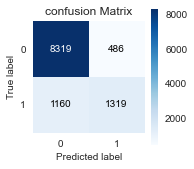

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8805
           1       0.73      0.53      0.62      2479

    accuracy                           0.85     11284
   macro avg       0.80      0.74      0.76     11284
weighted avg       0.85      0.85      0.85     11284

Accuracy of the model:  0.8541297412265154


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [58]:
# append the result table 
# compile the required information
linreg_nolog_model_metrics = pd.Series({'Model': "cross_validation ",
                                                 "Accuracy":acc})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_nolog_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,Accuracy
0,Log_base,0.854218
1,Log-threshold,0.853332
2,SGD-LOG,0.854130
3,cross_validation,0.854130


# Recursive feature elimination (RFE)- feature selection
#### in  every iteration  it will build the model 

In [61]:
colname= data.columns

 

from sklearn.feature_selection import RFE
rfe = RFE(classifier, 18) # no of  variable  to keep 
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_) 



Num Features:  18
Selected Features: 
[('Location', False), ('MinTemp', True), ('MaxTemp', True), ('Rainfall', True), ('Evaporation', False), ('Sunshine', True), ('WindGustDir', True), ('WindGustSpeed', True), ('WindDir9am', False), ('WindDir3pm', True), ('WindSpeed9am', True), ('WindSpeed3pm', True), ('Humidity9am', True), ('Humidity3pm', True), ('Pressure9am', True), ('Pressure3pm', True), ('Cloud9am', True), ('Cloud3pm', True), ('Temp9am', True), ('Temp3pm', True), ('RainToday', True)]
Feature Ranking:  [4 1 1 1 2 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1]


In [62]:
Y_pred=model_rfe.predict(X_test)

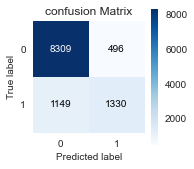

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8805
           1       0.73      0.54      0.62      2479

    accuracy                           0.85     11284
   macro avg       0.80      0.74      0.76     11284
weighted avg       0.85      0.85      0.85     11284

Accuracy of the model:  0.8542183622828784


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,Y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [64]:
"""new_data=adult_df_rev[['age','workclass','occupation','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]   
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)
"""
#in case the RFE eliminates logically relevant variables, create a  new df manually by subsetting the vaiables derived from RFE as well as on the basis of domain knowledge.
#rest of the model building steps will have to be performed manually

"new_data=adult_df_rev[['age','workclass','occupation','sex','income']]\nnew_data.head()\nnew_X=new_data.values[:,:-1]   \nnew_Y=new_data.values[:,-1]\nprint(new_X)\nprint(new_Y)\n"

# SelectKbest

In [65]:
# we create again X and Y value beacause to remove scale value 
X = data.values[:,:-1]
Y = data.values[:,-1]

In [66]:
print(X.shape)
print(Y.shape)

(56420, 21)
(56420,)


# it work on positive data 

# Traing  Model 